In [1]:
from UtilDatasetPrepFromLORE import *
from Rankers import *
from PreferentialSampling import *
from UniformSampling import *
from StandardEval import *
from FairnessEval import *
from Explainers import *

22-Jan-19 16:13:03 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


# GERMAN

## Uniform Sampling

In [2]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
df = prepare_german_dataset(filename, path_data, sensitive)

In [3]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [4]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [5]:
findFreq(target,protected,df)

({'foreign_worker_no': 22, 'foreign_worker_yes': 464},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 211})

In [6]:
df_new=UniformSampling(target,protected,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3
Len restData 0
DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


In [7]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [8]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,False)

### MLP

In [9]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [10]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

---> CLF Original: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.713333            0.713333       0.713333   
Precision           0.000000            0.000000       0.000000   
Recall              0.000000            0.000000       0.000000   
F1 Score            0.000000            0.000000       0.000000   
Discrimination      0.000000            0.000000       0.000000   

                CLF Mitigated Blind    Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.713333  CLF Original         0.0         0.0   
Precision                  0.000000  CLF Original         0.0         0.0   
Recall                     0.000000  CLF Original         0.0         0.0   
F1 Score                   0.000000  CLF Original         0.0         0.0   
Discrimination             0.000000  CLF Original         0.0         0.0   

                Delta O-M  Delta OB-MB  
Accuracy              0.0          0.0  
Precision             0.0          0.0  
Recall                0.0          0.0  
F1 Score              0.0          0.0  
Discrimination        0.0          0.0

In [11]:

PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [12]:
PIK = "US_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [3]:
res = pd.read_csv(path_res+'US_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_MLP_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.713               0.713          0.713   
Precision              0.000               0.000          0.000   
Recall                 0.000               0.000          0.000   
F1 Score               0.000               0.000          0.000   
Discrimination         0.000               0.000          0.000   

                CLF Mitigated Blind    Best Score  Delta O-OB  Delta M-MB  \
Accuracy                      0.713  CLF Original         0.0         0.0   
Precision                     0.000  CLF Original         0.0         0.0   
Recall                        0.000  CLF Original         0.0         0.0   
F1 Score                      0.000  CLF Original         0.0         0.0   
Discrimination                0.000  CLF Original         0.0         0.0   

                Delta O-M  Delta OB-MB  
Accuracy              0.0          0.0  
Precision             0.0          0.0  
Recall                0.0          0.0  
F1 Score              0.0          0.0  
Discrimination        0.0          0.0

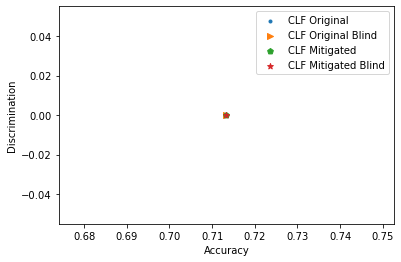

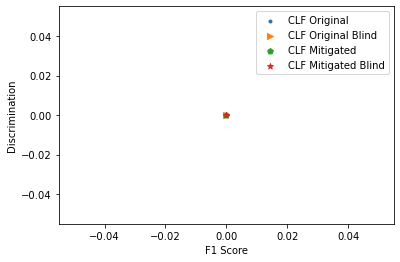

In [4]:
plotDisc(res)

In [15]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [16]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zer

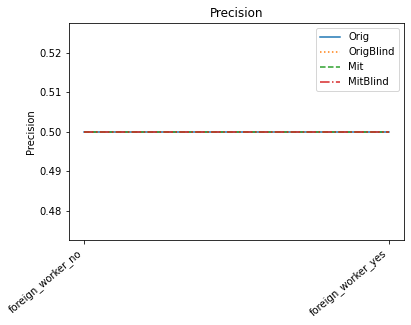

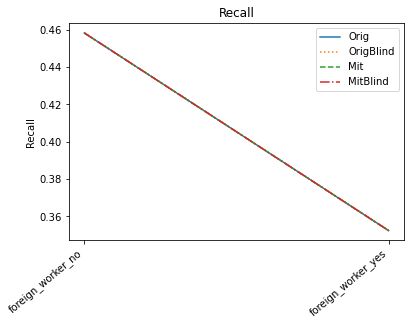

In [17]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [18]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [19]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [5]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [8]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.331149           -0.007190   
duration_in_month                      -6.161008            0.387517   
credit_history                         -0.019870            0.001324   
purpose                                 0.087846           -0.056822   
credit_amount                          -6.005991           -0.738995   
savings                                -0.023625           -0.019584   
present_emp_since                      -0.028039            0.005369   
installment_as_income_perc              0.051122           -0.013985   
personal_status_sex                    -0.190488           -0.000285   
other_debtors                          -0.031435            0.005207   
present_res_since                       0.028405           -0.006775   
property                                0.028898            0.000000   
age                                     0.896895            0.282847   
other_installment_plans                -0.021869            0.007703   
housing                                -0.104967           -0.000465   
credits_this_bank                      -0.018338           -0.002122   
job                                    -0.070004           -0.001754   
people_under_maintenance                0.051953            0.006598   
telephone                               0.073974           -0.000069   
foreign_worker_no                      -0.000768            0.000000   
foreign_worker_yes                      0.000630           -0.000451   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.317815                 -0.020524  
duration_in_month                -4.531422                 -1.242069  
credit_history                    0.005309                 -0.023855  
purpose                           0.148011                 -0.116986  
credit_amount                    -4.949203                 -1.795784  
savings                          -0.031928                 -0.011281  
present_emp_since                 0.013266                 -0.035937  
installment_as_income_perc       -0.001027                  0.038164  
personal_status_sex              -0.165142                 -0.025631  
other_debtors                    -0.000849                 -0.025379  
present_res_since                -0.002552                  0.024181  
property                          0.015188                  0.013710  
age                               1.004339                  0.175404  
other_installment_plans          -0.012037                 -0.002130  
housing                          -0.099138                 -0.006295  
credits_this_bank                -0.010252                 -0.010209  
job                              -0.104004                  0.032246  
people_under_maintenance          0.061678                 -0.003127  
telephone                         0.089914                 -0.016008  
foreign_worker_no                 0.001449                 -0.002217  
foreign_worker_yes               -0.002549                  0.002728

In [9]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004734        1.391763e-04   
duration_in_month                       0.020847        3.514671e-03   
credit_history                          0.001505        1.472651e-04   
purpose                                 0.005873        8.823079e-04   
credit_amount                           0.012139        1.336566e-02   
savings                                 0.000817        2.614703e-04   
present_emp_since                       0.001346        3.801667e-05   
installment_as_income_perc              0.000644        1.875234e-04   
personal_status_sex                     0.002533        9.488467e-07   
other_debtors                           0.000137        2.866891e-05   
present_res_since                       0.000577        9.574699e-05   
property                                0.000305        0.000000e+00   
age                                     0.009591        2.326854e-03   
other_installment_plans                 0.000181        3.167661e-05   
housing                                 0.000668        1.551086e-06   
credits_this_bank                       0.001034        3.745958e-05   
job                                     0.001002        6.138044e-06   
people_under_maintenance                0.000271        3.344718e-05   
telephone                               0.001923        2.888250e-06   
foreign_worker_no                       0.000027        0.000000e+00   
foreign_worker_yes                      0.000061        1.502711e-06   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.004997                  0.000413  
duration_in_month                 0.029836                  0.008963  
credit_history                    0.000334                  0.001274  
purpose                           0.004472                  0.002283  
credit_amount                     0.019020                  0.019658  
savings                           0.001013                  0.000188  
present_emp_since                 0.000138                  0.001245  
installment_as_income_perc        0.000260                  0.000576  
personal_status_sex               0.002755                  0.000599  
other_debtors                     0.000076                  0.000121  
present_res_since                 0.000237                  0.000610  
property                          0.000271                  0.000050  
age                               0.013631                  0.008801  
other_installment_plans           0.000183                  0.000042  
housing                           0.000682                  0.000036  
credits_this_bank                 0.001099                  0.000406  
job                               0.000788                  0.000239  
people_under_maintenance          0.000267                  0.000015  
telephone                         0.001754                  0.000190  
foreign_worker_no                 0.000010                  0.000017  
foreign_worker_yes                0.000042                  0.000020

In [4]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.001               0.000           0.002   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.749               0.081           0.609   
NSA-Mean                 0.003               0.001           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.002  
SA-Mean                      0.000  
NSA-Sum                      0.190  
NSA-Mean                     0.002

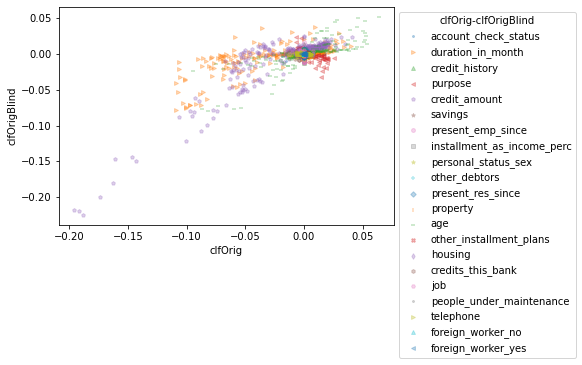

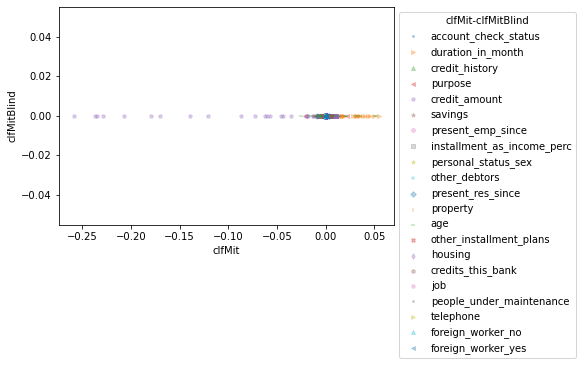

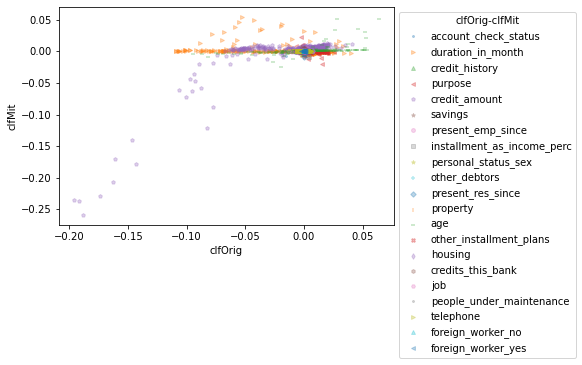

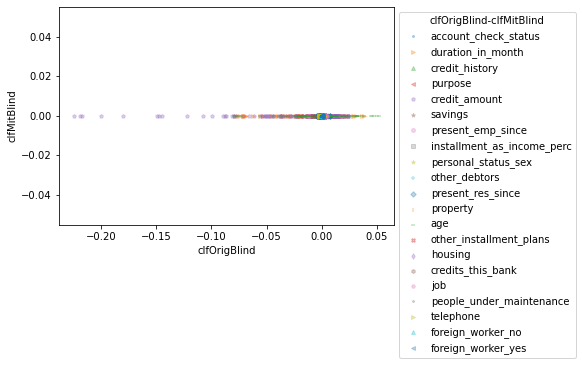

In [24]:
XAIPlots(shap_v,column_names,diffClfs=True)

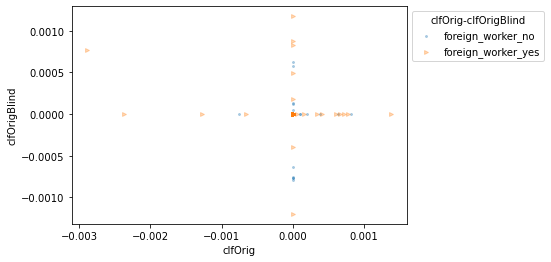

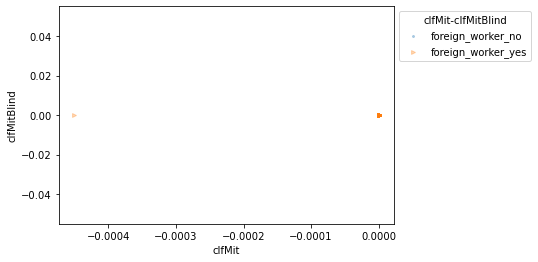

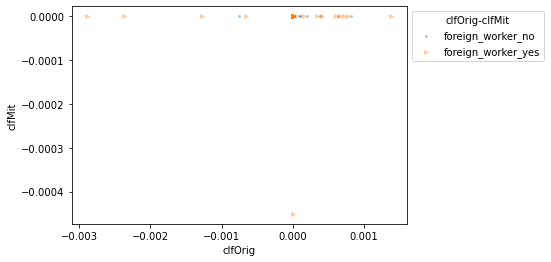

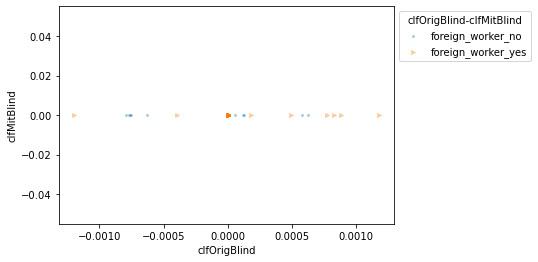

In [25]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [26]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [27]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [28]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [29]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.094162            0.019444   
duration_in_month                      -2.913809            0.593408   
credit_history                         -0.029153           -0.008573   
purpose                                -0.029260            0.034623   
credit_amount                          -8.139233           -2.251309   
savings                                -0.046046            0.015986   
present_emp_since                      -0.031450            0.006226   
installment_as_income_perc              0.065353            0.010347   
personal_status_sex                     0.017230            0.008286   
other_debtors                           0.075330           -0.023783   
present_res_since                       0.020584           -0.030496   
property                               -0.017295           -0.001282   
age                                     0.271246            0.140706   
other_installment_plans                 0.014822           -0.005509   
housing                                 0.149162           -0.036375   
credits_this_bank                       0.073344           -0.000437   
job                                    -0.025210           -0.030957   
people_under_maintenance               -0.048285           -0.036825   
telephone                               0.065240           -0.025470   
foreign_worker_no                      -0.002583            0.009739   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.099714                  0.013891  
duration_in_month                -2.580851                  0.260451  
credit_history                   -0.030311                 -0.007415  
purpose                          -0.027392                  0.032755  
credit_amount                    -7.449748                 -2.940794  
savings                          -0.021724                 -0.008336  
present_emp_since                 0.019002                 -0.044226  
installment_as_income_perc        0.044323                  0.031377  
personal_status_sex               0.034810                 -0.009294  
other_debtors                     0.052654                 -0.001107  
present_res_since                -0.031071                  0.021159  
property                         -0.014526                 -0.004051  
age                               0.327928                  0.084023  
other_installment_plans           0.023651                 -0.014337  
housing                           0.077635                  0.035152  
credits_this_bank                 0.039463                  0.033445  
job                              -0.051456                 -0.004711  
people_under_maintenance         -0.103137                  0.018027  
telephone                         0.039287                  0.000483  
foreign_worker_no                 0.004581                  0.002575  
foreign_worker_yes                0.000000                  0.000000

In [30]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.002623            0.000979   
duration_in_month                       0.018485            0.004256   
credit_history                          0.001282            0.000822   
purpose                                 0.002591            0.000992   
credit_amount                           0.009559            0.018117   
savings                                 0.001269            0.000937   
present_emp_since                       0.001278            0.000891   
installment_as_income_perc              0.001315            0.000853   
personal_status_sex                     0.001553            0.000854   
other_debtors                           0.001266            0.000846   
present_res_since                       0.001340            0.000983   
property                                0.001212            0.000869   
age                                     0.006661            0.003144   
other_installment_plans                 0.001155            0.000832   
housing                                 0.001360            0.000811   
credits_this_bank                       0.001345            0.000873   
job                                     0.001366            0.000957   
people_under_maintenance                0.001178            0.000728   
telephone                               0.001557            0.000897   
foreign_worker_no                       0.001240            0.000765   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.002794                  0.000942  
duration_in_month                 0.020590                  0.003711  
credit_history                    0.001236                  0.000814  
purpose                           0.002277                  0.001180  
credit_amount                     0.012539                  0.021999  
savings                           0.001407                  0.000826  
present_emp_since                 0.001319                  0.000784  
installment_as_income_perc        0.001251                  0.000876  
personal_status_sex               0.001555                  0.000902  
other_debtors                     0.001286                  0.000894  
present_res_since                 0.001435                  0.000932  
property                          0.001272                  0.000832  
age                               0.006975                  0.003472  
other_installment_plans           0.001319                  0.000786  
housing                           0.001381                  0.000814  
credits_this_bank                 0.001394                  0.000806  
job                               0.001450                  0.000846  
people_under_maintenance          0.001105                  0.000796  
telephone                         0.001534                  0.000866  
foreign_worker_no                 0.001233                  0.000815  
foreign_worker_yes                0.000000                  0.000000

In [10]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.001               0.005           0.002   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.638               0.173           0.583   
NSA-Mean                 0.003               0.002           0.003   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      0.188  
NSA-Mean                     0.002

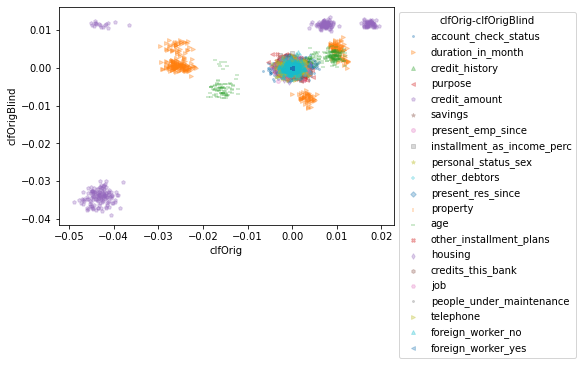

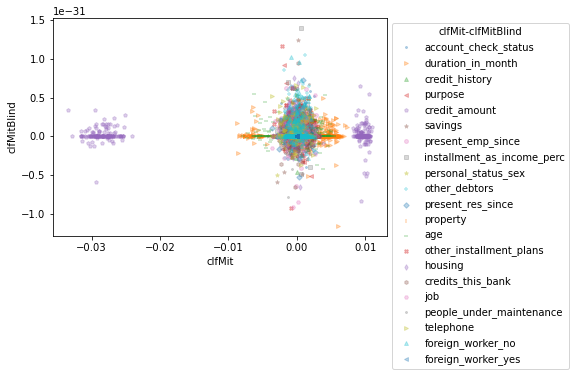

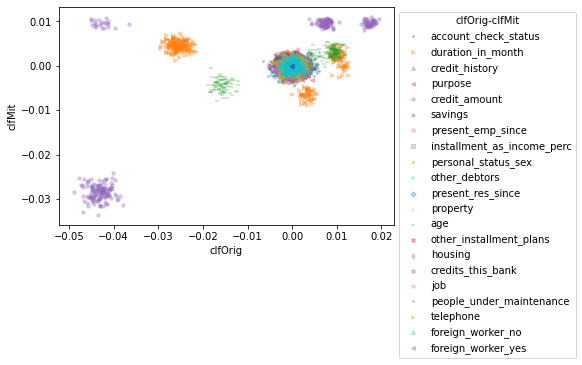

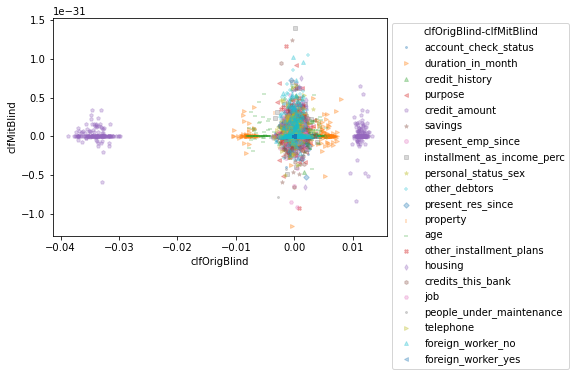

In [32]:
XAIPlots(lime_v,column_names,diffClfs=True)

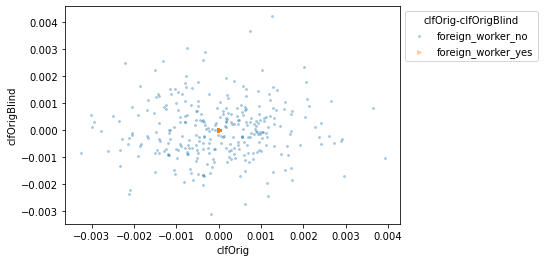

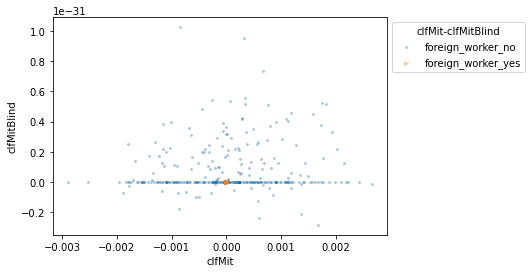

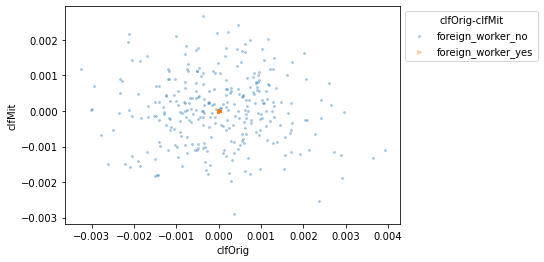

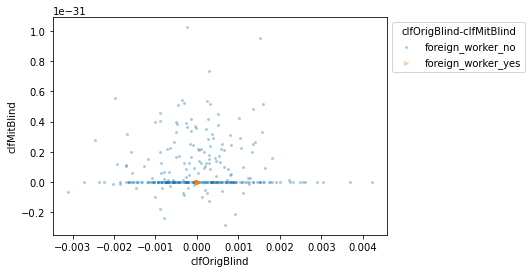

In [33]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [34]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [35]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [36]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [37]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.344130           -0.012305   
duration_in_month                      -5.919024            0.386826   
credit_history                         -0.019118           -0.002264   
purpose                                 0.063207           -0.070612   
credit_amount                          -5.824414           -0.019661   
savings                                -0.026347           -0.016516   
present_emp_since                      -0.042579            0.005363   
installment_as_income_perc              0.052987           -0.011471   
personal_status_sex                    -0.216188           -0.000983   
other_debtors                          -0.031026            0.007977   
present_res_since                       0.030713           -0.002514   
property                                0.039030           -0.000440   
age                                     0.875197            0.211644   
other_installment_plans                -0.027421            0.006521   
housing                                -0.094886           -0.000382   
credits_this_bank                      -0.016975           -0.001732   
job                                    -0.069571            0.000000   
people_under_maintenance                0.054695            0.008695   
telephone                               0.086427           -0.000488   
foreign_worker_no                      -0.002558            0.000000   
foreign_worker_yes                     -0.005658           -0.000399   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.323454                 -0.032981  
duration_in_month                -4.248448                 -1.283750  
credit_history                    0.006335                 -0.027717  
purpose                           0.134552                 -0.141957  
credit_amount                    -4.586468                 -1.257607  
savings                          -0.033065                 -0.009798  
present_emp_since                 0.010497                 -0.047713  
installment_as_income_perc        0.004344                  0.037171  
personal_status_sex              -0.184218                 -0.032953  
other_debtors                    -0.001367                 -0.021683  
present_res_since                 0.010067                  0.018133  
property                          0.023051                  0.015539  
age                               1.130341                 -0.043500  
other_installment_plans          -0.019227                 -0.001673  
housing                          -0.090290                 -0.004978  
credits_this_bank                -0.008424                 -0.010284  
job                              -0.107398                  0.037828  
people_under_maintenance          0.062038                  0.001352  
telephone                         0.100387                 -0.014448  
foreign_worker_no                -0.000950                 -0.001608  
foreign_worker_yes               -0.006281                  0.000224

In [38]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004668            0.000145   
duration_in_month                       0.020808            0.003502   
credit_history                          0.001445            0.000125   
purpose                                 0.005872            0.000842   
credit_amount                           0.013621            0.015313   
savings                                 0.000832            0.000272   
present_emp_since                       0.001321            0.000041   
installment_as_income_perc              0.000660            0.000196   
personal_status_sex                     0.002528            0.000004   
other_debtors                           0.000129            0.000027   
present_res_since                       0.000595            0.000102   
property                                0.000317            0.000001   
age                                     0.009909            0.002258   
other_installment_plans                 0.000167            0.000033   
housing                                 0.000631            0.000001   
credits_this_bank                       0.001070            0.000041   
job                                     0.000992            0.000000   
people_under_maintenance                0.000256            0.000030   
telephone                               0.001935            0.000006   
foreign_worker_no                       0.000040            0.000000   
foreign_worker_yes                      0.000039            0.000001   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.004953                  0.000443  
duration_in_month                 0.029843                  0.008930  
credit_history                    0.000315                  0.001246  
purpose                           0.004438                  0.002277  
credit_amount                     0.020256                  0.020230  
savings                           0.001031                  0.000183  
present_emp_since                 0.000133                  0.001239  
installment_as_income_perc        0.000265                  0.000592  
personal_status_sex               0.002747                  0.000583  
other_debtors                     0.000087                  0.000117  
present_res_since                 0.000254                  0.000594  
property                          0.000275                  0.000061  
age                               0.013890                  0.008711  
other_installment_plans           0.000173                  0.000041  
housing                           0.000646                  0.000027  
credits_this_bank                 0.001074                  0.000425  
job                               0.000784                  0.000235  
people_under_maintenance          0.000251                  0.000011  
telephone                         0.001790                  0.000188  
foreign_worker_no                 0.000023                  0.000017  
foreign_worker_yes                0.000033                  0.000007

In [11]:
resSHAP = pd.read_csv(path_res+'US_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_MLP_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.004               0.000           0.004   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.728               0.040           0.583   
NSA-Mean                 0.004               0.001           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      0.160  
NSA-Mean                     0.002

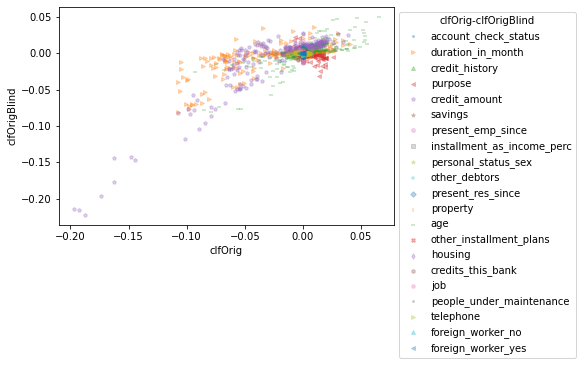

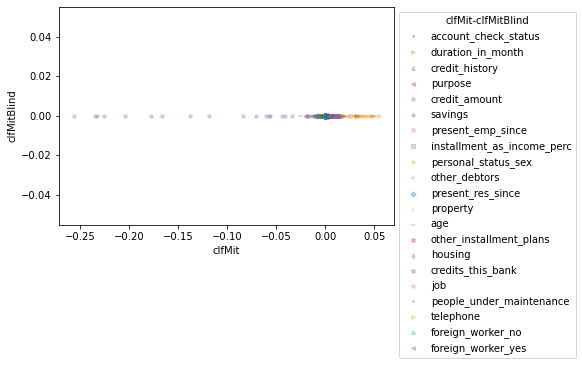

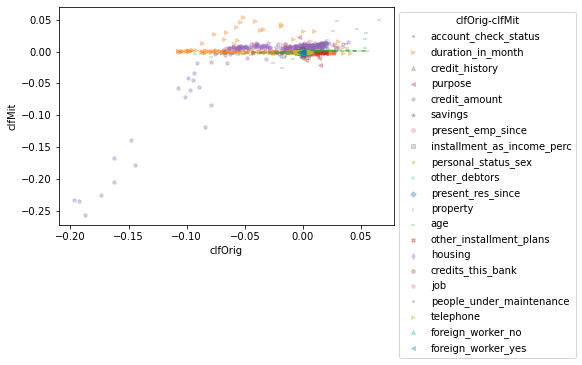

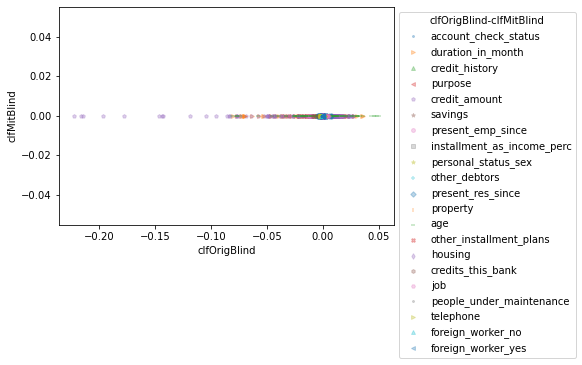

In [40]:
XAIPlots(shap_v,column_names,diffClfs=True)

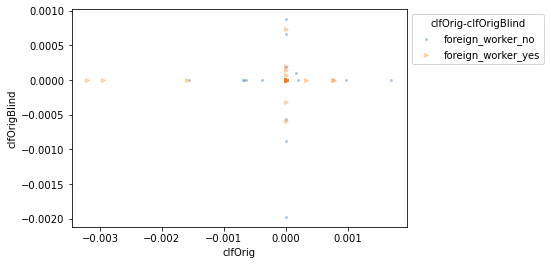

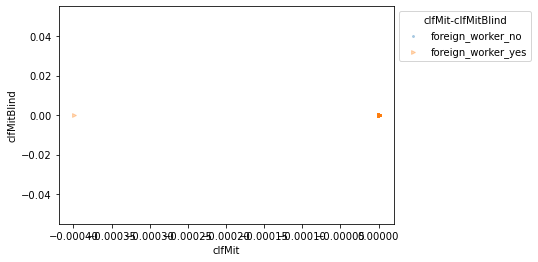

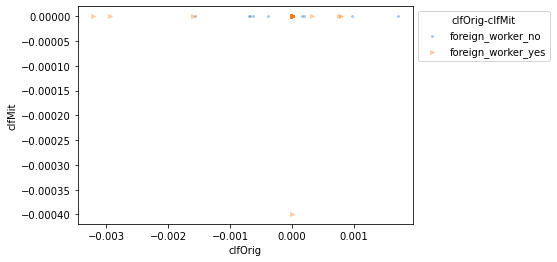

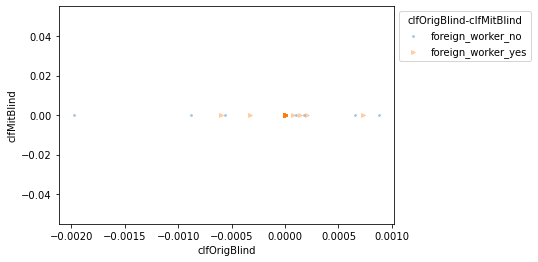

In [41]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [42]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [43]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [44]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [45]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.068513            0.004012   
duration_in_month                      -3.131629            0.442690   
credit_history                         -0.047320           -0.012513   
purpose                                -0.096156            0.002342   
credit_amount                          -8.133982           -2.602710   
savings                                -0.025539            0.043206   
present_emp_since                      -0.039383            0.011418   
installment_as_income_perc             -0.024506            0.009283   
personal_status_sex                     0.046557           -0.026073   
other_debtors                           0.077328           -0.032010   
present_res_since                       0.001602            0.021216   
property                               -0.063674           -0.006968   
age                                     0.206098            0.088752   
other_installment_plans                -0.002342           -0.030812   
housing                                 0.208677            0.004757   
credits_this_bank                       0.019358            0.009707   
job                                    -0.014880            0.008534   
people_under_maintenance               -0.018196           -0.030161   
telephone                               0.088770           -0.020471   
foreign_worker_no                      -0.010958            0.038338   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.059138                  0.013387  
duration_in_month                -2.687031                 -0.001909  
credit_history                   -0.040420                 -0.019413  
purpose                          -0.071239                 -0.022575  
credit_amount                    -7.828785                 -2.907907  
savings                           0.020207                 -0.002540  
present_emp_since                -0.008173                 -0.019791  
installment_as_income_perc       -0.019539                  0.004315  
personal_status_sex               0.016932                  0.003552  
other_debtors                     0.002554                  0.042764  
present_res_since                 0.025019                 -0.002201  
property                         -0.071978                  0.001337  
age                               0.260878                  0.033972  
other_installment_plans          -0.019007                 -0.014148  
housing                           0.138670                  0.074763  
credits_this_bank                 0.040056                 -0.010991  
job                               0.004204                 -0.010550  
people_under_maintenance         -0.081245                  0.032888  
telephone                         0.076089                 -0.007790  
foreign_worker_no                 0.017331                  0.010049  
foreign_worker_yes                0.000000                  0.000000

In [46]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.002471            0.000777   
duration_in_month                       0.017375            0.003145   
credit_history                          0.001324            0.000823   
purpose                                 0.002758            0.000887   
credit_amount                           0.009497            0.015356   
savings                                 0.001391            0.000804   
present_emp_since                       0.001342            0.000778   
installment_as_income_perc              0.001331            0.000812   
personal_status_sex                     0.001536            0.000774   
other_debtors                           0.001383            0.000752   
present_res_since                       0.001516            0.000817   
property                                0.001213            0.000741   
age                                     0.006278            0.002159   
other_installment_plans                 0.001246            0.000733   
housing                                 0.001389            0.000728   
credits_this_bank                       0.001387            0.000788   
job                                     0.001374            0.000759   
people_under_maintenance                0.001250            0.000771   
telephone                               0.001627            0.000744   
foreign_worker_no                       0.001231            0.000753   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.002671                  0.001043  
duration_in_month                 0.019658                  0.003013  
credit_history                    0.001270                  0.000904  
purpose                           0.002307                  0.001248  
credit_amount                     0.014015                  0.023671  
savings                           0.001312                  0.000917  
present_emp_since                 0.001227                  0.000907  
installment_as_income_perc        0.001318                  0.000929  
personal_status_sex               0.001694                  0.000925  
other_debtors                     0.001303                  0.000936  
present_res_since                 0.001282                  0.000936  
property                          0.001229                  0.000872  
age                               0.007905                  0.003754  
other_installment_plans           0.001218                  0.000864  
housing                           0.001417                  0.000885  
credits_this_bank                 0.001382                  0.000955  
job                               0.001330                  0.000866  
people_under_maintenance          0.001165                  0.000833  
telephone                         0.001513                  0.000951  
foreign_worker_no                 0.001221                  0.000770  
foreign_worker_yes                0.000000                  0.000000

In [12]:
resLIME = pd.read_csv(path_res+'US_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_MLP_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.005               0.019           0.009   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.648               0.179           0.604   
NSA-Mean                 0.003               0.002           0.003   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.005  
SA-Mean                      0.000  
NSA-Sum                      0.170  
NSA-Mean                     0.002

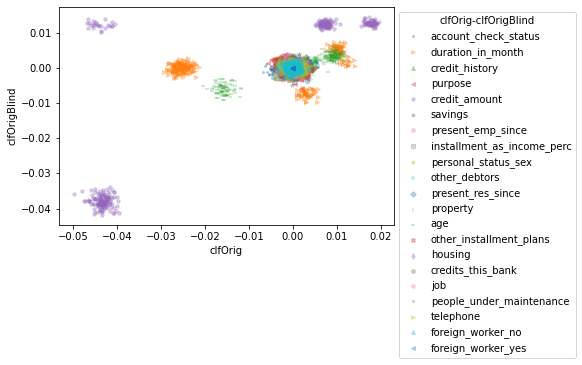

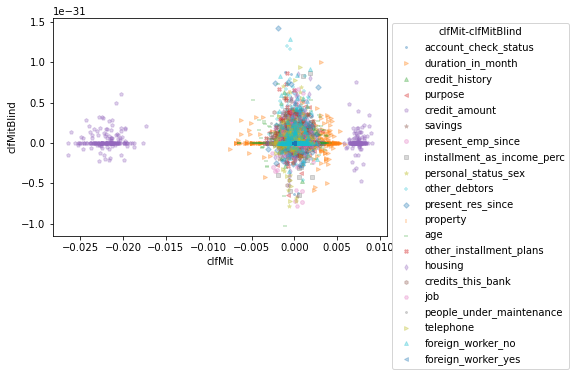

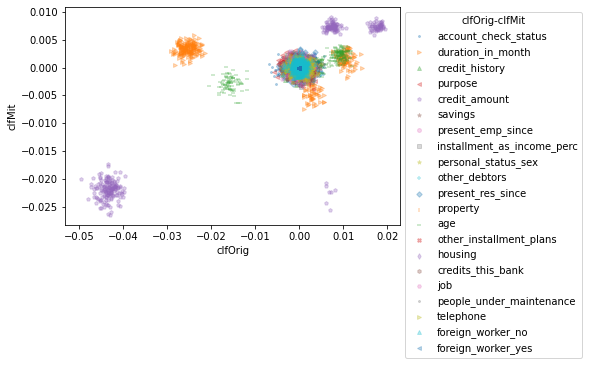

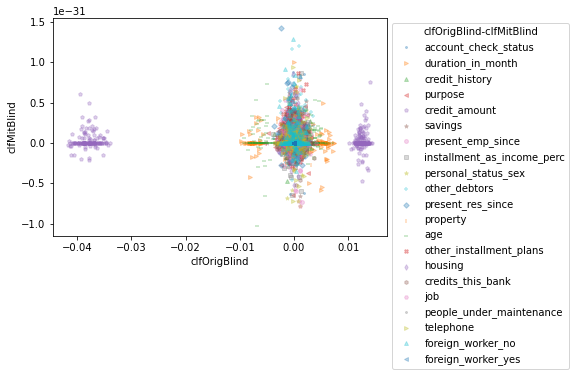

In [48]:
XAIPlots(lime_v,column_names,diffClfs=True)

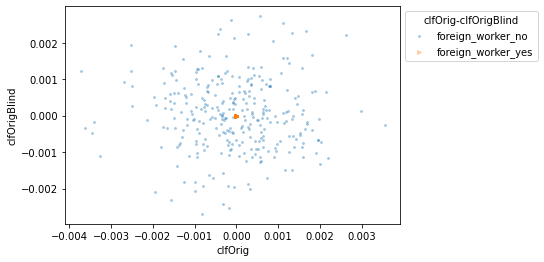

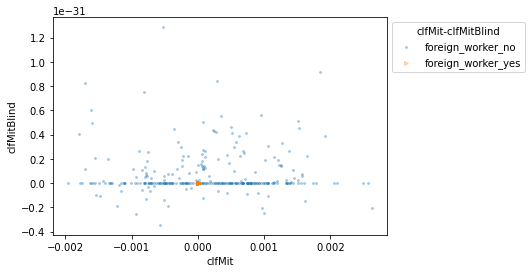

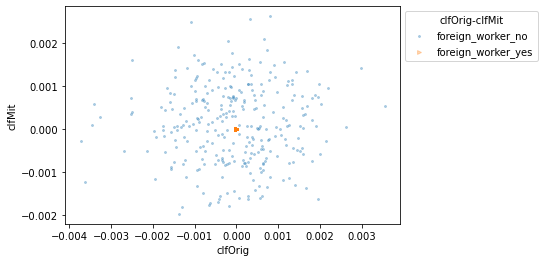

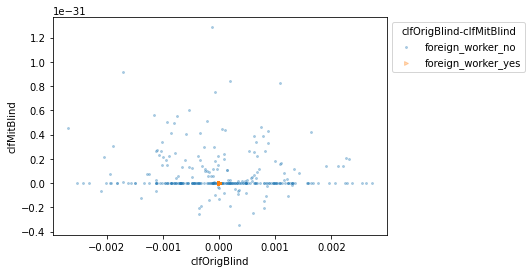

In [49]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [4]:
PIK = "US_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [5]:
PIK = "US_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [6]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.621774      -0.019495   
duration_in_month                 -9.554213       0.774343   
credit_history                     0.012584      -0.000940   
purpose                            0.409997      -0.127434   
credit_amount                     -8.777014      -0.758657   
savings                           -0.028894      -0.036099   
present_emp_since                  0.013031       0.010732   
installment_as_income_perc         0.028773      -0.025456   
personal_status_sex               -0.348092      -0.001267   
other_debtors                     -0.015400       0.013184   
present_res_since                  0.016805      -0.009289   
property                           0.038679      -0.000440   
age                                1.640189       0.494491   
other_installment_plans           -0.045487       0.014224   
housing                           -0.188580      -0.000848   
credits_this_bank                 -0.014821      -0.003854   
job                               -0.209648      -0.001754   
people_under_maintenance           0.108424       0.015292   
telephone                          0.190858      -0.000557   
foreign_worker_no                  0.000499       0.000000   
foreign_worker_yes                -0.007980      -0.000850   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -0.053505                      0.0  
duration_in_month                           -2.525819                      0.0  
credit_history                              -0.051572                      0.0  
purpose                                     -0.258943                      0.0  
credit_amount                               -3.053391                      0.0  
savings                                     -0.021079                      0.0  
present_emp_since                           -0.083649                      0.0  
installment_as_income_perc                   0.075335                      0.0  
personal_status_sex                         -0.058584                      0.0  
other_debtors                               -0.047062                      0.0  
present_res_since                            0.042314                      0.0  
property                                     0.029249                      0.0  
age                                          0.131903                      0.0  
other_installment_plans                     -0.003803                      0.0  
housing                                     -0.011273                      0.0  
credits_this_bank                           -0.020493                      0.0  
job                                          0.070074                      0.0  
people_under_maintenance                    -0.001776                      0.0  
telephone                                   -0.030457                      0.0  
foreign_worker_no                           -0.003826                      0.0  
foreign_worker_yes                           0.002952                      0.0

In [7]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000234       0.000037   
duration_in_month                  0.000979       0.000077   
credit_history                     0.000130       0.000043   
purpose                            0.000218       0.000091   
credit_amount                      0.001212       0.002398   
savings                            0.000209       0.000037   
present_emp_since                  0.000079       0.000019   
installment_as_income_perc         0.000052       0.000044   
personal_status_sex                0.000232       0.000003   
other_debtors                      0.000046       0.000010   
present_res_since                  0.000102       0.000032   
property                           0.000130       0.000001   
age                                0.000690       0.000242   
other_installment_plans            0.000045       0.000008   
housing                            0.000100       0.000003   
credits_this_bank                  0.000214       0.000015   
job                                0.000159       0.000006   
people_under_maintenance           0.000093       0.000015   
telephone                          0.000208       0.000007   
foreign_worker_no                  0.000033       0.000000   
foreign_worker_yes                 0.000029       0.000003   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000128                      0.0  
duration_in_month                            0.000330                      0.0  
credit_history                               0.000170                      0.0  
purpose                                      0.000198                      0.0  
credit_amount                                0.001794                      0.0  
savings                                      0.000069                      0.0  
present_emp_since                            0.000178                      0.0  
installment_as_income_perc                   0.000119                      0.0  
personal_status_sex                          0.000141                      0.0  
other_debtors                                0.000050                      0.0  
present_res_since                            0.000127                      0.0  
property                                     0.000031                      0.0  
age                                          0.000736                      0.0  
other_installment_plans                      0.000022                      0.0  
housing                                      0.000037                      0.0  
credits_this_bank                            0.000139                      0.0  
job                                          0.000089                      0.0  
people_under_maintenance                     0.000024                      0.0  
telephone                                    0.000097                      0.0  
foreign_worker_no                            0.000035                      0.0  
foreign_worker_yes                           0.000024                      0.0

In [8]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.004          0.000                      0.003   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             1.172          0.121                      0.346   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                        0.0  
SA-Mean                       0.0  
NSA-Sum                       0.0  
NSA-Mean                      0.0

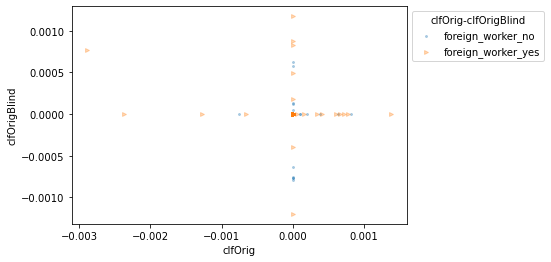

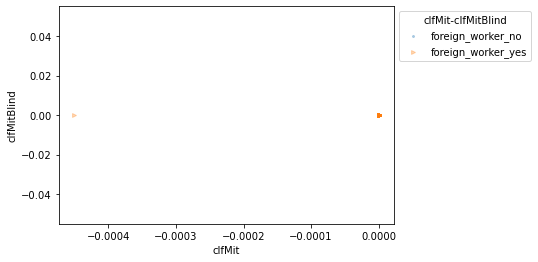

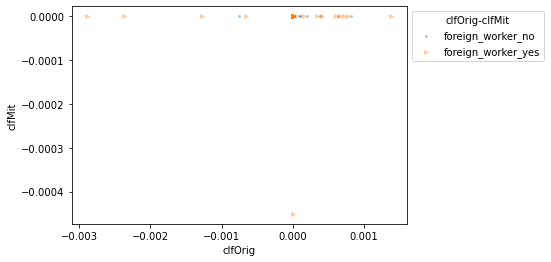

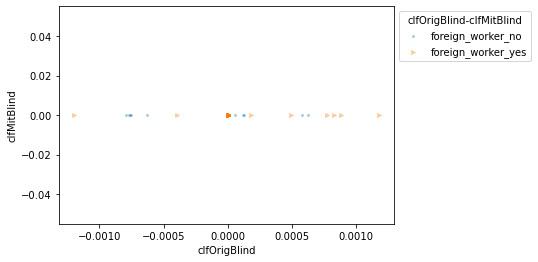

In [9]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [10]:
PIK = "US_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [11]:
PIK = "US_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [12]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.135396       0.023456   
duration_in_month                 -6.303980       1.036098   
credit_history                    -0.049645      -0.021086   
purpose                           -0.135596       0.036965   
credit_amount                    -10.424515      -4.854019   
savings                           -0.060708       0.059191   
present_emp_since                 -0.006816       0.017644   
installment_as_income_perc         0.005154       0.019630   
personal_status_sex                0.069529      -0.017787   
other_debtors                      0.111001      -0.055794   
present_res_since                  0.003228      -0.009280   
property                          -0.078255      -0.008250   
age                                0.359348       0.229458   
other_installment_plans            0.040965      -0.036322   
housing                            0.247924      -0.031619   
credits_this_bank                  0.070249       0.009270   
job                               -0.024829      -0.022423   
people_under_maintenance          -0.117396      -0.066986   
telephone                          0.161317      -0.045941   
foreign_worker_no                 -0.026166       0.048078   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.027279             1.890609e-30  
duration_in_month                            0.258542             1.097813e-30  
credit_history                              -0.026828             1.808922e-30  
purpose                                      0.010180             1.618898e-30  
credit_amount                               -5.848701             1.311742e-30  
savings                                     -0.010876             1.531287e-30  
present_emp_since                           -0.064017             1.092585e-30  
installment_as_income_perc                   0.035692             1.939741e-30  
personal_status_sex                         -0.005742             1.735677e-30  
other_debtors                                0.041657             5.344643e-30  
present_res_since                            0.018958             2.112577e-30  
property                                    -0.002714             2.288792e-30  
age                                          0.117995             1.721361e-30  
other_installment_plans                     -0.028485             3.254287e-30  
housing                                      0.109915             3.067921e-30  
credits_this_bank                            0.022453             1.594551e-30  
job                                         -0.015261             1.688234e-30  
people_under_maintenance                     0.050915             2.016852e-30  
telephone                                   -0.007307             2.176777e-30  
foreign_worker_no                            0.012625             4.366098e-30  
foreign_worker_yes                           0.000000             0.000000e+00

In [13]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.001319       0.001211   
duration_in_month                  0.001501       0.001542   
credit_history                     0.001342       0.001090   
purpose                            0.001360       0.001166   
credit_amount                      0.001521       0.007030   
savings                            0.001376       0.001196   
present_emp_since                  0.001367       0.001201   
installment_as_income_perc         0.001426       0.001044   
personal_status_sex                0.001346       0.001135   
other_debtors                      0.001330       0.001139   
present_res_since                  0.001447       0.001266   
property                           0.001308       0.001203   
age                                0.001375       0.001507   
other_installment_plans            0.001353       0.001165   
housing                            0.001265       0.001117   
credits_this_bank                  0.001294       0.001105   
job                                0.001372       0.001178   
people_under_maintenance           0.001252       0.001122   
telephone                          0.001196       0.001229   
foreign_worker_no                  0.001350       0.001050   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.001306             9.660125e-33  
duration_in_month                            0.001725             1.015928e-32  
credit_history                               0.001180             8.153959e-33  
purpose                                      0.001206             9.262575e-33  
credit_amount                                0.003537             9.555371e-33  
savings                                      0.001361             9.671233e-33  
present_emp_since                            0.001145             9.540870e-33  
installment_as_income_perc                   0.001240             1.035812e-32  
personal_status_sex                          0.001228             9.668994e-33  
other_debtors                                0.001377             1.746886e-32  
present_res_since                            0.001359             9.436210e-33  
property                                     0.001217             8.862087e-33  
age                                          0.001461             9.914192e-33  
other_installment_plans                      0.001174             1.293865e-32  
housing                                      0.001211             1.256577e-32  
credits_this_bank                            0.001250             9.669456e-33  
job                                          0.001224             9.917512e-33  
people_under_maintenance                     0.001159             8.741523e-33  
telephone                                    0.001313             9.504823e-33  
foreign_worker_no                            0.001149             1.412212e-32  
foreign_worker_yes                           0.000000             0.000000e+00

In [14]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.013          0.024                      0.006   
SA-Mean             0.001          0.001                      0.001   
NSA-Sum             0.969          0.347                      0.353   
NSA-Mean            0.001          0.002                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                        0.0  
SA-Mean                       0.0  
NSA-Sum                       0.0  
NSA-Mean                      0.0

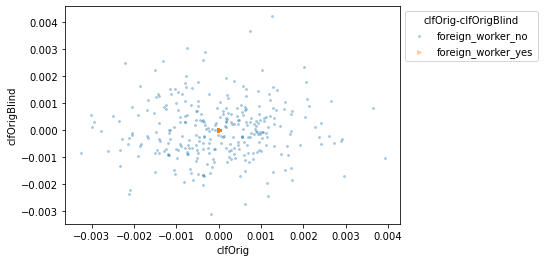

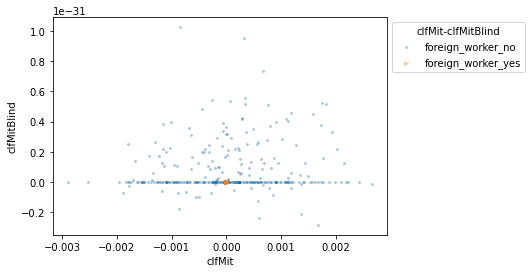

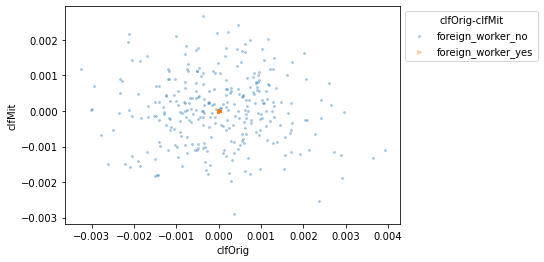

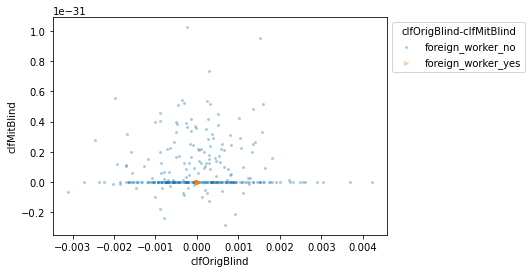

In [15]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [62]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [63]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'US_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 250 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 246 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 247 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 248 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.736667            0.740000       0.750000   
Precision           0.601746            0.597424       0.603030   
Recall              0.267320            0.313725       0.371895   
F1 Score            0.366158            0.409862       0.458993   
Discrimination      0.131944            0.142361       0.145833   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.766667  CLF Mitigated Blind    0.003333   
Precision                  0.741746  CLF Mitigated Blind    0.004322   
Recall                     0.301961        CLF Mitigated    0.046405   
F1 Score                   0.426266        CLF Mitigated    0.043704   
Discrimination             0.138889         CLF Original    0.010417   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.016667   0.013333     0.026667  
Precision         0.138716   0.001284     0.144322  
Recall            0.069935   0.104575     0.011765  
F1 Score          0.032727   0.092835     0.016403  
Discrimination    0.006944   0.013889     0.003472

In [64]:

PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [65]:
PIK = "US_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [4]:
res = pd.read_csv(path_res+'US_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'US_RF_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.737               0.740          0.750   
Precision              0.602               0.597          0.603   
Recall                 0.267               0.314          0.372   
F1 Score               0.366               0.410          0.459   
Discrimination         0.132               0.142          0.146   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                      0.767  CLF Mitigated Blind       0.003   
Precision                     0.742  CLF Mitigated Blind       0.004   
Recall                        0.302        CLF Mitigated       0.046   
F1 Score                      0.426        CLF Mitigated       0.044   
Discrimination                0.139         CLF Original       0.010   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy             0.017      0.013        0.027  
Precision            0.139      0.001        0.144  
Recall               0.070      0.105        0.012  
F1 Score             0.033      0.093        0.016  
Discrimination       0.007      0.014        0.003

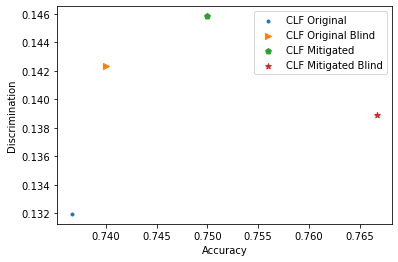

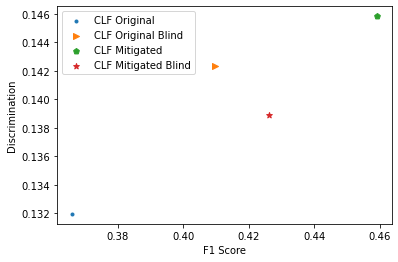

In [6]:
plotDisc(res)

In [68]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [69]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


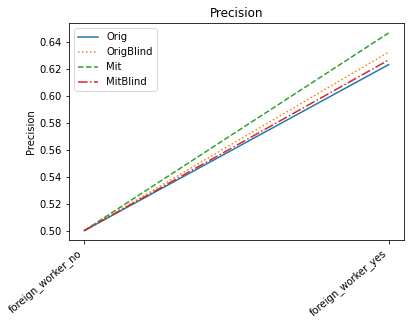

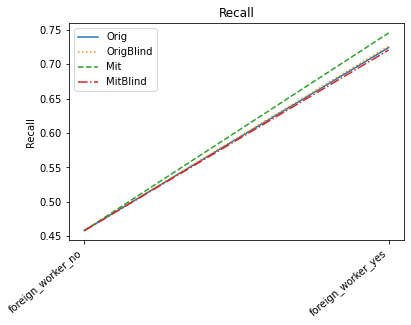

In [70]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [71]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [72]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [73]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [74]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.700020           -8.225241   
duration_in_month                     -13.434964          -11.145248   
credit_history                          3.960318            4.197046   
purpose                                 6.533479            5.186486   
credit_amount                         -17.847472          -19.649572   
savings                                -1.867156           -4.332365   
present_emp_since                      -1.998611           -1.692360   
installment_as_income_perc              1.244590            1.416043   
personal_status_sex                     0.788725            0.027083   
other_debtors                           0.555102            0.516337   
present_res_since                      -1.555772           -0.937296   
property                                0.604793            0.543490   
age                                     5.091199            4.124703   
other_installment_plans                 2.690937            2.227566   
housing                                 2.729433            3.097189   
credits_this_bank                      -0.228750           -0.212884   
job                                     0.752105            0.561991   
people_under_maintenance                1.219273            1.100448   
telephone                               0.119659            0.095367   
foreign_worker_no                      -0.124896           -0.084576   
foreign_worker_yes                     -0.205034           -0.053040   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -8.522911                 -7.402350  
duration_in_month               -12.118638                -12.461575  
credit_history                    4.535421                  3.621943  
purpose                           6.247130                  5.472835  
credit_amount                   -20.121728                -17.375316  
savings                          -2.930561                 -3.268960  
present_emp_since                -1.690989                 -1.999982  
installment_as_income_perc        1.156727                  1.503906  
personal_status_sex               0.623732                  0.192076  
other_debtors                     0.648416                  0.423024  
present_res_since                -1.521375                 -0.971693  
property                          0.621259                  0.527024  
age                               4.774813                  4.441089  
other_installment_plans           2.663145                  2.255359  
housing                           3.319831                  2.506791  
credits_this_bank                -0.194237                 -0.247397  
job                               0.853377                  0.460718  
people_under_maintenance          1.059055                  1.260667  
telephone                         0.109976                  0.105051  
foreign_worker_no                -0.210576                  0.001104  
foreign_worker_yes               -0.258074                  0.000000

In [75]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.008295            0.006705   
duration_in_month                       0.008308            0.007916   
credit_history                          0.004689            0.003597   
purpose                                 0.004648            0.004251   
credit_amount                           0.007220            0.013608   
savings                                 0.004074            0.003575   
present_emp_since                       0.003163            0.002759   
installment_as_income_perc              0.004286            0.003866   
personal_status_sex                     0.002478            0.002630   
other_debtors                           0.000834            0.001086   
present_res_since                       0.002530            0.002497   
property                                0.003642            0.002891   
age                                     0.004277            0.004061   
other_installment_plans                 0.002195            0.002867   
housing                                 0.003427            0.003275   
credits_this_bank                       0.001668            0.001283   
job                                     0.002307            0.002665   
people_under_maintenance                0.000944            0.001038   
telephone                               0.001674            0.002135   
foreign_worker_no                       0.000424            0.000285   
foreign_worker_yes                      0.000693            0.000195   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009425                  0.007047  
duration_in_month                 0.010769                  0.006111  
credit_history                    0.006786                  0.004327  
purpose                           0.005747                  0.004198  
credit_amount                     0.013964                  0.005691  
savings                           0.006799                  0.006401  
present_emp_since                 0.002994                  0.003219  
installment_as_income_perc        0.003394                  0.004935  
personal_status_sex               0.002498                  0.003057  
other_debtors                     0.001101                  0.000659  
present_res_since                 0.002646                  0.002393  
property                          0.003895                  0.003303  
age                               0.004581                  0.004888  
other_installment_plans           0.003079                  0.002845  
housing                           0.002499                  0.002527  
credits_this_bank                 0.001895                  0.001331  
job                               0.002035                  0.002085  
people_under_maintenance          0.001339                  0.000659  
telephone                         0.001830                  0.002020  
foreign_worker_no                 0.000156                  0.000004  
foreign_worker_yes                0.000525                  0.000000

In [13]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.069           0.234   
SA-Mean                  0.001               0.000           0.000   
NSA-Sum                  3.733               3.647           3.880   
NSA-Mean                 0.004               0.004           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      3.500  
NSA-Mean                     0.004

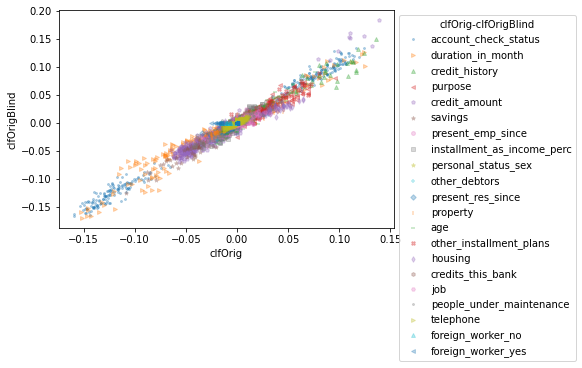

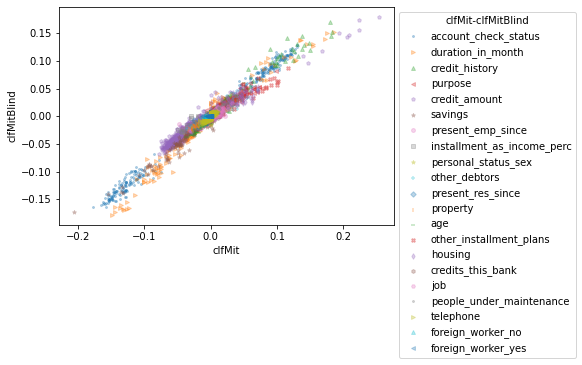

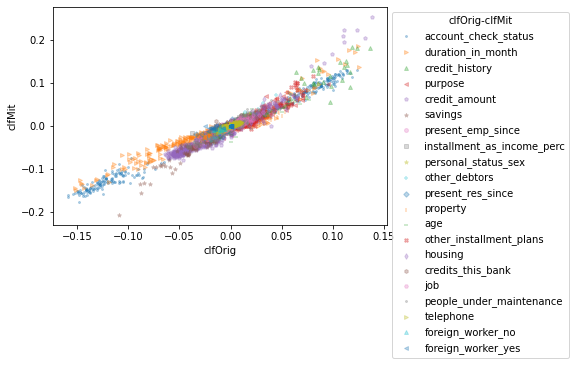

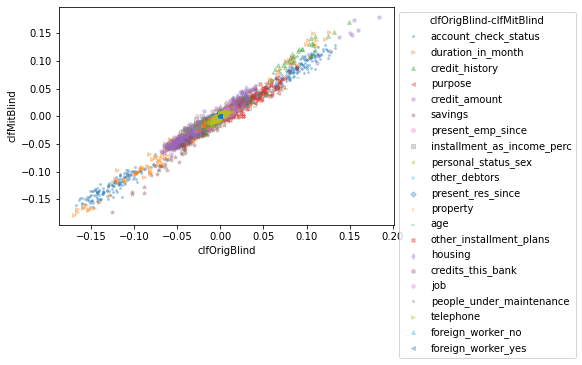

In [77]:
XAIPlots(shap_v,column_names,diffClfs=True)

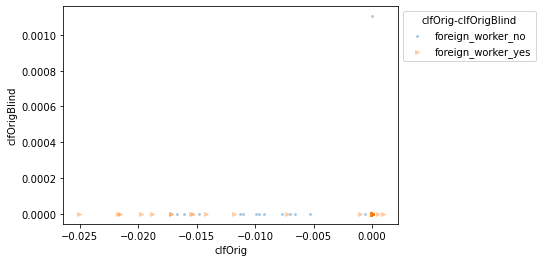

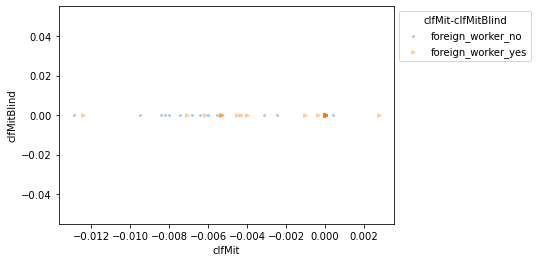

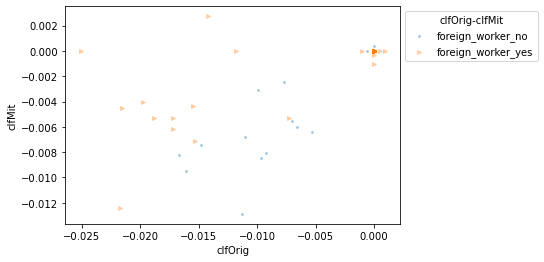

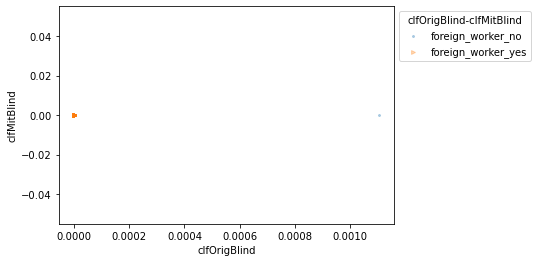

In [78]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [79]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [80]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [81]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [82]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.550618           -1.800162   
duration_in_month                      -1.290606           -1.995586   
credit_history                         -0.624472           -0.725799   
purpose                                 0.944271            1.058423   
credit_amount                          -1.190493           -1.508034   
savings                                 0.167439            0.286797   
present_emp_since                       0.321221            0.426340   
installment_as_income_perc             -0.806840           -0.762111   
personal_status_sex                     0.408357            0.198231   
other_debtors                           0.012420           -0.157431   
present_res_since                      -0.215809            0.032790   
property                                0.335544            0.307013   
age                                     1.167339            1.583301   
other_installment_plans                 1.374358            1.453483   
housing                                -0.042790           -0.384238   
credits_this_bank                      -0.174307           -0.053564   
job                                     0.478674            0.490309   
people_under_maintenance                0.027729            0.091528   
telephone                               0.406883            0.642167   
foreign_worker_no                       0.003315           -0.035716   
foreign_worker_yes                      0.041880           -0.040942   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.689442                 -1.661338  
duration_in_month                -1.555359                 -1.730833  
credit_history                   -0.447772                 -0.902499  
purpose                           1.025534                  0.977161  
credit_amount                    -1.197664                 -1.500863  
savings                           0.222181                  0.232055  
present_emp_since                 0.451476                  0.296085  
installment_as_income_perc       -0.776006                 -0.792945  
personal_status_sex               0.428516                  0.178071  
other_debtors                    -0.024059                 -0.120953  
present_res_since                -0.209040                  0.026021  
property                          0.329108                  0.313449  
age                               1.277222                  1.473418  
other_installment_plans           1.759689                  1.068152  
housing                          -0.246045                 -0.180983  
credits_this_bank                -0.222544                 -0.005326  
job                               0.660381                  0.308601  
people_under_maintenance          0.062361                  0.056896  
telephone                         0.509649                  0.539401  
foreign_worker_no                -0.032402                  0.000000  
foreign_worker_yes                0.000938                  0.000000

In [83]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.007284            0.006038   
duration_in_month                       0.007347            0.007455   
credit_history                          0.003535            0.003170   
purpose                                 0.004045            0.004463   
credit_amount                           0.005607            0.005797   
savings                                 0.003394            0.003223   
present_emp_since                       0.002796            0.002645   
installment_as_income_perc              0.003866            0.003395   
personal_status_sex                     0.001949            0.001927   
other_debtors                           0.001505            0.001482   
present_res_since                       0.002396            0.002421   
property                                0.003921            0.002905   
age                                     0.004184            0.003769   
other_installment_plans                 0.001963            0.003366   
housing                                 0.004695            0.004069   
credits_this_bank                       0.001672            0.001462   
job                                     0.002629            0.002474   
people_under_maintenance                0.001572            0.001402   
telephone                               0.001470            0.001897   
foreign_worker_no                       0.000992            0.000496   
foreign_worker_yes                      0.001692            0.000343   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009404                  0.006594  
duration_in_month                 0.008746                  0.005706  
credit_history                    0.005083                  0.004312  
purpose                           0.004957                  0.004100  
credit_amount                     0.007651                  0.005153  
savings                           0.007566                  0.005772  
present_emp_since                 0.002995                  0.002752  
installment_as_income_perc        0.003183                  0.004136  
personal_status_sex               0.002106                  0.002322  
other_debtors                     0.001548                  0.001146  
present_res_since                 0.002398                  0.002230  
property                          0.004730                  0.003318  
age                               0.005558                  0.004955  
other_installment_plans           0.003546                  0.002616  
housing                           0.003477                  0.004019  
credits_this_bank                 0.001574                  0.001642  
job                               0.002075                  0.002222  
people_under_maintenance          0.001668                  0.001250  
telephone                         0.001561                  0.001948  
foreign_worker_no                 0.000534                  0.000000  
foreign_worker_yes                0.001499                  0.000000

In [14]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Fix_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.023               0.038           0.017   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.607               0.735           0.689   
NSA-Mean                 0.003               0.003           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.651  
NSA-Mean                     0.003

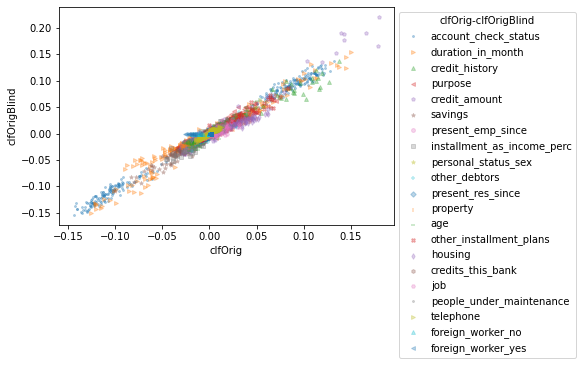

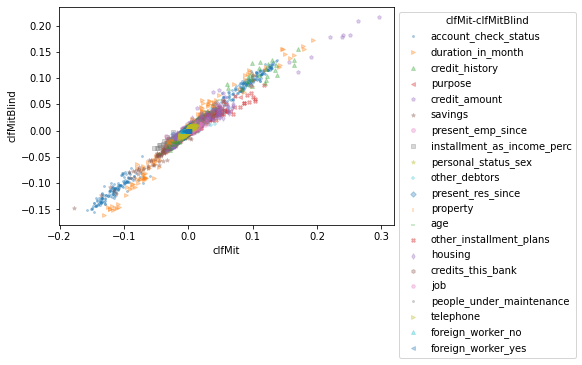

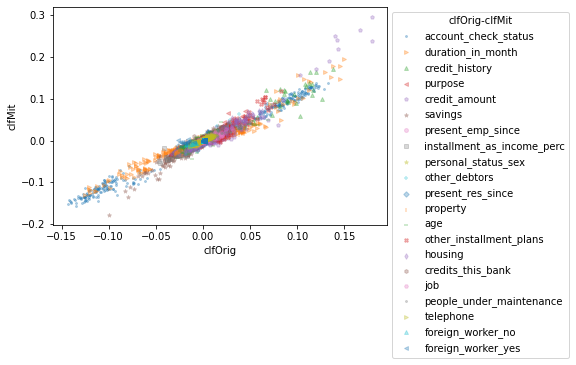

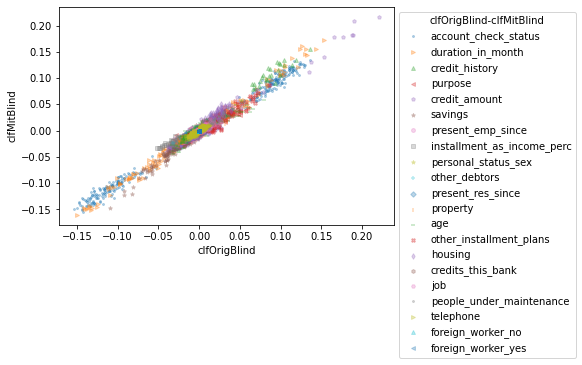

In [85]:
XAIPlots(shap_v,column_names,diffClfs=True)

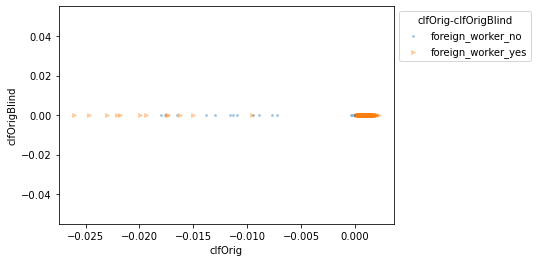

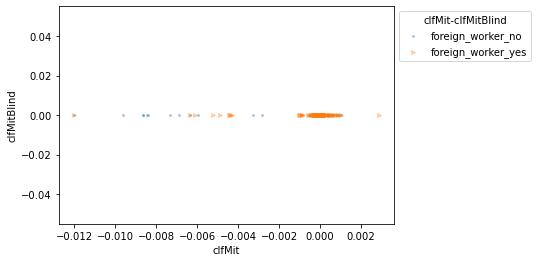

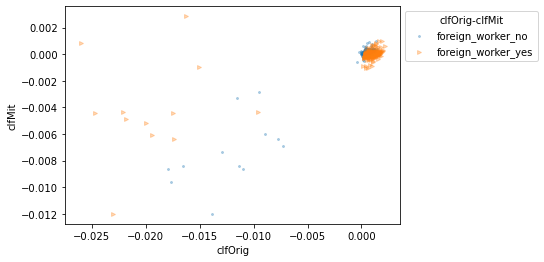

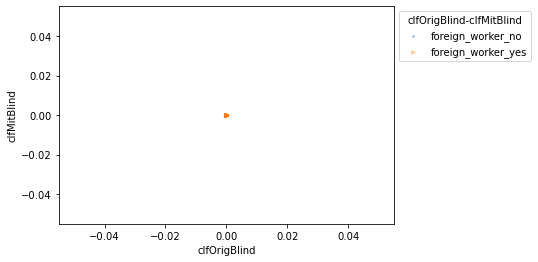

In [86]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [87]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [88]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [89]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [90]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    1.988524            1.422373   
duration_in_month                     -11.821762          -13.170395   
credit_history                          6.098361            6.155996   
purpose                                 4.860805            5.136474   
credit_amount                         -20.287727          -25.177764   
savings                                 2.446512            2.269613   
present_emp_since                      -0.571456           -0.680486   
installment_as_income_perc              0.131101            0.104845   
personal_status_sex                    -0.198305           -0.824613   
other_debtors                           0.047608            0.413110   
present_res_since                      -0.696124           -0.044411   
property                                1.583963            1.617541   
age                                     3.985647            4.578849   
other_installment_plans                -5.553005           -6.419180   
housing                                -2.262594           -2.444618   
credits_this_bank                      -0.051271            0.044202   
job                                    -0.735370           -0.981920   
people_under_maintenance               -0.291066           -0.392190   
telephone                               0.431627            0.819402   
foreign_worker_no                       0.038837            0.105240   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              2.970120                  0.440777  
duration_in_month               -13.580603                -11.411555  
credit_history                    6.333921                  5.920436  
purpose                           4.971674                  5.025605  
credit_amount                   -24.153885                -21.311605  
savings                           2.104378                  2.611747  
present_emp_since                -0.646637                 -0.605306  
installment_as_income_perc       -0.028597                  0.264542  
personal_status_sex              -0.406577                 -0.616341  
other_debtors                     0.486216                 -0.025499  
present_res_since                -0.464615                 -0.275920  
property                          1.640374                  1.561130  
age                               4.968714                  3.595782  
other_installment_plans          -6.110473                 -5.861712  
housing                          -2.879982                 -1.827230  
credits_this_bank                 0.133898                 -0.140968  
job                              -0.974897                 -0.742393  
people_under_maintenance         -0.222246                 -0.461010  
telephone                         0.354615                  0.896414  
foreign_worker_no                 0.234363                 -0.090287  
foreign_worker_yes                0.000000                  0.000000

In [91]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010642            0.011009   
duration_in_month                       0.013335            0.005273   
credit_history                          0.004735            0.006308   
purpose                                 0.005348            0.005179   
credit_amount                           0.010866            0.022985   
savings                                 0.006853            0.005240   
present_emp_since                       0.004651            0.005057   
installment_as_income_perc              0.005124            0.005924   
personal_status_sex                     0.004040            0.005200   
other_debtors                           0.004452            0.004910   
present_res_since                       0.004786            0.005089   
property                                0.004419            0.004559   
age                                     0.007188            0.006422   
other_installment_plans                 0.003925            0.005598   
housing                                 0.005614            0.005187   
credits_this_bank                       0.005137            0.005736   
job                                     0.003992            0.005646   
people_under_maintenance                0.004204            0.004346   
telephone                               0.004785            0.004833   
foreign_worker_no                       0.003883            0.004945   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.013321                  0.008119  
duration_in_month                 0.005441                  0.012576  
credit_history                    0.006642                  0.004504  
purpose                           0.006056                  0.004608  
credit_amount                     0.028712                  0.006800  
savings                           0.008718                  0.006866  
present_emp_since                 0.004543                  0.004763  
installment_as_income_perc        0.004559                  0.006982  
personal_status_sex               0.005058                  0.004943  
other_debtors                     0.004651                  0.004668  
present_res_since                 0.005140                  0.004912  
property                          0.004084                  0.004256  
age                               0.006012                  0.006598  
other_installment_plans           0.005867                  0.004492  
housing                           0.004530                  0.004702  
credits_this_bank                 0.005934                  0.004864  
job                               0.004826                  0.004438  
people_under_maintenance          0.004201                  0.004254  
telephone                         0.004647                  0.004618  
foreign_worker_no                 0.004689                  0.004326  
foreign_worker_yes                0.000000                  0.000000

In [15]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.019               0.053           0.117   
SA-Mean                  0.002               0.002           0.002   
NSA-Sum                  3.371               3.826           3.865   
NSA-Mean                 0.006               0.007           0.007   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.045  
SA-Mean                      0.002  
NSA-Sum                      3.347  
NSA-Mean                     0.006

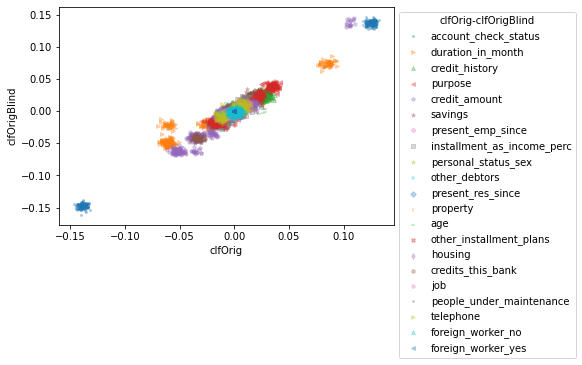

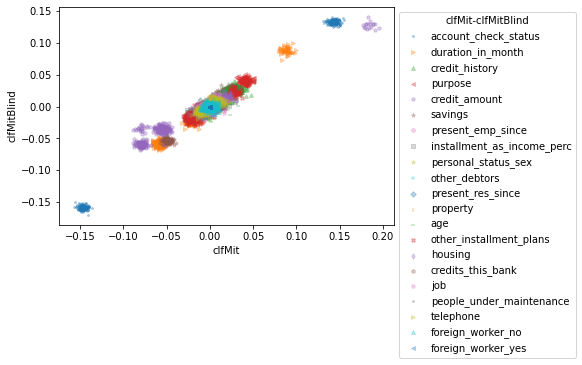

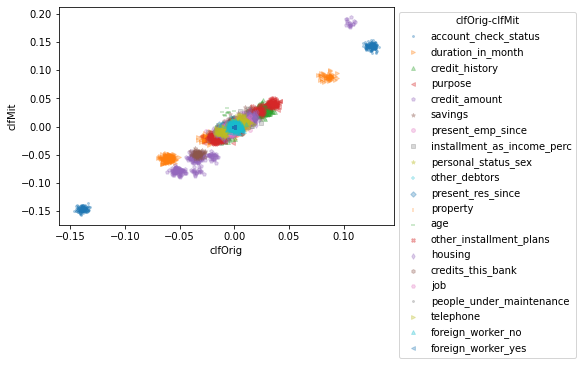

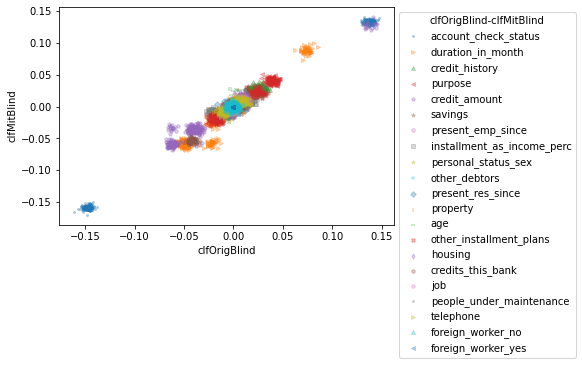

In [93]:
XAIPlots(lime_v,column_names,diffClfs=True)

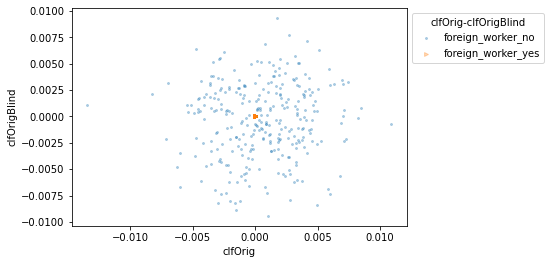

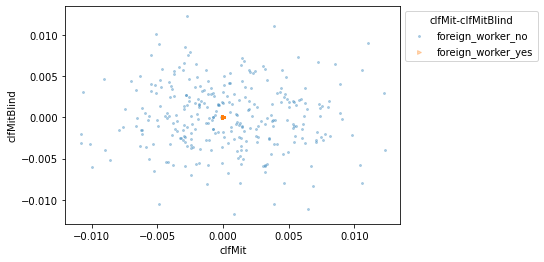

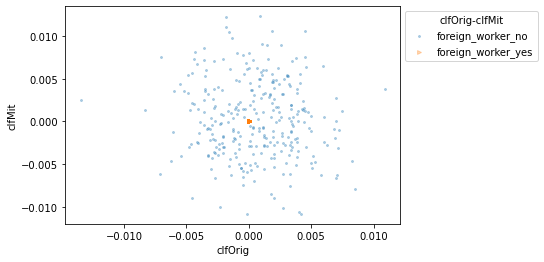

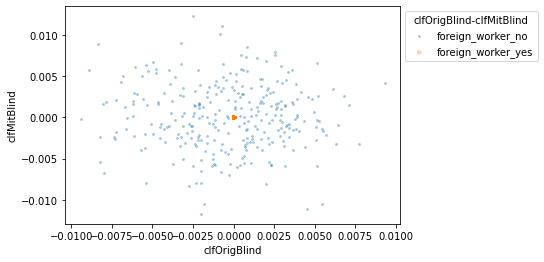

In [94]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [95]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [96]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [97]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [98]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -7.999082           -3.390320   
duration_in_month                     -13.080598          -11.632288   
credit_history                          3.943476            4.095056   
purpose                                 5.664400            5.486719   
credit_amount                         -16.892427          -19.499293   
savings                                -2.333912           -3.860373   
present_emp_since                      -2.112430           -1.780377   
installment_as_income_perc              1.156873            1.576278   
personal_status_sex                     0.858270           -0.191391   
other_debtors                           0.511722            0.505474   
present_res_since                      -1.658044           -0.842875   
property                                0.773656            0.591209   
age                                     5.049733            4.327466   
other_installment_plans                 3.303068            2.587462   
housing                                 2.116085            2.552044   
credits_this_bank                      -0.285878           -0.129785   
job                                     0.741576            0.710982   
people_under_maintenance                1.276997            1.181594   
telephone                               0.004682            0.248604   
foreign_worker_no                      -0.128067           -0.083387   
foreign_worker_yes                     -0.202295           -0.052578   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -5.434347                 -5.955054  
duration_in_month               -11.468810                -13.244076  
credit_history                    4.304213                  3.734320  
purpose                           5.789386                  5.361733  
credit_amount                   -19.066615                -17.325105  
savings                          -3.088178                 -3.106107  
present_emp_since                -1.857703                 -2.035103  
installment_as_income_perc        1.249025                  1.484126  
personal_status_sex               0.458857                  0.208023  
other_debtors                     0.617730                  0.399467  
present_res_since                -1.387552                 -1.113367  
property                          0.922653                  0.442212  
age                               5.048749                  4.328450  
other_installment_plans           3.313661                  2.576869  
housing                           2.619325                  2.048804  
credits_this_bank                -0.206461                 -0.209201  
job                               0.712915                  0.739644  
people_under_maintenance          1.172325                  1.286265  
telephone                         0.058366                  0.194920  
foreign_worker_no                -0.211965                  0.000511  
foreign_worker_yes               -0.254926                  0.000053

In [99]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.008488            0.007784   
duration_in_month                       0.008131            0.008803   
credit_history                          0.004628            0.003679   
purpose                                 0.004148            0.004317   
credit_amount                           0.007229            0.011425   
savings                                 0.004306            0.003413   
present_emp_since                       0.003043            0.002713   
installment_as_income_perc              0.003870            0.003855   
personal_status_sex                     0.002503            0.002657   
other_debtors                           0.000924            0.001088   
present_res_since                       0.002373            0.002470   
property                                0.003461            0.002867   
age                                     0.004281            0.004400   
other_installment_plans                 0.001814            0.002953   
housing                                 0.003595            0.003448   
credits_this_bank                       0.001722            0.001454   
job                                     0.002271            0.002835   
people_under_maintenance                0.000949            0.000999   
telephone                               0.001669            0.002123   
foreign_worker_no                       0.000438            0.000278   
foreign_worker_yes                      0.000686            0.000198   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.013300                  0.008091  
duration_in_month                 0.010590                  0.005883  
credit_history                    0.006966                  0.004280  
purpose                           0.004904                  0.004177  
credit_amount                     0.014238                  0.005423  
savings                           0.006601                  0.005428  
present_emp_since                 0.003080                  0.003089  
installment_as_income_perc        0.003100                  0.004866  
personal_status_sex               0.002773                  0.003240  
other_debtors                     0.001152                  0.000648  
present_res_since                 0.002874                  0.002445  
property                          0.003812                  0.003464  
age                               0.004470                  0.004967  
other_installment_plans           0.003442                  0.002694  
housing                           0.002584                  0.002556  
credits_this_bank                 0.002310                  0.001377  
job                               0.001901                  0.002005  
people_under_maintenance          0.001260                  0.000700  
telephone                         0.001866                  0.002125  
foreign_worker_no                 0.000163                  0.000004  
foreign_worker_yes                0.000515                  0.000005

In [16]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.068           0.233   
SA-Mean                  0.001               0.000           0.000   
NSA-Sum                  3.672               3.431           3.620   
NSA-Mean                 0.004               0.004           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      3.463  
NSA-Mean                     0.004

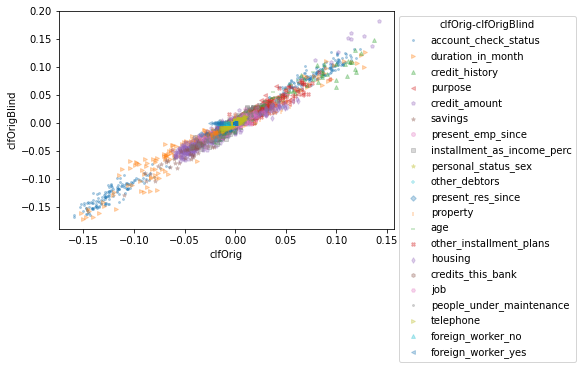

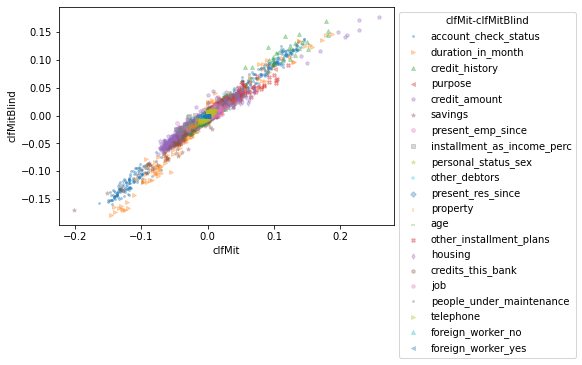

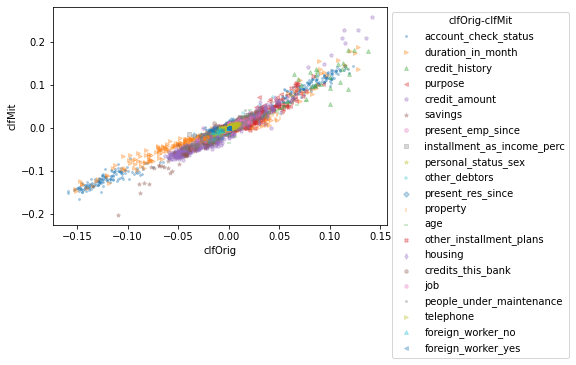

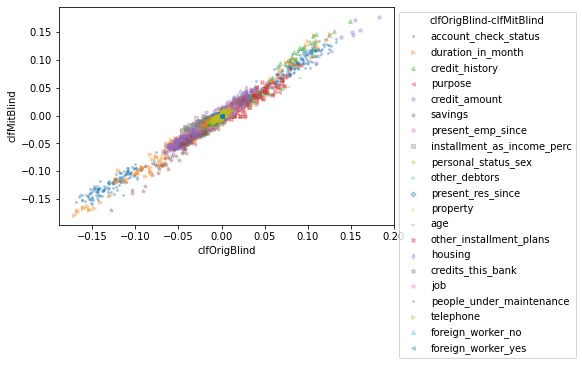

In [101]:
XAIPlots(shap_v,column_names,diffClfs=True)

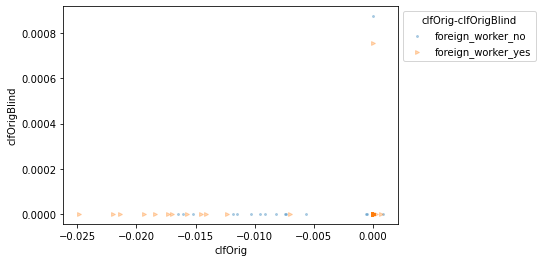

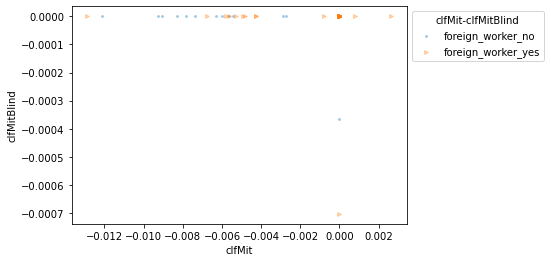

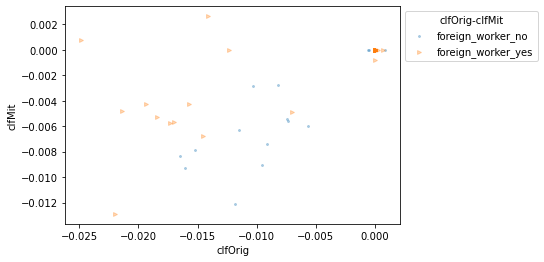

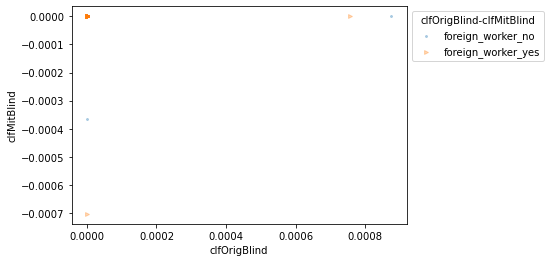

In [102]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [103]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [104]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [105]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [106]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.550618           -1.800162   
duration_in_month                      -1.290606           -1.995586   
credit_history                         -0.624472           -0.725799   
purpose                                 0.944271            1.058423   
credit_amount                          -1.190493           -1.508034   
savings                                 0.167439            0.286797   
present_emp_since                       0.321221            0.426340   
installment_as_income_perc             -0.806840           -0.762111   
personal_status_sex                     0.408357            0.198231   
other_debtors                           0.012420           -0.157431   
present_res_since                      -0.215809            0.032790   
property                                0.335544            0.307013   
age                                     1.167339            1.583301   
other_installment_plans                 1.374358            1.453483   
housing                                -0.042790           -0.384238   
credits_this_bank                      -0.174307           -0.053564   
job                                     0.478674            0.490309   
people_under_maintenance                0.027729            0.091528   
telephone                               0.406883            0.642167   
foreign_worker_no                       0.003315           -0.035716   
foreign_worker_yes                      0.041880           -0.040942   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.689442                 -1.661338  
duration_in_month                -1.555359                 -1.730833  
credit_history                   -0.447772                 -0.902499  
purpose                           1.025534                  0.977161  
credit_amount                    -1.197664                 -1.500863  
savings                           0.222181                  0.232055  
present_emp_since                 0.451476                  0.296085  
installment_as_income_perc       -0.776006                 -0.792945  
personal_status_sex               0.428516                  0.178071  
other_debtors                    -0.024059                 -0.120953  
present_res_since                -0.209040                  0.026021  
property                          0.329108                  0.313449  
age                               1.277222                  1.473418  
other_installment_plans           1.759689                  1.068152  
housing                          -0.246045                 -0.180983  
credits_this_bank                -0.222544                 -0.005326  
job                               0.660381                  0.308601  
people_under_maintenance          0.062361                  0.056896  
telephone                         0.509649                  0.539401  
foreign_worker_no                -0.032402                  0.000000  
foreign_worker_yes                0.000938                  0.000000

In [107]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.007284            0.006038   
duration_in_month                       0.007347            0.007455   
credit_history                          0.003535            0.003170   
purpose                                 0.004045            0.004463   
credit_amount                           0.005607            0.005797   
savings                                 0.003394            0.003223   
present_emp_since                       0.002796            0.002645   
installment_as_income_perc              0.003866            0.003395   
personal_status_sex                     0.001949            0.001927   
other_debtors                           0.001505            0.001482   
present_res_since                       0.002396            0.002421   
property                                0.003921            0.002905   
age                                     0.004184            0.003769   
other_installment_plans                 0.001963            0.003366   
housing                                 0.004695            0.004069   
credits_this_bank                       0.001672            0.001462   
job                                     0.002629            0.002474   
people_under_maintenance                0.001572            0.001402   
telephone                               0.001470            0.001897   
foreign_worker_no                       0.000992            0.000496   
foreign_worker_yes                      0.001692            0.000343   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.009404                  0.006594  
duration_in_month                 0.008746                  0.005706  
credit_history                    0.005083                  0.004312  
purpose                           0.004957                  0.004100  
credit_amount                     0.007651                  0.005153  
savings                           0.007566                  0.005772  
present_emp_since                 0.002995                  0.002752  
installment_as_income_perc        0.003183                  0.004136  
personal_status_sex               0.002106                  0.002322  
other_debtors                     0.001548                  0.001146  
present_res_since                 0.002398                  0.002230  
property                          0.004730                  0.003318  
age                               0.005558                  0.004955  
other_installment_plans           0.003546                  0.002616  
housing                           0.003477                  0.004019  
credits_this_bank                 0.001574                  0.001642  
job                               0.002075                  0.002222  
people_under_maintenance          0.001668                  0.001250  
telephone                         0.001561                  0.001948  
foreign_worker_no                 0.000534                  0.000000  
foreign_worker_yes                0.001499                  0.000000

In [17]:
resSHAP = pd.read_csv(path_res+'US_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'US_RF_ResSHAP_Change_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.023               0.038           0.017   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  0.607               0.735           0.689   
NSA-Mean                 0.003               0.003           0.004   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.651  
NSA-Mean                     0.003

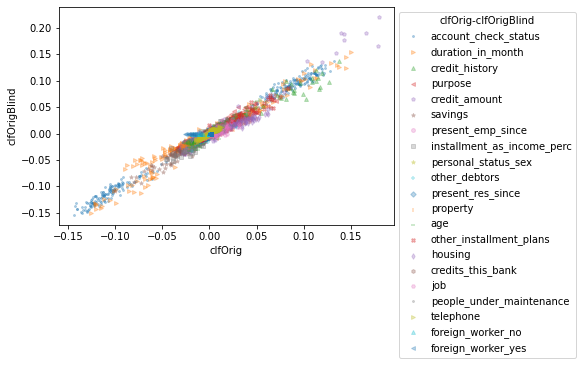

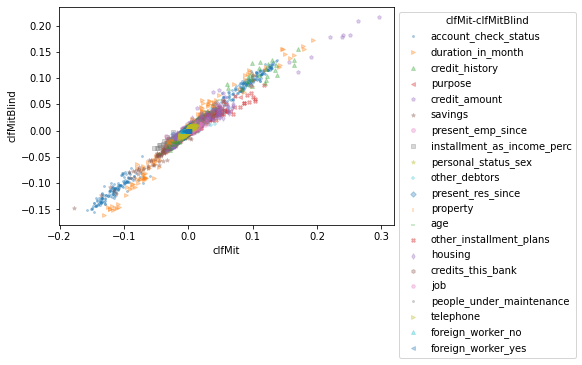

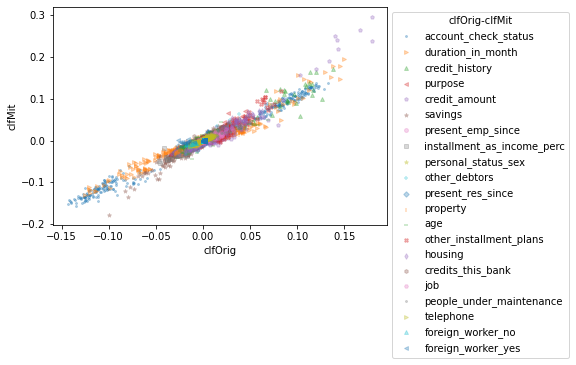

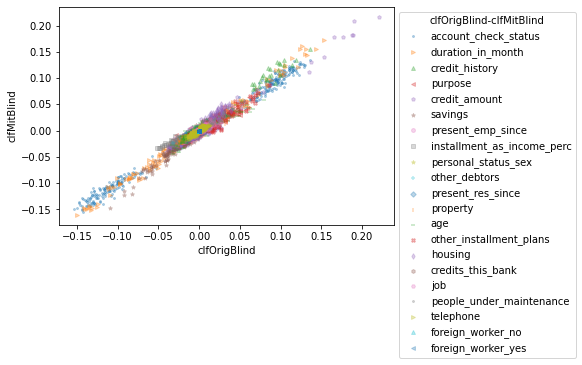

In [109]:
XAIPlots(shap_v,column_names,diffClfs=True)

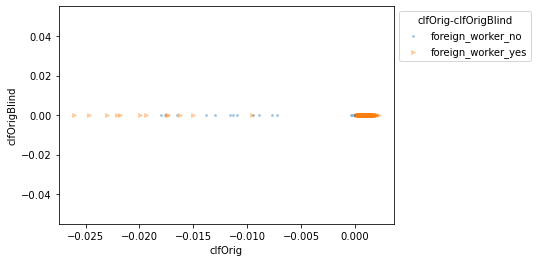

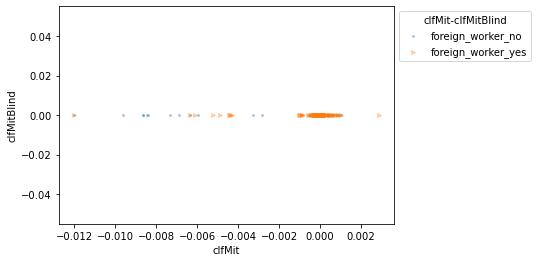

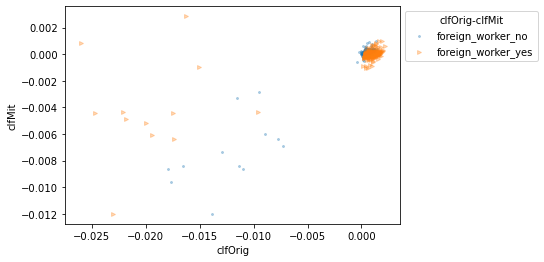

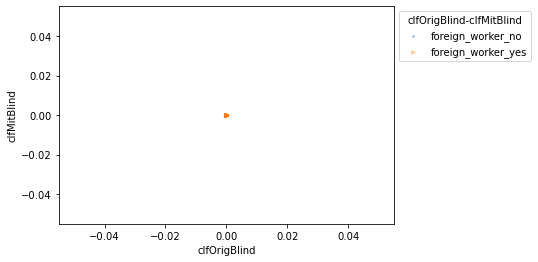

In [110]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [111]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [112]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [113]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [114]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    1.988524           -2.366089   
duration_in_month                     -11.821762          -11.352139   
credit_history                          6.098361            7.498014   
purpose                                 4.860805            5.029548   
credit_amount                         -20.287727          -23.524878   
savings                                 2.446512            2.554677   
present_emp_since                      -0.571456           -0.212991   
installment_as_income_perc              0.131101            0.566896   
personal_status_sex                    -0.198305           -1.081790   
other_debtors                           0.047608            0.510705   
present_res_since                      -0.696124           -0.203494   
property                                1.583963            1.711955   
age                                     3.985647            3.725003   
other_installment_plans                -5.553005           -5.713059   
housing                                -2.262594           -2.457492   
credits_this_bank                      -0.051271           -0.014110   
job                                    -0.735370           -0.905060   
people_under_maintenance               -0.291066           -0.129919   
telephone                               0.431627            1.127863   
foreign_worker_no                       0.038837            0.134659   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.098357                 -0.279208  
duration_in_month               -12.478941                -10.694960  
credit_history                    7.070089                  6.526286  
purpose                           4.796048                  5.094304  
credit_amount                   -22.764735                -21.047869  
savings                           2.263048                  2.738141  
present_emp_since                -0.420464                 -0.363983  
installment_as_income_perc        0.279908                  0.418088  
personal_status_sex              -0.554962                 -0.725134  
other_debtors                     0.527024                  0.031289  
present_res_since                -0.496948                 -0.402670  
property                          1.645563                  1.650355  
age                               4.270330                  3.440319  
other_installment_plans          -5.609829                 -5.656234  
housing                          -2.861519                 -1.858567  
credits_this_bank                 0.076203                 -0.141584  
job                              -0.805182                 -0.835248  
people_under_maintenance         -0.164939                 -0.256046  
telephone                         0.475145                  1.084345  
foreign_worker_no                 0.298877                 -0.125381  
foreign_worker_yes                0.000000                  0.000000

In [115]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.010642            0.005306   
duration_in_month                       0.013335            0.010213   
credit_history                          0.004735            0.005445   
purpose                                 0.005348            0.004904   
credit_amount                           0.010866            0.018693   
savings                                 0.006853            0.005291   
present_emp_since                       0.004651            0.005282   
installment_as_income_perc              0.005124            0.005764   
personal_status_sex                     0.004040            0.004743   
other_debtors                           0.004452            0.005191   
present_res_since                       0.004786            0.004645   
property                                0.004419            0.004882   
age                                     0.007188            0.005220   
other_installment_plans                 0.003925            0.005006   
housing                                 0.005614            0.004689   
credits_this_bank                       0.005137            0.005200   
job                                     0.003992            0.005689   
people_under_maintenance                0.004204            0.004659   
telephone                               0.004785            0.004664   
foreign_worker_no                       0.003883            0.005049   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016004                  0.010283  
duration_in_month                 0.010184                  0.009513  
credit_history                    0.005893                  0.005449  
purpose                           0.004644                  0.004317  
credit_amount                     0.022985                  0.007396  
savings                           0.012232                  0.009405  
present_emp_since                 0.004941                  0.004730  
installment_as_income_perc        0.004848                  0.006505  
personal_status_sex               0.005144                  0.005112  
other_debtors                     0.005054                  0.004476  
present_res_since                 0.004880                  0.004997  
property                          0.004472                  0.004426  
age                               0.005586                  0.006044  
other_installment_plans           0.004483                  0.004085  
housing                           0.004356                  0.004727  
credits_this_bank                 0.005526                  0.004767  
job                               0.004668                  0.004200  
people_under_maintenance          0.004101                  0.003799  
telephone                         0.004793                  0.004909  
foreign_worker_no                 0.004851                  0.004149  
foreign_worker_yes                0.000000                  0.000000

In [18]:
resLIME = pd.read_csv(path_res+'US_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'US_RF_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.019               0.067           0.149   
SA-Mean                  0.002               0.003           0.002   
NSA-Sum                  3.371               3.720           3.561   
NSA-Mean                 0.006               0.006           0.007   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.063  
SA-Mean                      0.002  
NSA-Sum                      3.329  
NSA-Mean                     0.006

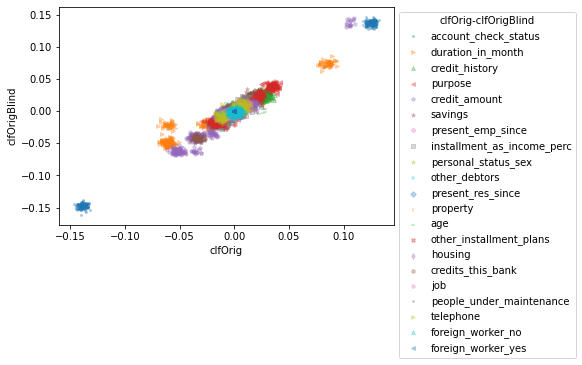

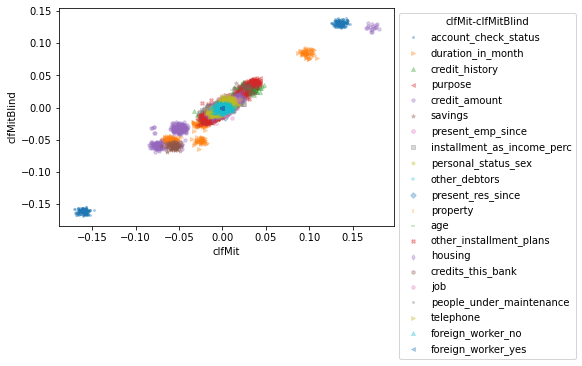

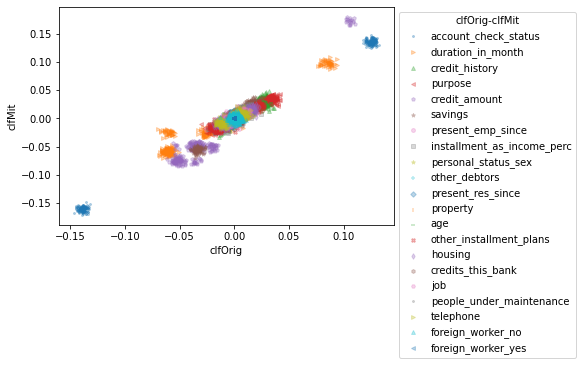

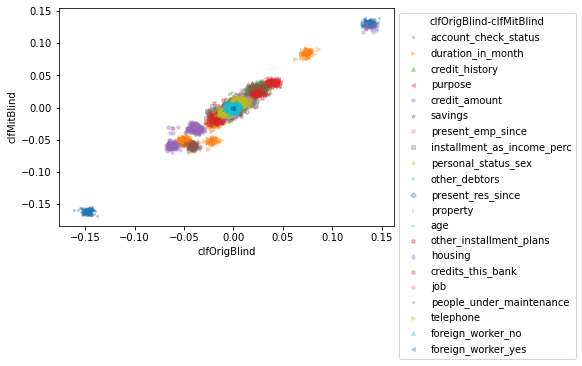

In [117]:
XAIPlots(lime_v,column_names,diffClfs=True)

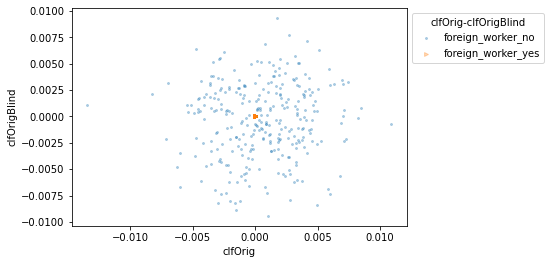

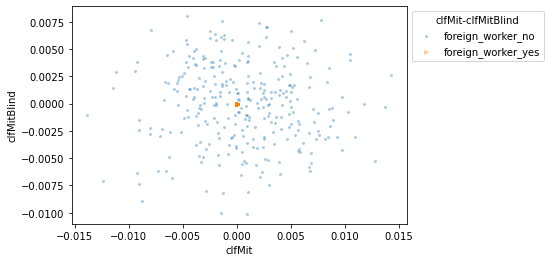

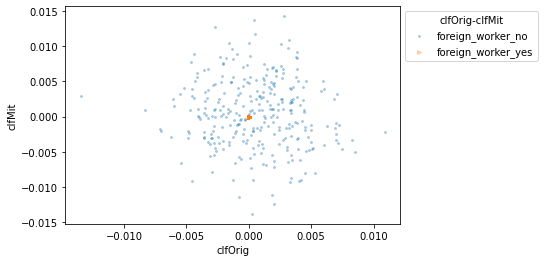

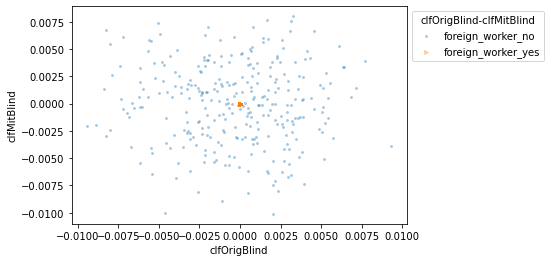

In [118]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [16]:
PIK = "US_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [17]:
PIK = "US_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [18]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -8.576559      -5.380699   
duration_in_month                -13.519060     -10.068388   
credit_history                     4.730549       4.109084   
purpose                            6.506239       5.530277   
credit_amount                    -16.998356     -22.189988   
savings                           -2.380385      -3.638353   
present_emp_since                 -1.808810      -1.739883   
installment_as_income_perc         1.006588       1.399164   
personal_status_sex                0.929321       0.153268   
other_debtors                      0.688447       0.577698   
present_res_since                 -1.912042      -0.996885   
property                           0.859886       0.684026   
age                                5.166409       4.657153   
other_installment_plans            2.992494       2.984311   
housing                            2.844501       3.094654   
credits_this_bank                 -0.275225      -0.125474   
job                                0.851785       0.714507   
people_under_maintenance           1.189736       1.041643   
telephone                         -0.029035       0.197377   
foreign_worker_no                 -0.254942      -0.167599   
foreign_worker_yes                -0.408084      -0.104916   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.122542                -6.234861  
duration_in_month                          -12.996502               -12.709148  
credit_history                               3.173245                 4.183018  
purpose                                      5.691639                 5.142929  
credit_amount                              -17.741544               -16.958877  
savings                                     -1.820682                -4.554385  
present_emp_since                           -2.302231                -1.732854  
installment_as_income_perc                   1.394875                 1.593157  
personal_status_sex                          0.717675                -0.317576  
other_debtors                                0.378377                 0.444114  
present_res_since                           -1.301774                -0.783286  
property                                     0.518564                 0.450672  
age                                          4.974524                 3.795016  
other_installment_plans                      3.001511                 1.830717  
housing                                      2.001016                 2.554579  
credits_this_bank                           -0.239403                -0.217195  
job                                          0.641896                 0.558466  
people_under_maintenance                     1.306533                 1.240399  
telephone                                    0.153376                 0.146595  
foreign_worker_no                            0.001979                -0.000364  
foreign_worker_yes                           0.000755                -0.000703

In [19]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000646       0.010566   
duration_in_month                  0.001706       0.001013   
credit_history                     0.000535       0.000874   
purpose                            0.002323       0.000951   
credit_amount                      0.001939       0.001625   
savings                            0.000989       0.001078   
present_emp_since                  0.000499       0.000629   
installment_as_income_perc         0.000782       0.000499   
personal_status_sex                0.000502       0.000641   
other_debtors                      0.000240       0.000222   
present_res_since                  0.000392       0.000627   
property                           0.000701       0.000607   
age                                0.000418       0.001102   
other_installment_plans            0.001665       0.000720   
housing                            0.001631       0.000828   
credits_this_bank                  0.000364       0.000476   
job                                0.000573       0.000486   
people_under_maintenance           0.000132       0.000259   
telephone                          0.000500       0.000411   
foreign_worker_no                  0.000023       0.000017   
foreign_worker_yes                 0.000022       0.000018   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000783                 0.005550  
duration_in_month                            0.000555                 0.002205  
credit_history                               0.000369                 0.000626  
purpose                                      0.000629                 0.000403  
credit_amount                                0.001291                 0.001116  
savings                                      0.000771                 0.001363  
present_emp_since                            0.000321                 0.000383  
installment_as_income_perc                   0.000649                 0.000560  
personal_status_sex                          0.000462                 0.000413  
other_debtors                                0.000177                 0.000234  
present_res_since                            0.000420                 0.000372  
property                                     0.000329                 0.000425  
age                                          0.000318                 0.000542  
other_installment_plans                      0.000579                 0.000750  
housing                                      0.000535                 0.001149  
credits_this_bank                            0.000391                 0.000482  
job                                          0.000497                 0.000625  
people_under_maintenance                     0.000093                 0.000073  
telephone                                    0.000395                 0.000617  
foreign_worker_no                            0.000007                 0.000001  
foreign_worker_yes                           0.000003                 0.000002

In [20]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.332          0.136                      0.001   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             3.856          3.646                      3.551   
NSA-Mean            0.001          0.001                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     3.445  
NSA-Mean                    0.001

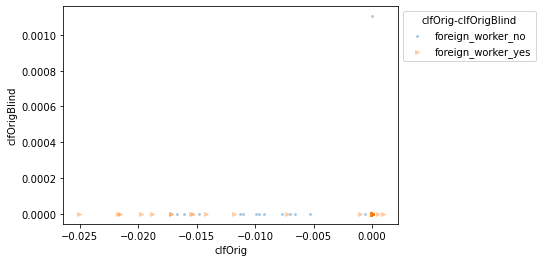

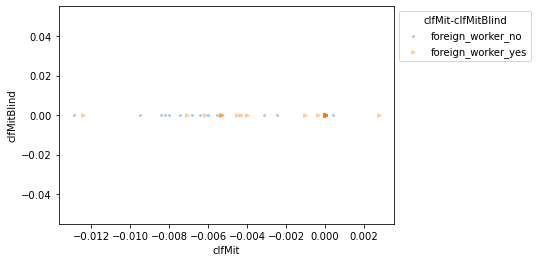

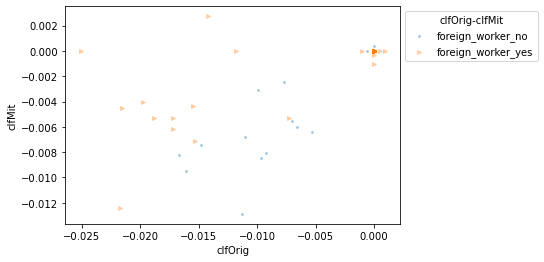

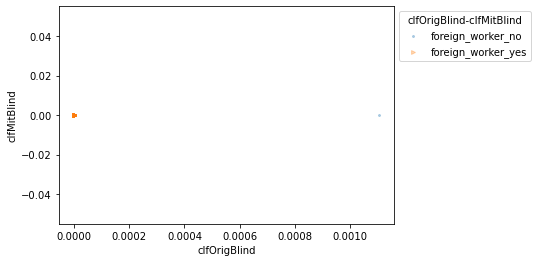

In [21]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [22]:
PIK = "US_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [23]:
PIK = "US_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [24]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -1.437498      -1.941385   
duration_in_month                 -1.432442      -1.678277   
credit_history                    -0.353707      -0.541837   
purpose                            0.888453       1.162615   
credit_amount                     -0.976589      -1.418738   
savings                            0.198247       0.246114   
present_emp_since                  0.326180       0.576772   
installment_as_income_perc        -0.615139      -0.936872   
personal_status_sex                0.577070       0.279963   
other_debtors                      0.027953      -0.076070   
present_res_since                 -0.351804      -0.066276   
property                           0.273902       0.384314   
age                                0.879607       1.674838   
other_installment_plans            1.605566       1.913813   
housing                            0.020598      -0.512688   
credits_this_bank                 -0.373033      -0.072055   
job                                0.780526       0.540237   
people_under_maintenance           0.094507       0.030215   
telephone                          0.396702       0.622596   
foreign_worker_no                  0.006630      -0.071433   
foreign_worker_yes                 0.083760      -0.081884   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.663738                -1.658938  
duration_in_month                           -1.148770                -2.312896  
credit_history                              -0.895236                -0.909761  
purpose                                      1.000089                 0.954232  
credit_amount                               -1.404397                -1.597329  
savings                                      0.136631                 0.327479  
present_emp_since                            0.316263                 0.275908  
installment_as_income_perc                  -0.998541                -0.587349  
personal_status_sex                          0.239644                 0.116498  
other_debtors                               -0.003113                -0.238792  
present_res_since                           -0.079814                 0.131856  
property                                     0.397186                 0.229711  
age                                          1.455072                 1.491764  
other_installment_plans                      1.143150                 0.993154  
housing                                     -0.106177                -0.255788  
credits_this_bank                            0.024420                -0.035073  
job                                          0.176822                 0.440380  
people_under_maintenance                    -0.039048                 0.152841  
telephone                                    0.417064                 0.661738  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [25]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [26]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.045          0.077                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             0.611          0.772                      0.613   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.000  
SA-Mean                     0.000  
NSA-Sum                     0.704  
NSA-Mean                    0.000

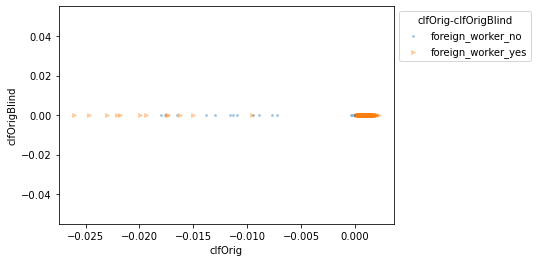

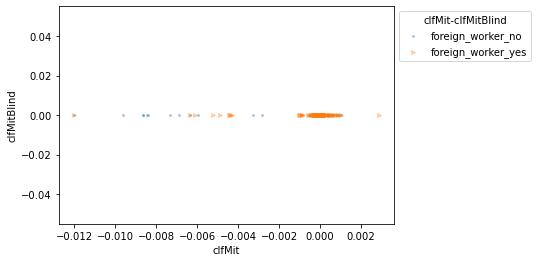

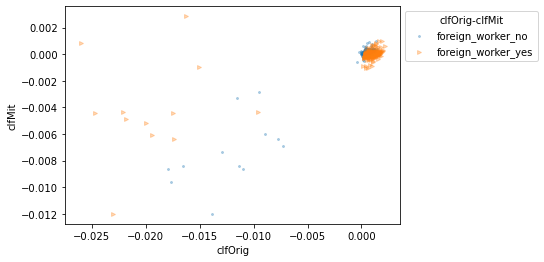

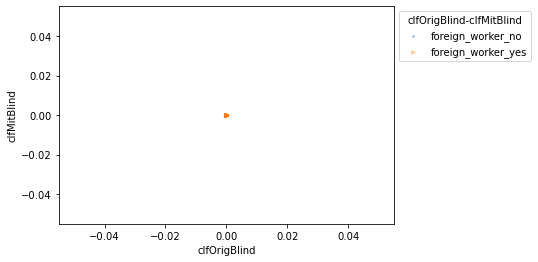

In [27]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [28]:
PIK = "US_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [29]:
PIK = "US_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [30]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               1.240054       1.631708   
duration_in_month                -14.394134     -11.665410   
credit_history                     6.839240       6.564770   
purpose                            4.894924       4.872797   
credit_amount                    -18.222492     -28.696128   
savings                            1.979953       2.387473   
present_emp_since                 -0.555709      -0.511392   
installment_as_income_perc         0.172658       0.078654   
personal_status_sex               -0.401495      -0.560044   
other_debtors                     -0.013529       1.026769   
present_res_since                 -0.734974      -0.226589   
property                           1.814931       1.471006   
age                                4.970347       4.268698   
other_installment_plans           -5.360513      -6.359789   
housing                           -2.849908      -2.891593   
credits_this_bank                  0.076828       0.133273   
job                               -0.804795      -0.975284   
people_under_maintenance          -0.184650      -0.202535   
telephone                          0.027729       0.802031   
foreign_worker_no                  0.306869       0.226371   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         2.736993                -2.575424  
duration_in_month                           -9.249390               -12.857124  
credit_history                               5.357482                 7.089240  
purpose                                      4.826685                 5.293225  
credit_amount                              -22.352961               -20.006513  
savings                                      2.913071                 2.436817  
present_emp_since                           -0.587203                -0.382086  
installment_as_income_perc                   0.089544                 0.593087  
personal_status_sex                          0.004885                -1.346360  
other_debtors                                0.108745                -0.102955  
present_res_since                           -0.657274                -0.021316  
property                                     1.352995                 1.858490  
age                                          3.000947                 4.035154  
other_installment_plans                     -5.745496                -5.772450  
housing                                     -1.675281                -2.010516  
credits_this_bank                           -0.179371                -0.103181  
job                                         -0.665945                -0.911697  
people_under_maintenance                    -0.397483                -0.319573  
telephone                                    0.835525                 1.145234  
foreign_worker_no                           -0.229196                 0.013528  
foreign_worker_yes                           0.000000                 0.000000

In [31]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.010369   
duration_in_month                       0.0       0.009518   
credit_history                          0.0       0.005986   
purpose                                 0.0       0.005625   
credit_amount                           0.0       0.007133   
savings                                 0.0       0.005982   
present_emp_since                       0.0       0.005163   
installment_as_income_perc              0.0       0.004731   
personal_status_sex                     0.0       0.004750   
other_debtors                           0.0       0.004191   
present_res_since                       0.0       0.004571   
property                                0.0       0.004485   
age                                     0.0       0.006187   
other_installment_plans                 0.0       0.005593   
housing                                 0.0       0.004043   
credits_this_bank                       0.0       0.004639   
job                                     0.0       0.004778   
people_under_maintenance                0.0       0.004174   
telephone                               0.0       0.004776   
foreign_worker_no                       0.0       0.004584   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                 0.003972  
duration_in_month                                 0.0                 0.005914  
credit_history                                    0.0                 0.004987  
purpose                                           0.0                 0.004449  
credit_amount                                     0.0                 0.005719  
savings                                           0.0                 0.005536  
present_emp_since                                 0.0                 0.005040  
installment_as_income_perc                        0.0                 0.004783  
personal_status_sex                               0.0                 0.004611  
other_debtors                                     0.0                 0.004511  
present_res_since                                 0.0                 0.004616  
property                                          0.0                 0.004235  
age                                               0.0                 0.004804  
other_installment_plans                           0.0                 0.004565  
housing                                           0.0                 0.004116  
credits_this_bank                                 0.0                 0.004276  
job                                               0.0                 0.004567  
people_under_maintenance                          0.0                 0.004068  
telephone                                         0.0                 0.004273  
foreign_worker_no                                 0.0                 0.004265  
foreign_worker_yes                                0.0                 0.000000

In [32]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.153          0.113                      0.115   
SA-Mean             0.000          0.002                      0.000   
NSA-Sum             3.449          3.965                      3.302   
NSA-Mean            0.000          0.006                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.007  
SA-Mean                     0.002  
NSA-Sum                     3.624  
NSA-Mean                    0.005

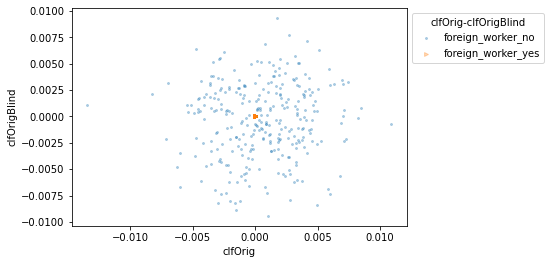

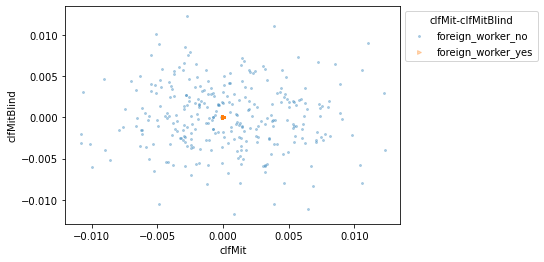

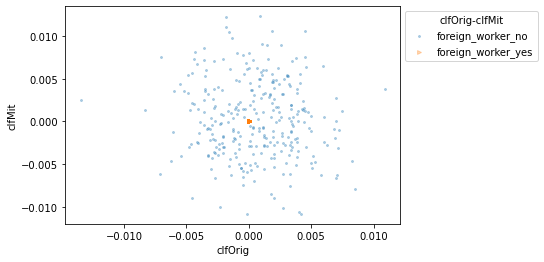

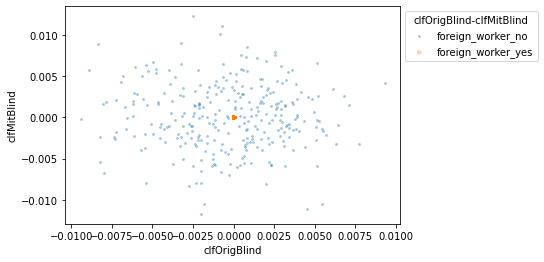

In [33]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

## Preferential Sampling

In [137]:
filename = 'german_credit.csv'
path_res = '/Users/Marta/FAccT/Res-GERMAN/'
path_data = 'datasets/'
sensitive = ['foreign_worker'] #OR personal_status_sex
df = prepare_german_dataset(filename, path_data, sensitive)

In [138]:
target = 'target'
column_names = df.columns.values.tolist()
column_names.remove(target)
class_names=['Good','Bad']
#There are two classes, 1 for good customers and 2 for bad customers
#in LORE 0 sta per 1 e 1 sta per 2, quindi 0 è good e 1 è bad  
adClass=0
disClass=1
protected = ['foreign_worker_no','foreign_worker_yes']
protected_feature='foreigners' 
non_sensitive = [elem for elem in column_names if elem not in protected]
adAttr=None
disAttr=None

In [139]:
X,Y,X_blind,X_train,X_test,y_train,y_test,df=prepare_for_sampling(df,protected)

In [140]:
findFreq(target,protected,df)

({'foreign_worker_no': 22, 'foreign_worker_yes': 464},
 {'foreign_worker_no': 3, 'foreign_worker_yes': 211})

In [141]:

ranker = rankers(X,X_blind,Y)

Non-Blind Rankers
GaussianNB(var_smoothing=1.519911082952933e-08)
LogisticRegression(C=0.012742749857031334, solver='liblinear')
RandomForestClassifier(criterion='entropy', max_depth=7, n_estimators=200)


The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Non-Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

           Gaussian Naive Bayes  Calibrated Gaussian Naive Bayes  \
Accuracy               0.715000                         0.720000   
Precision              0.537454                         0.568779   
Recall                 0.373333                         0.273333   
F1 Score               0.438013                         0.365332   

           Logistic Regression  Calibrated Logistic Regression  Random Forest  \
Accuracy              0.734000                        0.734000       0.734000   
Precision             0.634785                        0.630620       0.676402   
Recall                0.280000                        0.286667       0.233333   
F1 Score              0.385828                        0.391353       0.342226   

           Calibrated Random Forest  Support Vector Classifier  \
Accuracy                   0.753000                        0.7   
Precision                  0.644390                        0.0   
Recall                     0.410000                    

The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.


SVC(C=0.1, gamma=1, probability=True)
Blind Rankers Evaluation


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zer

           Blind Gaussian Naive Bayes  Blind Calibrated Gaussian Naive Bayes  \
Accuracy                     0.719000                               0.722000   
Precision                    0.560182                               0.578978   
Recall                       0.316667                               0.270000   
F1 Score                     0.400995                               0.364410   

           Blind Logistic Regression  Blind Calibrated Logistic Regression  \
Accuracy                    0.734000                              0.734000   
Precision                   0.634785                              0.630620   
Recall                      0.280000                              0.286667   
F1 Score                    0.385828                              0.391353   

           Blind Random Forest  Blind Calibrated Random Forest  \
Accuracy              0.744000                        0.750000   
Precision             0.702972                        0.643714   
Recall    

Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


In [142]:

PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(ranker, f)

In [143]:
PIK = "Ranker.dat"
with open(path_res+"/"+PIK, "rb") as f:
  ranker = pickle.load(f)

In [144]:
df_new=PreferentialSampling(target,protected,ranker,df,adClass,disClass,adAttr,disAttr)

Counting labels = 0  {'foreign_worker_no': 22, 'foreign_worker_yes': 464}
Counting labels = 1  {'foreign_worker_no': 3, 'foreign_worker_yes': 211}
DN  ('foreign_worker_yes', 211)
FP  ('foreign_worker_no', 22)
DP  ('foreign_worker_yes', 464)
FN  ('foreign_worker_no', 3)
Len DN_df  211
Len FP_df  22
Len DP_df  464
Len FN_df  3
Len restData 0


elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


DN_expected  206
5 to be removed
Len DN_df after sampling  206
FP_expected  17
5 to be removed
Len FP_df after sampling  17
DP_expected  469
5 to add
Len DP_df after sampling  469
FN_expected  8
5 to add
Len FN_df after sampling  8


In [145]:
findFreq(target,protected,df_new)

({'foreign_worker_no': 17, 'foreign_worker_yes': 469},
 {'foreign_worker_no': 8, 'foreign_worker_yes': 206})

In [146]:
X_train,X_train_blind,X_train_mod,X_train_mod_blind,y_train_mod,X_test,X_test_blind=prepare_for_classification(df_new,X_train,X_test,column_names,protected,True)

### MLP

In [147]:

clf = MLPClassifier()
param_grid = dict(hidden_layer_sizes=[(50, 50, 50), (50, 100, 50)],
                          activation=['tanh', 'relu'],
                          solver=['sgd', 'adam'],
                          alpha=[0.0001, 0.05],
                          learning_rate=['constant', 'adaptive']
                          )

In [148]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_MLP_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
Precision is ill-d

---> CLF Original: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 260 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 288 ]
Unfavoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]


Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.713333            0.713333       0.713333   
Precision           0.000000            0.000000       0.000000   
Recall              0.000000            0.000000       0.000000   
F1 Score            0.000000            0.000000       0.000000   
Discrimination      0.000000            0.000000       0.097222   

                CLF Mitigated Blind    Best Score  Delta O-OB  Delta M-MB  \
Accuracy                   0.713333  CLF Original         0.0    0.000000   
Precision                  0.000000  CLF Original         0.0    0.000000   
Recall                     0.000000  CLF Original         0.0    0.000000   
F1 Score                   0.000000  CLF Original         0.0    0.000000   
Discrimination             0.000000  CLF Original         0.0    0.097222   

                Delta O-M  Delta OB-MB  
Accuracy         0.000000          0.0  
Precision        0.000000          0.0  
Recall           0.000000          0.0  
F1 Score         0.000000          0.0  
Discrimination   0.097222          0.0

In [149]:

PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [150]:
PIK = "PS_Clfs_MLP.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [5]:
res = pd.read_csv(path_res+'PS_MLP_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_MLP_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.713               0.713          0.713   
Precision              0.000               0.000          0.000   
Recall                 0.000               0.000          0.000   
F1 Score               0.000               0.000          0.000   
Discrimination         0.000               0.000          0.097   

                CLF Mitigated Blind    Best Score  Delta O-OB  Delta M-MB  \
Accuracy                      0.713  CLF Original         0.0       0.000   
Precision                     0.000  CLF Original         0.0       0.000   
Recall                        0.000  CLF Original         0.0       0.000   
F1 Score                      0.000  CLF Original         0.0       0.000   
Discrimination                0.000  CLF Original         0.0       0.097   

                Delta O-M  Delta OB-MB  
Accuracy            0.000          0.0  
Precision           0.000          0.0  
Recall              0.000          0.0  
F1 Score            0.000          0.0  
Discrimination      0.097          0.0

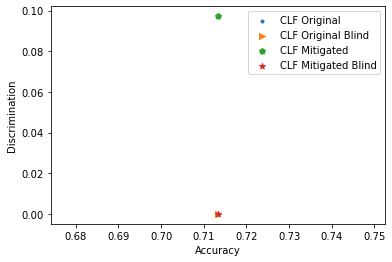

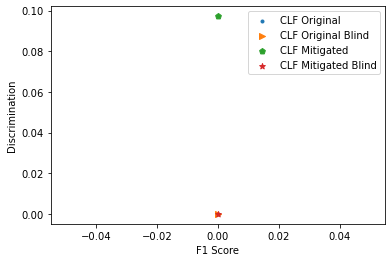

In [8]:
plotDisc(res)

In [153]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [154]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
    *  NOT  satisfied for "('foreign_worker_no',)" and "('foreign_worker_yes',)" sub-populations.
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


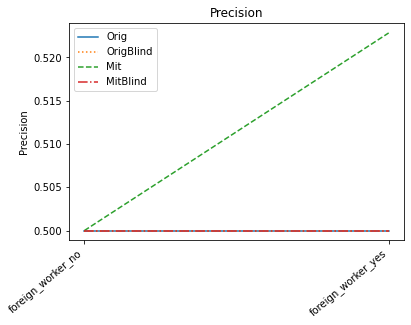

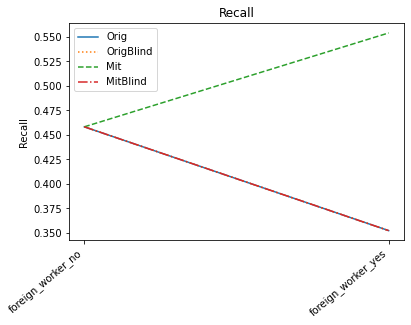

In [155]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [156]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [157]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [158]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [159]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.002500           -0.397355   
duration_in_month                       0.029409           -6.273120   
credit_history                          0.000000            0.081939   
purpose                                 0.000000           -0.196331   
credit_amount                          -0.025225           10.705847   
savings                                 0.003599           -0.050912   
present_emp_since                       0.000000            0.034391   
installment_as_income_perc              0.000718            0.134336   
personal_status_sex                    -0.003781            0.097209   
other_debtors                          -0.000316           -0.039878   
present_res_since                       0.001159            0.024561   
property                                0.000000            0.089353   
age                                    -0.002931            1.022487   
other_installment_plans                 0.000966           -0.030401   
housing                                 0.000000           -0.012295   
credits_this_bank                       0.000000            0.017638   
job                                    -0.002337           -0.000790   
people_under_maintenance                0.000387            0.062877   
telephone                               0.000850            0.021918   
foreign_worker_no                       0.000000           -0.033307   
foreign_worker_yes                      0.000000            0.002000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.390278                 -0.009577  
duration_in_month                -6.550799                  0.307089  
credit_history                    0.082860                 -0.000921  
purpose                          -0.156951                 -0.039380  
credit_amount                    11.549664                 -0.869041  
savings                          -0.037490                 -0.009823  
present_emp_since                 0.034725                 -0.000333  
installment_as_income_perc        0.127397                  0.007656  
personal_status_sex               0.094546                 -0.001117  
other_debtors                    -0.039454                 -0.000740  
present_res_since                 0.027451                 -0.001731  
property                          0.075331                  0.014022  
age                               0.811557                  0.207999  
other_installment_plans          -0.025891                 -0.003544  
housing                          -0.012063                 -0.000232  
credits_this_bank                 0.014988                  0.002650  
job                              -0.010484                  0.007357  
people_under_maintenance          0.056137                  0.007127  
telephone                         0.019130                  0.003638  
foreign_worker_no                -0.032678                 -0.000629  
foreign_worker_yes                0.002000                  0.000000

In [160]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.000006            0.006514   
duration_in_month                       0.000060            0.044178   
credit_history                          0.000000            0.004035   
purpose                                 0.000000            0.001783   
credit_amount                           0.000095            0.070161   
savings                                 0.000012            0.001860   
present_emp_since                       0.000000            0.002999   
installment_as_income_perc              0.000002            0.003863   
personal_status_sex                     0.000013            0.001831   
other_debtors                           0.000001            0.000195   
present_res_since                       0.000004            0.001081   
property                                0.000000            0.000789   
age                                     0.000040            0.006619   
other_installment_plans                 0.000003            0.000298   
housing                                 0.000000            0.000107   
credits_this_bank                       0.000000            0.000347   
job                                     0.000005            0.000252   
people_under_maintenance                0.000001            0.000242   
telephone                               0.000003            0.000082   
foreign_worker_no                       0.000000            0.000111   
foreign_worker_yes                      0.000000            0.000017   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.006662                  0.000178  
duration_in_month                 0.043224                  0.002726  
credit_history                    0.004038                  0.000028  
purpose                           0.001668                  0.000270  
credit_amount                     0.066509                  0.010931  
savings                           0.001813                  0.000146  
present_emp_since                 0.002954                  0.000045  
installment_as_income_perc        0.003987                  0.000146  
personal_status_sex               0.001681                  0.000162  
other_debtors                     0.000190                  0.000005  
present_res_since                 0.001073                  0.000012  
property                          0.000859                  0.000086  
age                               0.009658                  0.003564  
other_installment_plans           0.000287                  0.000048  
housing                           0.000091                  0.000016  
credits_this_bank                 0.000239                  0.000118  
job                               0.000246                  0.000063  
people_under_maintenance          0.000247                  0.000041  
telephone                         0.000079                  0.000016  
foreign_worker_no                 0.000109                  0.000002  
foreign_worker_yes                0.000017                  0.000000

In [19]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.000               0.018           0.017   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.004               1.015           1.059   
NSA-Mean                 0.000               0.008           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.079  
NSA-Mean                     0.001

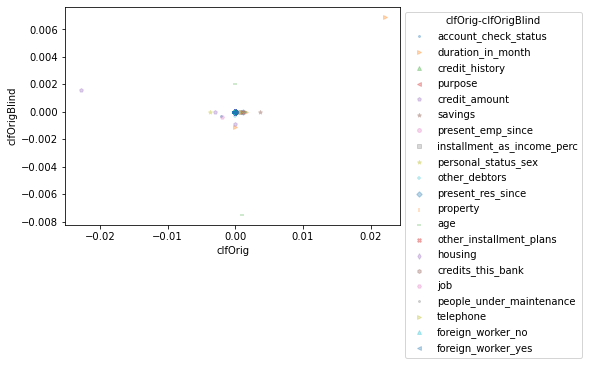

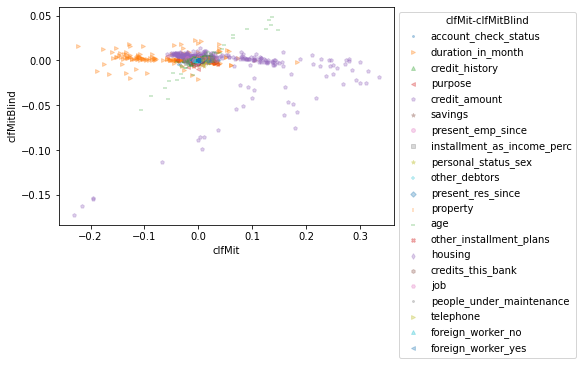

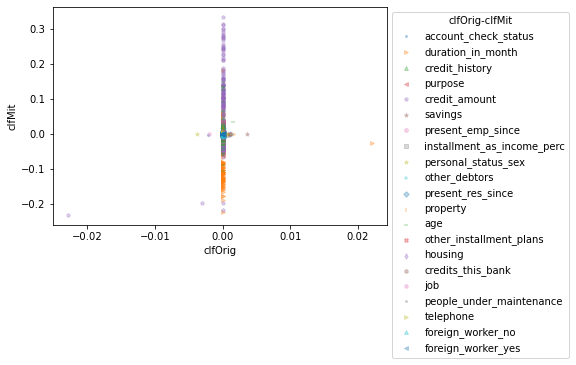

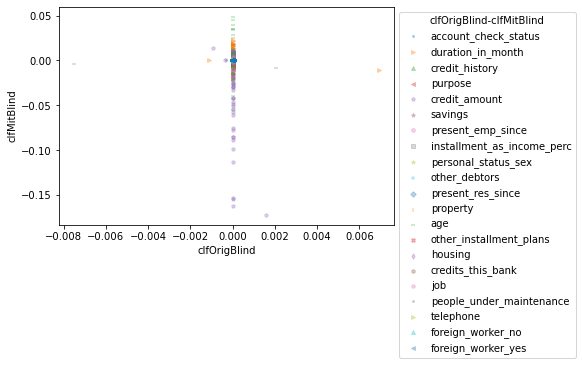

In [162]:
XAIPlots(shap_v,column_names,diffClfs=True)

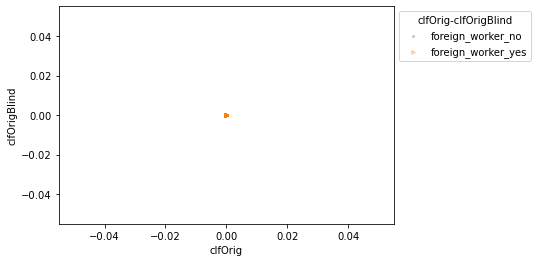

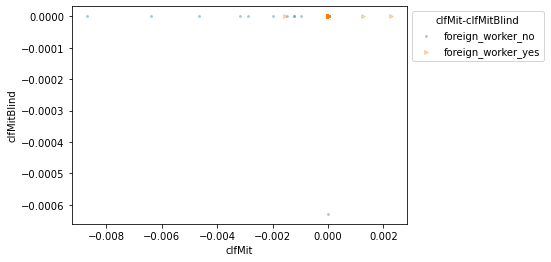

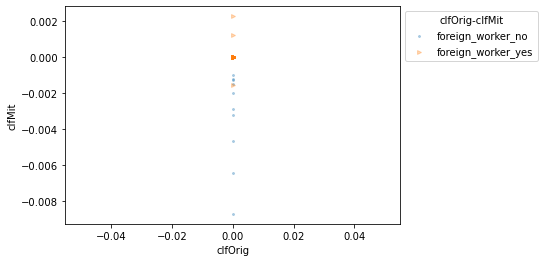

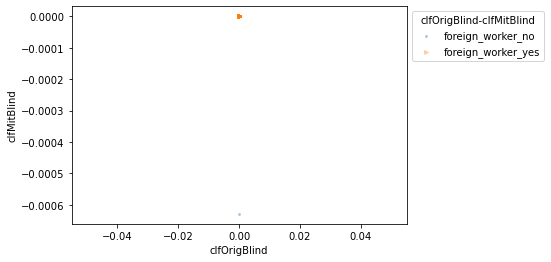

In [163]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [164]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [165]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [166]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [167]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.000099            0.093893   
duration_in_month                       0.000074           -4.810642   
credit_history                          0.000179            0.345678   
purpose                                -0.000365            0.003324   
credit_amount                           0.000315           14.826540   
savings                                -0.000312           -0.327637   
present_emp_since                      -0.000100           -0.080989   
installment_as_income_perc             -0.000114           -0.069446   
personal_status_sex                     0.000024            0.094343   
other_debtors                           0.000295            0.242865   
present_res_since                       0.000086           -0.079467   
property                                0.000136           -0.014341   
age                                     0.000272            0.197900   
other_installment_plans                 0.000162            0.075940   
housing                                -0.000675           -0.017903   
credits_this_bank                       0.000181            0.016194   
job                                     0.000046           -0.031390   
people_under_maintenance               -0.000190           -0.092720   
telephone                               0.000183            0.039752   
foreign_worker_no                      -0.000251            0.046287   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.074942                  0.019050  
duration_in_month                -5.154011                  0.343443  
credit_history                    0.318349                  0.027508  
purpose                          -0.016797                  0.019755  
credit_amount                    16.979300                 -2.152446  
savings                          -0.377230                  0.049280  
present_emp_since                -0.074685                 -0.006404  
installment_as_income_perc       -0.060045                 -0.009515  
personal_status_sex               0.100551                 -0.006183  
other_debtors                     0.241944                  0.001216  
present_res_since                -0.075249                 -0.004132  
property                         -0.036765                  0.022560  
age                               0.140413                  0.057759  
other_installment_plans           0.062941                  0.013161  
housing                           0.004207                 -0.022784  
credits_this_bank                -0.006214                  0.022589  
job                              -0.022512                 -0.008832  
people_under_maintenance         -0.079288                 -0.013623  
telephone                         0.042499                 -0.002564  
foreign_worker_no                 0.032915                  0.013120  
foreign_worker_yes                0.000000                  0.000000

In [168]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.000003            0.005200   
duration_in_month                       0.000002            0.036959   
credit_history                          0.000003            0.003895   
purpose                                 0.000003            0.002944   
credit_amount                           0.000005            0.139163   
savings                                 0.000004            0.003517   
present_emp_since                       0.000002            0.003671   
installment_as_income_perc              0.000002            0.003746   
personal_status_sex                     0.000002            0.003164   
other_debtors                           0.000003            0.002962   
present_res_since                       0.000004            0.002833   
property                                0.000004            0.003041   
age                                     0.000004            0.004677   
other_installment_plans                 0.000003            0.003094   
housing                                 0.000003            0.002793   
credits_this_bank                       0.000003            0.002908   
job                                     0.000002            0.002837   
people_under_maintenance                0.000003            0.002616   
telephone                               0.000003            0.002821   
foreign_worker_no                       0.000003            0.002780   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.005386                  0.000646  
duration_in_month                 0.033848                  0.003216  
credit_history                    0.003947                  0.000591  
purpose                           0.002960                  0.000758  
credit_amount                     0.122421                  0.017044  
savings                           0.003260                  0.000664  
present_emp_since                 0.003571                  0.000624  
installment_as_income_perc        0.003828                  0.000643  
personal_status_sex               0.003033                  0.000578  
other_debtors                     0.002853                  0.000573  
present_res_since                 0.002796                  0.000560  
property                          0.003038                  0.000633  
age                               0.006983                  0.002704  
other_installment_plans           0.003092                  0.000574  
housing                           0.002737                  0.000527  
credits_this_bank                 0.002821                  0.000675  
job                               0.002725                  0.000613  
people_under_maintenance          0.002628                  0.000549  
telephone                         0.002791                  0.000606  
foreign_worker_no                 0.002778                  0.000544  
foreign_worker_yes                0.000000                  0.000000

In [20]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                     0.0               0.023           0.016   
SA-Mean                    0.0               0.001           0.001   
NSA-Sum                    0.0               1.130           1.256   
NSA-Mean                   0.0               0.012           0.011   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.007  
SA-Mean                      0.000  
NSA-Sum                      0.148  
NSA-Mean                     0.002

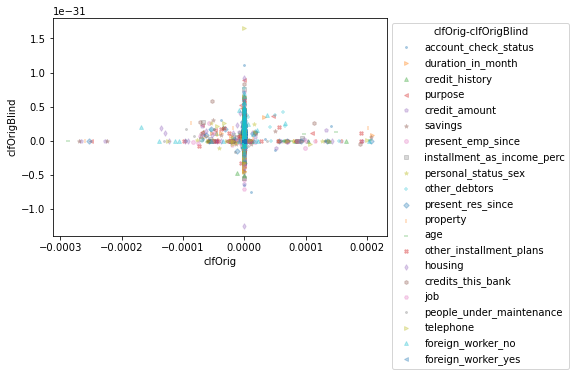

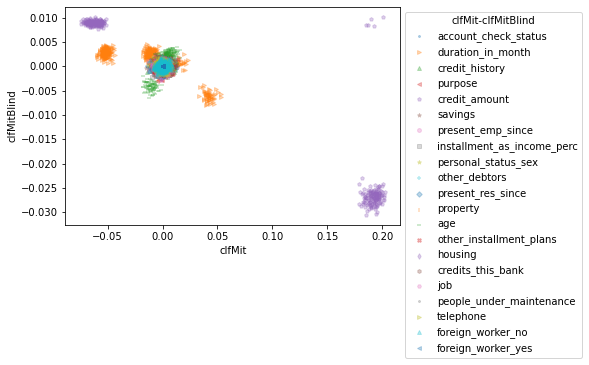

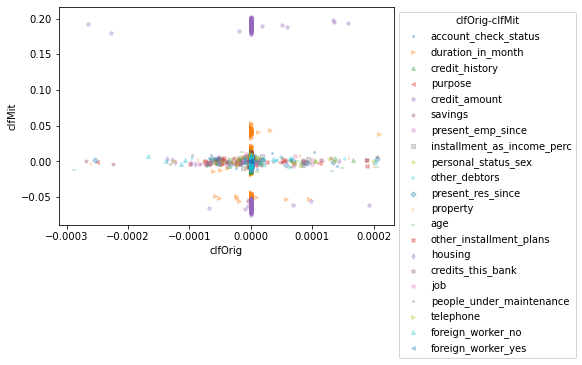

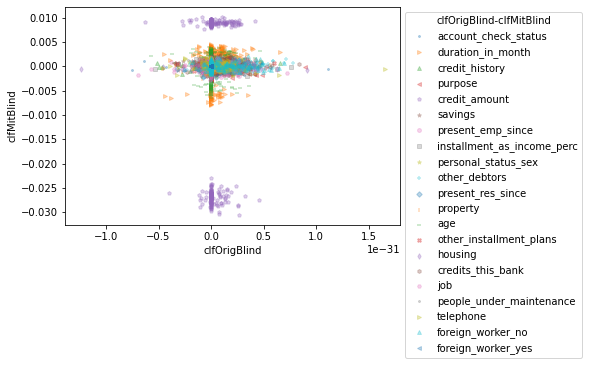

In [170]:
XAIPlots(lime_v,column_names,diffClfs=True)

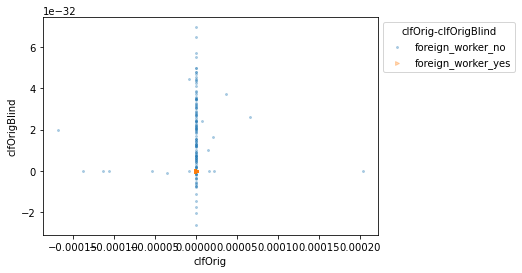

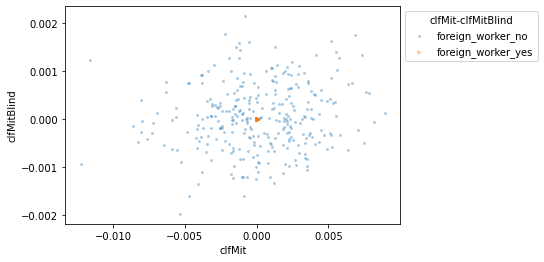

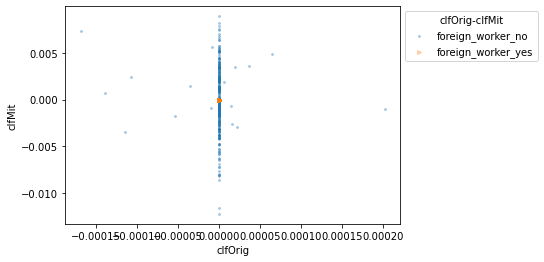

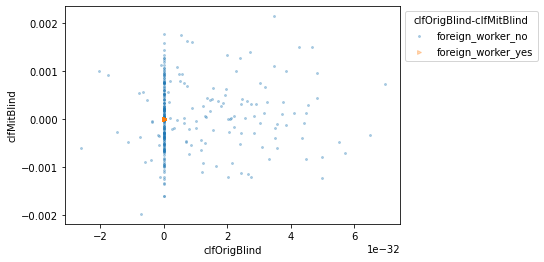

In [171]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [172]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [173]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [174]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [175]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -0.002191           -0.395268   
duration_in_month                       0.024064           -6.690276   
credit_history                          0.000937            0.086890   
purpose                                 0.000000           -0.164466   
credit_amount                          -0.017454           11.605500   
savings                                 0.003242           -0.034423   
present_emp_since                      -0.000370            0.014988   
installment_as_income_perc              0.000388            0.211716   
personal_status_sex                    -0.004283            0.124181   
other_debtors                          -0.000283           -0.046035   
present_res_since                       0.002097           -0.001203   
property                                0.000000            0.098150   
age                                    -0.004421            0.906038   
other_installment_plans                 0.001178           -0.019951   
housing                                 0.000000           -0.006608   
credits_this_bank                      -0.000528            0.018355   
job                                    -0.002929           -0.002813   
people_under_maintenance                0.000552            0.075857   
telephone                               0.000000            0.010891   
foreign_worker_no                       0.000000           -0.030790   
foreign_worker_yes                      0.000000           -0.001353   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -0.388310                 -0.009149  
duration_in_month                -6.976816                  0.310604  
credit_history                    0.087761                  0.000067  
purpose                          -0.129522                 -0.034944  
credit_amount                    12.251164                 -0.663118  
savings                          -0.014964                 -0.016217  
present_emp_since                 0.013344                  0.001274  
installment_as_income_perc        0.213461                 -0.001357  
personal_status_sex               0.123223                 -0.003325  
other_debtors                    -0.045059                 -0.001258  
present_res_since                 0.001816                 -0.000921  
property                          0.083250                  0.014901  
age                               0.654383                  0.247234  
other_installment_plans          -0.014414                 -0.004359  
housing                          -0.008292                  0.001684  
credits_this_bank                 0.012776                  0.005051  
job                              -0.014579                  0.008837  
people_under_maintenance          0.070678                  0.005731  
telephone                         0.006676                  0.004216  
foreign_worker_no                -0.030790                  0.000000  
foreign_worker_yes               -0.002236                  0.000883

In [176]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                4.286778e-06            0.006432   
duration_in_month                   4.568173e-05            0.044416   
credit_history                      3.123810e-06            0.003859   
purpose                             0.000000e+00            0.001578   
credit_amount                       7.274287e-05            0.070691   
savings                             1.080683e-05            0.002000   
present_emp_since                   1.232430e-06            0.002819   
installment_as_income_perc          1.291693e-06            0.003641   
personal_status_sex                 1.427603e-05            0.001692   
other_debtors                       9.422504e-07            0.000171   
present_res_since                   6.991136e-06            0.000973   
property                            0.000000e+00            0.000644   
age                                 3.692930e-05            0.006295   
other_installment_plans             4.309134e-07            0.000252   
housing                             0.000000e+00            0.000095   
credits_this_bank                   1.761502e-06            0.000373   
job                                 7.338626e-06            0.000300   
people_under_maintenance            1.839451e-06            0.000269   
telephone                           0.000000e+00            0.000089   
foreign_worker_no                   0.000000e+00            0.000126   
foreign_worker_yes                  0.000000e+00            0.000010   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.006594                  0.000196  
duration_in_month                 0.043424                  0.002742  
credit_history                    0.003865                  0.000017  
purpose                           0.001414                  0.000262  
credit_amount                     0.067138                  0.011383  
savings                           0.001900                  0.000149  
present_emp_since                 0.002762                  0.000058  
installment_as_income_perc        0.003792                  0.000170  
personal_status_sex               0.001547                  0.000159  
other_debtors                     0.000168                  0.000004  
present_res_since                 0.000965                  0.000015  
property                          0.000705                  0.000087  
age                               0.009435                  0.003741  
other_installment_plans           0.000227                  0.000051  
housing                           0.000084                  0.000011  
credits_this_bank                 0.000260                  0.000123  
job                               0.000299                  0.000086  
people_under_maintenance          0.000283                  0.000027  
telephone                         0.000074                  0.000021  
foreign_worker_no                 0.000126                  0.000000  
foreign_worker_yes                0.000007                  0.000003

In [21]:
resSHAP = pd.read_csv(path_res+'PS_MLP_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_MLP_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.000               0.016           0.017   
SA-Mean                  0.000               0.000           0.000   
NSA-Sum                  0.003               1.080           1.111   
NSA-Mean                 0.000               0.008           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.070  
NSA-Mean                     0.001

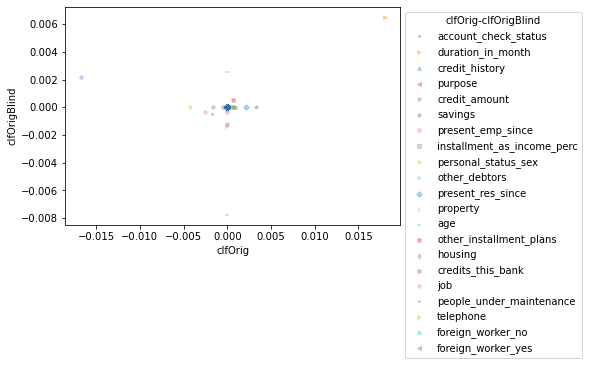

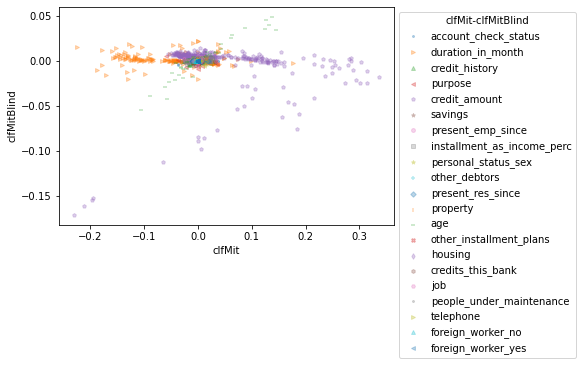

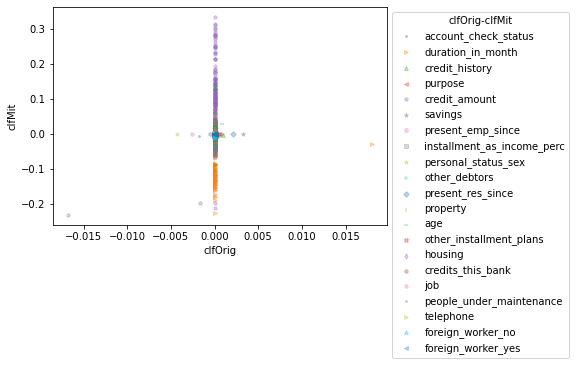

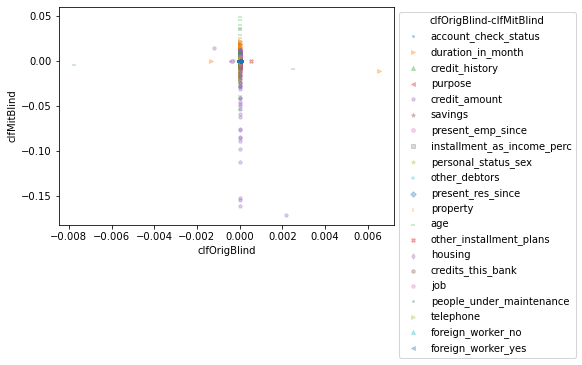

In [178]:
XAIPlots(shap_v,column_names,diffClfs=True)

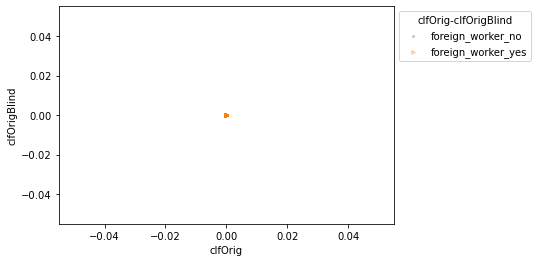

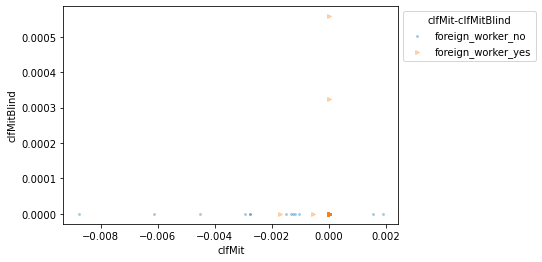

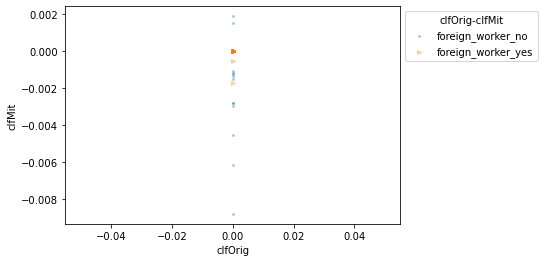

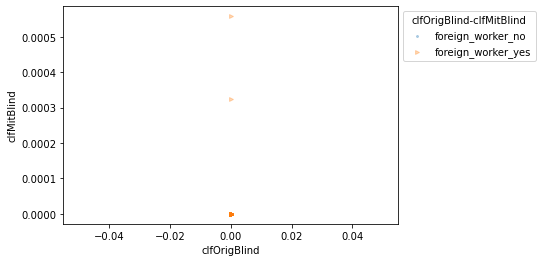

In [179]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [180]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [181]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [182]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [183]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.000099            0.155082   
duration_in_month                       0.000074           -5.625707   
credit_history                          0.000179            0.074425   
purpose                                -0.000365           -0.055621   
credit_amount                           0.000315           17.333405   
savings                                -0.000312           -0.162243   
present_emp_since                      -0.000100            0.014186   
installment_as_income_perc             -0.000114           -0.036059   
personal_status_sex                     0.000024           -0.053622   
other_debtors                           0.000295            0.182637   
present_res_since                       0.000086            0.000619   
property                                0.000136            0.075678   
age                                     0.000272            0.176679   
other_installment_plans                 0.000162            0.067564   
housing                                -0.000675           -0.018798   
credits_this_bank                       0.000181            0.001036   
job                                     0.000046            0.013967   
people_under_maintenance               -0.000190           -0.150753   
telephone                               0.000183           -0.088467   
foreign_worker_no                      -0.000251            0.120063   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.132310                  0.022870  
duration_in_month                -5.901510                  0.275877  
credit_history                    0.062853                  0.011751  
purpose                          -0.078270                  0.022283  
credit_amount                    19.651113                 -2.317394  
savings                          -0.210678                  0.048123  
present_emp_since                 0.013717                  0.000369  
installment_as_income_perc       -0.040116                  0.003943  
personal_status_sex              -0.053474                 -0.000124  
other_debtors                     0.161834                  0.021097  
present_res_since                -0.015622                  0.016327  
property                          0.051907                  0.023907  
age                               0.122764                  0.054187  
other_installment_plans           0.046258                  0.021469  
housing                          -0.026459                  0.006987  
credits_this_bank                -0.029987                  0.031204  
job                               0.019086                 -0.005073  
people_under_maintenance         -0.127106                 -0.023838  
telephone                        -0.070357                 -0.017928  
foreign_worker_no                 0.107852                  0.011960  
foreign_worker_yes                0.000000                  0.000000

In [184]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.000003            0.005299   
duration_in_month                       0.000002            0.036943   
credit_history                          0.000003            0.003412   
purpose                                 0.000003            0.002967   
credit_amount                           0.000005            0.137108   
savings                                 0.000004            0.003466   
present_emp_since                       0.000002            0.003316   
installment_as_income_perc              0.000002            0.003642   
personal_status_sex                     0.000002            0.003137   
other_debtors                           0.000003            0.002990   
present_res_since                       0.000004            0.003018   
property                                0.000004            0.002770   
age                                     0.000004            0.004351   
other_installment_plans                 0.000003            0.002943   
housing                                 0.000003            0.002796   
credits_this_bank                       0.000003            0.003013   
job                                     0.000002            0.002849   
people_under_maintenance                0.000003            0.002587   
telephone                               0.000003            0.002723   
foreign_worker_no                       0.000003            0.002926   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.005479                  0.000647  
duration_in_month                 0.034355                  0.002639  
credit_history                    0.003395                  0.000598  
purpose                           0.002960                  0.000773  
credit_amount                     0.120975                  0.017103  
savings                           0.003203                  0.000655  
present_emp_since                 0.003277                  0.000630  
installment_as_income_perc        0.003723                  0.000677  
personal_status_sex               0.003036                  0.000652  
other_debtors                     0.002873                  0.000657  
present_res_since                 0.002923                  0.000662  
property                          0.002769                  0.000615  
age                               0.006665                  0.002774  
other_installment_plans           0.002853                  0.000608  
housing                           0.002767                  0.000561  
credits_this_bank                 0.002981                  0.000715  
job                               0.002722                  0.000663  
people_under_maintenance          0.002625                  0.000575  
telephone                         0.002628                  0.000662  
foreign_worker_no                 0.002848                  0.000680  
foreign_worker_yes                0.000000                  0.000000

In [22]:
resLIME = pd.read_csv(path_res+'PS_MLP_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_MLP_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                     0.0               0.060           0.054   
SA-Mean                    0.0               0.001           0.001   
NSA-Sum                    0.0               1.278           1.411   
NSA-Mean                   0.0               0.012           0.011   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.006  
SA-Mean                      0.000  
NSA-Sum                      0.154  
NSA-Mean                     0.002

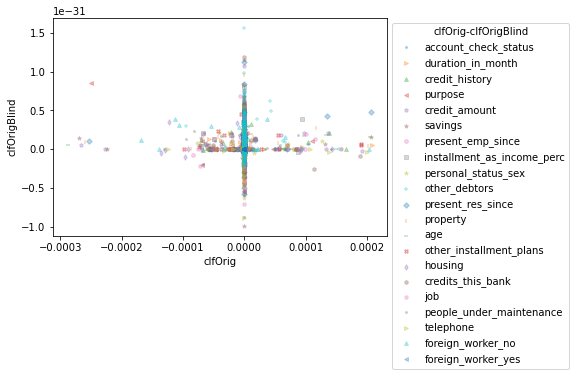

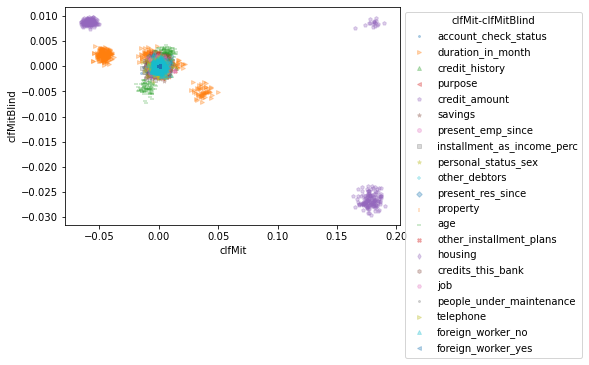

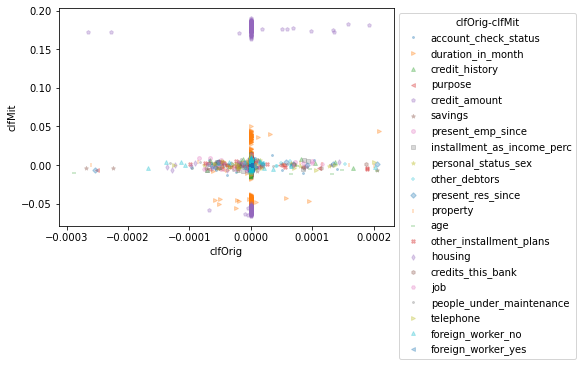

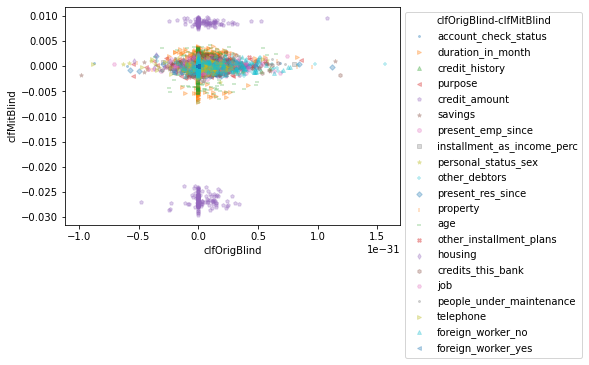

In [186]:
XAIPlots(lime_v,column_names,diffClfs=True)

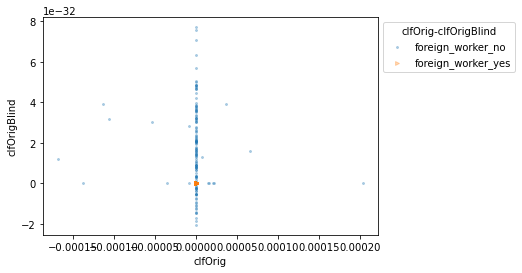

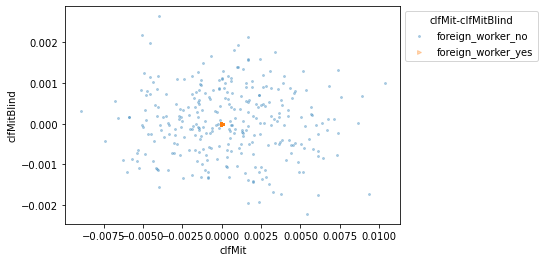

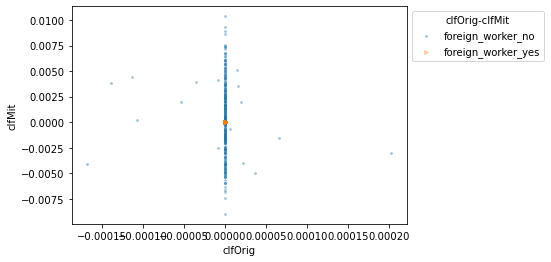

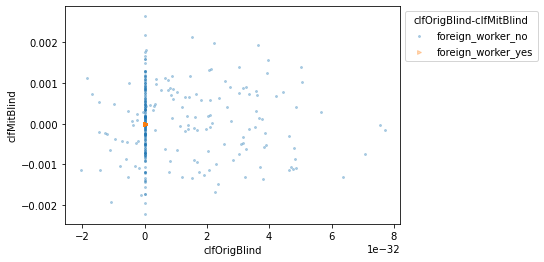

In [187]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [34]:
PIK = "PS_MLP_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [35]:
PIK = "PS_MLP_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [36]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -0.003922      -0.774667   
duration_in_month                  0.042522     -13.570137   
credit_history                     0.000937       0.169684   
purpose                            0.000000      -0.286473   
credit_amount                     -0.044351      23.845179   
savings                            0.006841      -0.059295   
present_emp_since                  0.000000       0.048068   
installment_as_income_perc         0.001105       0.339753   
personal_status_sex               -0.008063       0.225832   
other_debtors                      0.000000      -0.084514   
present_res_since                  0.003257       0.026010   
property                           0.000000       0.158581   
age                                0.003337       1.462603   
other_installment_plans            0.001620      -0.041925   
housing                            0.000000      -0.020355   
credits_this_bank                 -0.000528       0.028292   
job                               -0.004544      -0.020519   
people_under_maintenance           0.000939       0.125877   
telephone                          0.000850       0.024956   
foreign_worker_no                  0.000000      -0.063468   
foreign_worker_yes                 0.000000      -0.000236   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -0.000770                -0.017956  
duration_in_month                            0.010952                 0.606741  
credit_history                               0.000000                -0.000854  
purpose                                      0.000000                -0.074324  
credit_amount                                0.001672                -1.533831  
savings                                      0.000000                -0.026040  
present_emp_since                           -0.000370                 0.001311  
installment_as_income_perc                   0.000000                 0.006299  
personal_status_sex                          0.000000                -0.004442  
other_debtors                               -0.000599                -0.001399  
present_res_since                            0.000000                -0.002652  
property                                     0.000000                 0.028922  
age                                         -0.010688                 0.465921  
other_installment_plans                      0.000524                -0.008427  
housing                                      0.000000                 0.001452  
credits_this_bank                            0.000000                 0.007701  
job                                         -0.000722                 0.016916  
people_under_maintenance                     0.000000                 0.012858  
telephone                                    0.000000                 0.007853  
foreign_worker_no                            0.000000                -0.000629  
foreign_worker_yes                           0.000000                 0.000883

In [37]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status           1.482317e-06       0.000439   
duration_in_month              1.584385e-05       0.001797   
credit_history                 3.123810e-06       0.000475   
purpose                        0.000000e+00       0.000367   
credit_amount                  2.481874e-05       0.002448   
savings                        1.191295e-06       0.000308   
present_emp_since              0.000000e+00       0.000335   
installment_as_income_perc     1.100609e-06       0.000523   
personal_status_sex            1.674258e-06       0.000347   
other_debtors                  0.000000e+00       0.000042   
present_res_since              3.127043e-06       0.000317   
property                       0.000000e+00       0.000277   
age                            5.697141e-06       0.000668   
other_installment_plans        1.042332e-06       0.000075   
housing                        0.000000e+00       0.000044   
credits_this_bank              1.761502e-06       0.000140   
job                            1.957202e-06       0.000106   
people_under_maintenance       5.503132e-07       0.000074   
telephone                      2.834033e-06       0.000065   
foreign_worker_no              0.000000e+00       0.000028   
foreign_worker_yes             0.000000e+00       0.000014   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                     4.507128e-07                 0.000060  
duration_in_month                        1.974531e-06                 0.000186  
credit_history                           0.000000e+00                 0.000015  
purpose                                  0.000000e+00                 0.000047  
credit_amount                            2.932215e-06                 0.000707  
savings                                  0.000000e+00                 0.000062  
present_emp_since                        1.232430e-06                 0.000022  
installment_as_income_perc               0.000000e+00                 0.000065  
personal_status_sex                      0.000000e+00                 0.000073  
other_debtors                            1.105007e-07                 0.000006  
present_res_since                        0.000000e+00                 0.000014  
property                                 0.000000e+00                 0.000028  
age                                      2.418284e-06                 0.000239  
other_installment_plans                  1.747724e-06                 0.000032  
housing                                  0.000000e+00                 0.000006  
credits_this_bank                        0.000000e+00                 0.000049  
job                                      1.773428e-08                 0.000031  
people_under_maintenance                 0.000000e+00                 0.000021  
telephone                                0.000000e+00                 0.000024  
foreign_worker_no                        0.000000e+00                 0.000002  
foreign_worker_yes                       0.000000e+00                 0.000003

In [38]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.000          0.032                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             0.006          2.174                      0.001   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     0.149  
NSA-Mean                    0.000

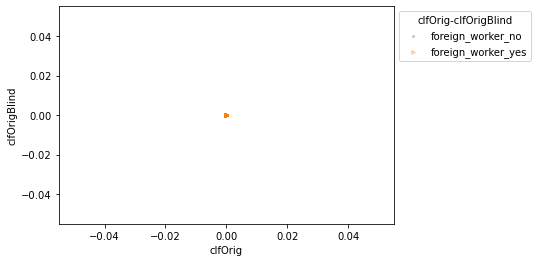

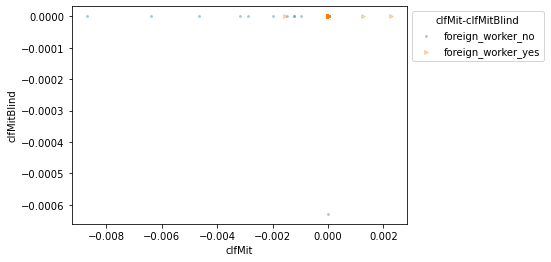

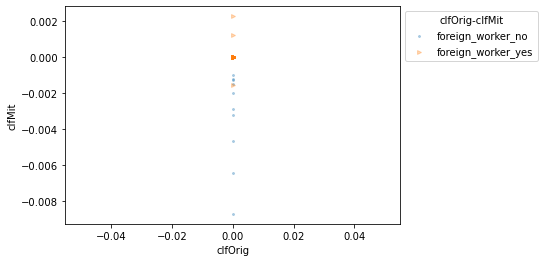

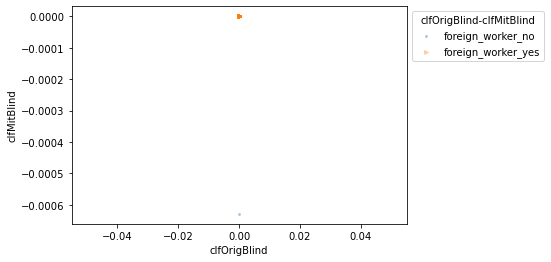

In [39]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [40]:
PIK = "PS_MLP_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [41]:
PIK = "PS_MLP_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [42]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.000197       0.207055   
duration_in_month                  0.000148     -11.055669   
credit_history                     0.000359       0.380844   
purpose                           -0.000731      -0.094336   
credit_amount                      0.000629      36.629785   
savings                           -0.000624      -0.587283   
present_emp_since                 -0.000200      -0.060768   
installment_as_income_perc        -0.000229      -0.099933   
personal_status_sex                0.000049       0.047028   
other_debtors                      0.000591       0.403188   
present_res_since                  0.000173      -0.091044   
property                           0.000272       0.014870   
age                                0.000543       0.262634   
other_installment_plans            0.000324       0.108875   
housing                           -0.001349      -0.020903   
credits_this_bank                  0.000361      -0.036562   
job                                0.000092      -0.003518   
people_under_maintenance          -0.000381      -0.206013   
telephone                          0.000365      -0.028223   
foreign_worker_no                 -0.000503       0.141270   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                     1.984737e-30                 0.041919  
duration_in_month                        1.948869e-30                 0.619320  
credit_history                           2.126927e-30                 0.039260  
purpose                                  2.179087e-30                 0.042039  
credit_amount                            1.997424e-30                -4.469840  
savings                                  2.095399e-30                 0.097403  
present_emp_since                        1.756264e-30                -0.006035  
installment_as_income_perc               2.293776e-30                -0.005572  
personal_status_sex                      1.805507e-30                -0.006307  
other_debtors                            6.100424e-30                 0.022314  
present_res_since                        2.121628e-30                 0.012196  
property                                 2.332852e-30                 0.046467  
age                                      1.905543e-30                 0.111946  
other_installment_plans                  2.434043e-30                 0.034630  
housing                                  2.788899e-30                -0.015797  
credits_this_bank                        2.613986e-30                 0.053793  
job                                      1.876619e-30                -0.013905  
people_under_maintenance                 2.499060e-30                -0.037461  
telephone                                1.746109e-30                -0.020492  
foreign_worker_no                        4.807555e-30                 0.025080  
foreign_worker_yes                       0.000000e+00                 0.000000

In [43]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.004162   
duration_in_month                       0.0       0.009304   
credit_history                          0.0       0.004087   
purpose                                 0.0       0.004024   
credit_amount                           0.0       0.022286   
savings                                 0.0       0.004121   
present_emp_since                       0.0       0.004293   
installment_as_income_perc              0.0       0.004218   
personal_status_sex                     0.0       0.003953   
other_debtors                           0.0       0.003965   
present_res_since                       0.0       0.003857   
property                                0.0       0.003986   
age                                     0.0       0.004163   
other_installment_plans                 0.0       0.004308   
housing                                 0.0       0.003898   
credits_this_bank                       0.0       0.004170   
job                                     0.0       0.003719   
people_under_maintenance                0.0       0.003618   
telephone                               0.0       0.003934   
foreign_worker_no                       0.0       0.003893   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                     1.066395e-32                 0.000854  
duration_in_month                        9.443259e-33                 0.001022  
credit_history                           8.636653e-33                 0.000799  
purpose                                  1.042268e-32                 0.000821  
credit_amount                            1.002501e-32                 0.001532  
savings                                  1.016612e-32                 0.000856  
present_emp_since                        8.249828e-33                 0.000901  
installment_as_income_perc               9.727327e-33                 0.000898  
personal_status_sex                      9.543388e-33                 0.000806  
other_debtors                            1.759434e-32                 0.000910  
present_res_since                        9.402562e-33                 0.000831  
property                                 9.899919e-33                 0.000845  
age                                      9.669561e-33                 0.000801  
other_installment_plans                  8.875315e-33                 0.000841  
housing                                  1.293521e-32                 0.000829  
credits_this_bank                        1.045121e-32                 0.000921  
job                                      1.142860e-32                 0.000919  
people_under_maintenance                 8.911529e-33                 0.000757  
telephone                                1.025858e-32                 0.000887  
foreign_worker_no                        1.531617e-32                 0.000861  
foreign_worker_yes                       0.000000e+00                 0.000000

In [44]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum                0.0          0.071                        0.0   
SA-Mean               0.0          0.002                        0.0   
NSA-Sum               0.0          2.649                        0.0   
NSA-Mean              0.0          0.005                        0.0   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.013  
SA-Mean                     0.000  
NSA-Sum                     0.300  
NSA-Mean                    0.001

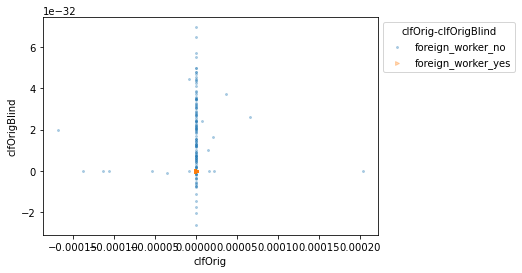

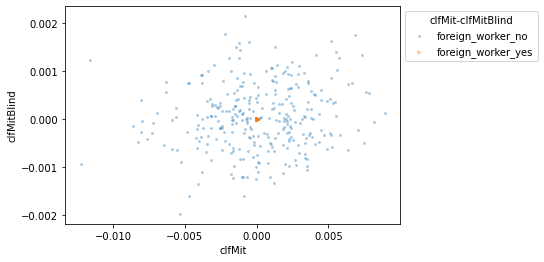

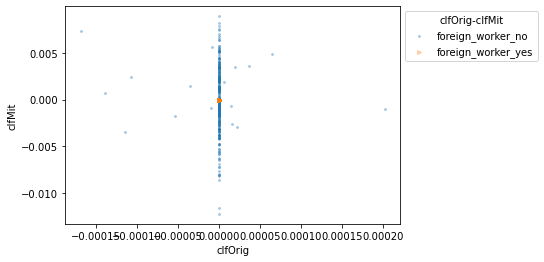

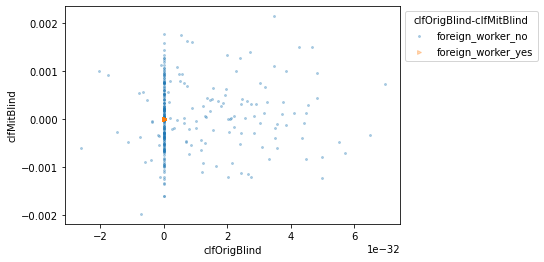

In [45]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)

### RF

In [200]:

clf = RandomForestClassifier()
param_grid = {'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' : ['gini', 'entropy'], 'bootstrap' : [True, False]}

In [201]:

clfOrig,clfOrigBlind,clfMit,clfMitBlind,res = Classifiers(clf,param_grid,target,column_names,X_train,X_train_mod,X_train_blind,X_train_mod_blind,y_train,y_train_mod,X_test,X_test_blind,y_test,protected,adClass,disClass,adAttr,disAttr)
res.to_csv(path_or_buf=path_res+'PS_RF_Performances.csv')
res

Original Train Dimension = 700
Mitigated Train Dimension = 700
Test Dimension = 300
---> CLF Original: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 250 ]
---> CLF Mitigated: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 246 ]
---> CLF Original Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 249 ]
---> CLF Mitigated Blind: 
Favoured attribute value: [ foreign_worker_no ] Freq.: [ 12 ] Labeled as + class: [ 12 ]
Unfavoured attribute value: [ foreign_worker_yes ] Freq.: [ 288 ] Labeled as + class: [ 242 ]


CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy            0.756667            0.746667       0.746667   
Precision           0.670317            0.612980       0.601566   
Recall              0.301307            0.313072       0.314379   
F1 Score            0.412084            0.410972       0.409195   
Discrimination      0.131944            0.135417       0.145833   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                   0.750000         CLF Original    0.010000   
Precision                  0.611667         CLF Original    0.057338   
Recall                     0.349020  CLF Mitigated Blind    0.011765   
F1 Score                   0.442197  CLF Mitigated Blind    0.001112   
Discrimination             0.159722         CLF Original    0.003472   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy          0.003333   0.010000     0.003333  
Precision         0.010101   0.068752     0.001313  
Recall            0.034641   0.013072     0.035948  
F1 Score          0.033002   0.002889     0.031225  
Discrimination    0.013889   0.013889     0.024306

In [202]:

PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump([clfOrig,clfOrigBlind,clfMit,clfMitBlind], f)

In [203]:
PIK = "PS_Clfs_RF.dat"
with open(path_res+"/"+PIK, "rb") as f:
  clfOrig,clfOrigBlind,clfMit,clfMitBlind = pickle.load(f)
clfs={'clfOrig':clfOrig,'clfOrigBlind':clfOrigBlind,'clfMit':clfMit,'clfMitBlind':clfMitBlind}

In [6]:
res = pd.read_csv(path_res+'PS_RF_Performances.csv',index_col=0)
res = res.round(3)
res.to_csv(path_res+'PS_RF_Performances.csv')
res

CLF Original  CLF Original Blind  CLF Mitigated  \
Accuracy               0.757               0.747          0.747   
Precision              0.670               0.613          0.602   
Recall                 0.301               0.313          0.314   
F1 Score               0.412               0.411          0.409   
Discrimination         0.132               0.135          0.146   

                CLF Mitigated Blind           Best Score  Delta O-OB  \
Accuracy                      0.750         CLF Original       0.010   
Precision                     0.612         CLF Original       0.057   
Recall                        0.349  CLF Mitigated Blind       0.012   
F1 Score                      0.442  CLF Mitigated Blind       0.001   
Discrimination                0.160         CLF Original       0.003   

                Delta M-MB  Delta O-M  Delta OB-MB  
Accuracy             0.003      0.010        0.003  
Precision            0.010      0.069        0.001  
Recall               0.035      0.013        0.036  
F1 Score             0.033      0.003        0.031  
Discrimination       0.014      0.014        0.024

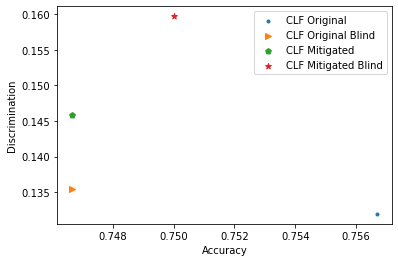

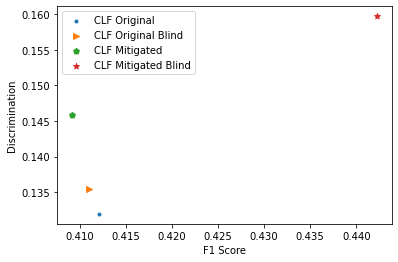

In [10]:
plotDisc(res)

In [206]:
FATInput=DataDescription(X_test,y_test,class_names,column_names,protected,protected_feature)

The grouping based on the *foreigners* feature has the following distribution:
    * "('foreign_worker_no',)" grouping has 12 instances.
    * "('foreign_worker_yes',)" grouping has 288 instances.

The class distribution per sub-population:
    * For the "('foreign_worker_no',)" grouping the classes are distributed as follows:
        - The class *Good* has 11 data points.
        - The class *Bad* has 1 data points.
    * For the "('foreign_worker_yes',)" grouping the classes are distributed as follows:
        - The class *Good* has 203 data points.
        - The class *Bad* has 85 data points.


In [207]:
resDisparateImp=disparateImpactMetrics(clfs,FATInput,X_test,X_test_blind,y_test,protected_feature)
resDisparateImp

The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fairness metric for *foreigners* feature split are:
The *Equal Accuracy* group-based fairness metric for *foreigners* feature split are:
The *Equal Opportunity* group-based fairness metric for *foreigners* feature split are:
The *Demographic Parity* group-based fair

{'Equal Accuracy': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Equal Opportunity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []},
 'Demographic Parity': {'Delta O-OB': [],
  'Delta M-MB': [],
  'Delta O-M': [],
  'Delta OB-MB': []}}

Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


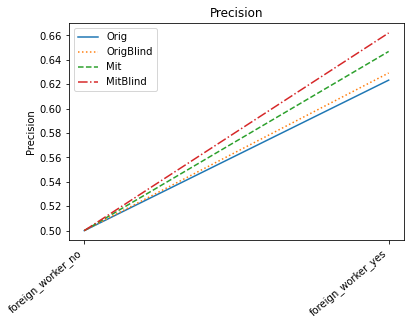

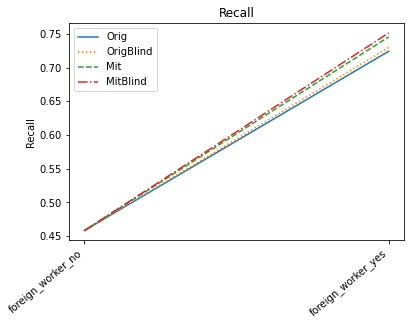

In [208]:
standardMetricsPerGroup(clfs,column_names,target,X_test,y_test,protected_feature,protected)

#### XAI Fixed Reference Set

##### SHAP Kernel Explainer

In [209]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [210]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [211]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [212]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -6.186125           -3.085524   
duration_in_month                     -11.194208          -13.666651   
credit_history                          4.273436            5.628162   
purpose                                 6.051340            6.070615   
credit_amount                         -19.121523          -20.819605   
savings                                -2.818253           -3.776544   
present_emp_since                      -1.605292           -3.056381   
installment_as_income_perc              1.221243            0.916257   
personal_status_sex                     0.543418            0.472225   
other_debtors                           0.612349            0.824536   
present_res_since                      -1.013803           -1.102579   
property                                1.380855            1.552970   
age                                     6.100914            4.127612   
other_installment_plans                 2.655451            2.576952   
housing                                 2.505784            3.630869   
credits_this_bank                      -0.029655           -0.187545   
job                                     0.787604            0.708545   
people_under_maintenance                1.116069            1.533473   
telephone                              -0.072864           -0.278095   
foreign_worker_no                      -0.145926            0.172777   
foreign_worker_yes                     -0.184972            0.066280   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.071255                 -7.200394  
duration_in_month               -11.751202                -13.109657  
credit_history                    4.748025                  5.153572  
purpose                           6.109378                  6.012577  
credit_amount                   -18.764840                -21.176288  
savings                          -3.575398                 -3.019398  
present_emp_since                -2.367672                 -2.294001  
installment_as_income_perc        0.903748                  1.233751  
personal_status_sex               0.453811                  0.561832  
other_debtors                     0.672044                  0.764841  
present_res_since                -1.177671                 -0.938711  
property                          1.406238                  1.527587  
age                               5.428465                  4.800061  
other_installment_plans           2.498074                  2.734328  
housing                           3.133769                  3.002884  
credits_this_bank                -0.057114                 -0.160087  
job                               0.701029                  0.795121  
people_under_maintenance          1.313579                  1.335964  
telephone                        -0.138623                 -0.212336  
foreign_worker_no                 0.028790                 -0.001939  
foreign_worker_yes               -0.118279                 -0.000413

In [213]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006528            0.012481   
duration_in_month                       0.006803            0.004226   
credit_history                          0.004483            0.002083   
purpose                                 0.004482            0.003216   
credit_amount                           0.007467            0.007311   
savings                                 0.004064            0.002557   
present_emp_since                       0.003359            0.001669   
installment_as_income_perc              0.003191            0.002279   
personal_status_sex                     0.004464            0.001545   
other_debtors                           0.000686            0.000788   
present_res_since                       0.003473            0.001307   
property                                0.002995            0.002149   
age                                     0.004845            0.002755   
other_installment_plans                 0.002374            0.001806   
housing                                 0.002273            0.001780   
credits_this_bank                       0.001928            0.000908   
job                                     0.002303            0.001573   
people_under_maintenance                0.000883            0.000378   
telephone                               0.002034            0.001161   
foreign_worker_no                       0.000486            0.000605   
foreign_worker_yes                      0.000636            0.000291   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.020323                  0.020621  
duration_in_month                 0.012733                  0.011089  
credit_history                    0.004352                  0.007603  
purpose                           0.004792                  0.005309  
credit_amount                     0.008771                  0.010144  
savings                           0.004557                  0.003773  
present_emp_since                 0.005515                  0.003501  
installment_as_income_perc        0.004756                  0.004139  
personal_status_sex               0.004044                  0.003048  
other_debtors                     0.001302                  0.001171  
present_res_since                 0.003078                  0.002229  
property                          0.003319                  0.003146  
age                               0.006166                  0.007212  
other_installment_plans           0.003174                  0.003874  
housing                           0.004343                  0.003439  
credits_this_bank                 0.001797                  0.001342  
job                               0.003419                  0.002798  
people_under_maintenance          0.000954                  0.001222  
telephone                         0.001968                  0.002009  
foreign_worker_no                 0.001085                  0.000006  
foreign_worker_yes                0.000926                  0.000001

In [23]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.165               0.120           0.074   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  3.647               3.896           3.541   
NSA-Mean                 0.004               0.003           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      4.002  
NSA-Mean                     0.005

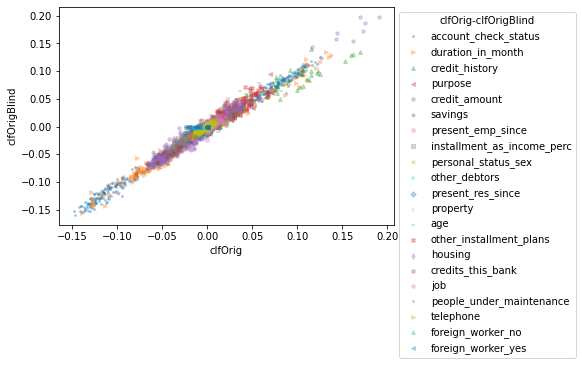

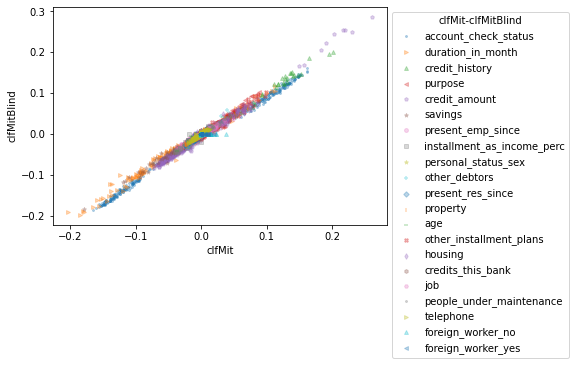

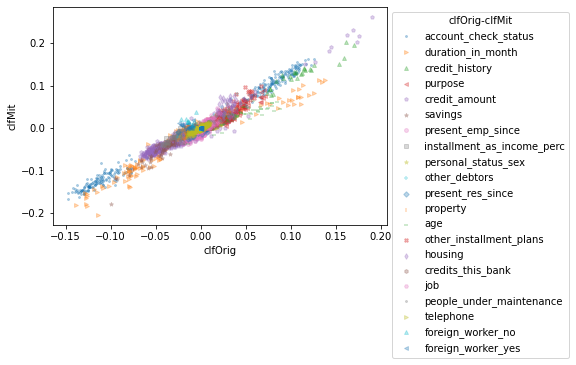

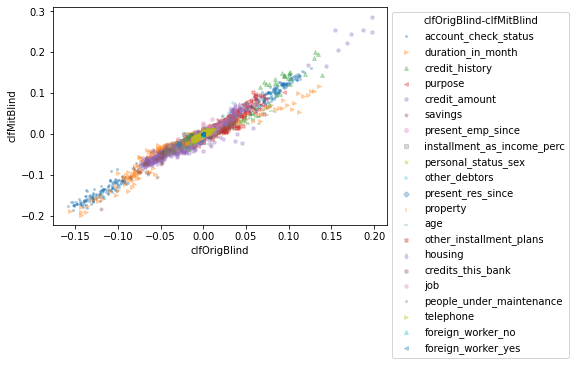

In [215]:
XAIPlots(shap_v,column_names,diffClfs=True)

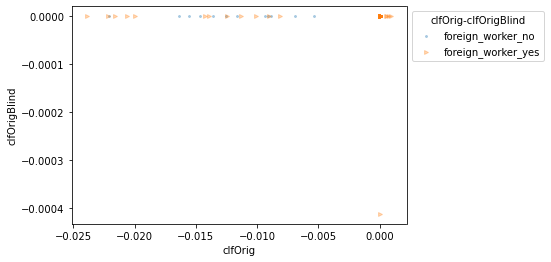

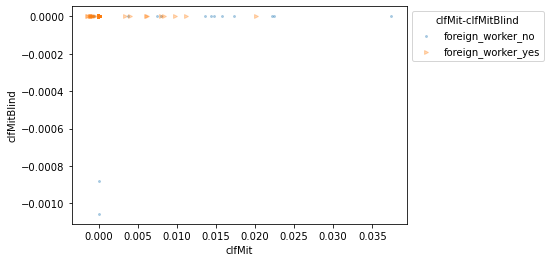

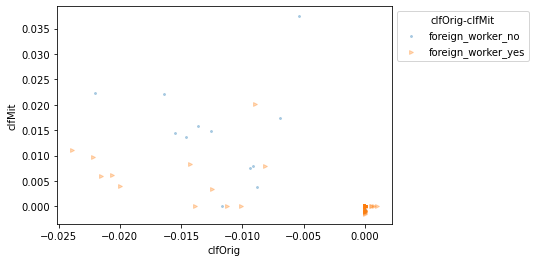

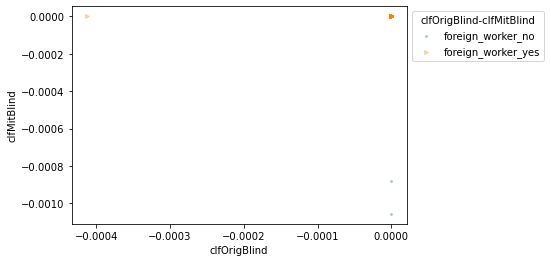

In [216]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [217]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [218]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [219]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [220]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.576647           -3.440995   
duration_in_month                      -0.395835           -3.009546   
credit_history                         -0.727381           -0.496582   
purpose                                 0.645952            0.902406   
credit_amount                          -1.091257           -1.582739   
savings                                 0.189673           -0.143080   
present_emp_since                       0.459167            0.928993   
installment_as_income_perc             -1.020564           -0.969653   
personal_status_sex                     0.293219            0.356374   
other_debtors                          -0.014518           -0.088954   
present_res_since                      -0.120070           -0.179377   
property                                0.181374            0.217810   
age                                     1.229332            1.549534   
other_installment_plans                 1.324755            1.704131   
housing                                 0.013302           -0.447742   
credits_this_bank                       0.047582           -0.227422   
job                                     0.467958            0.686032   
people_under_maintenance                0.208416           -0.052732   
telephone                               0.439100            0.539793   
foreign_worker_no                       0.033211           -0.004253   
foreign_worker_yes                      0.021420           -0.016506   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.420606                 -2.597035  
duration_in_month                -1.797674                 -1.607707  
credit_history                   -0.602394                 -0.621569  
purpose                           0.859416                  0.688942  
credit_amount                    -1.261190                 -1.412806  
savings                           0.060667                 -0.014074  
present_emp_since                 0.750585                  0.637576  
installment_as_income_perc       -0.993926                 -0.996291  
personal_status_sex               0.320558                  0.329035  
other_debtors                    -0.115390                  0.011918  
present_res_since                -0.241091                 -0.058356  
property                          0.197631                  0.201553  
age                               1.390413                  1.388454  
other_installment_plans           1.322462                  1.706424  
housing                          -0.145308                 -0.289132  
credits_this_bank                -0.224305                  0.044466  
job                               0.642669                  0.511321  
people_under_maintenance          0.104919                  0.050765  
telephone                         0.421930                  0.556963  
foreign_worker_no                 0.028958                  0.000000  
foreign_worker_yes                0.004914                  0.000000

In [221]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004810            0.005822   
duration_in_month                       0.007488            0.004107   
credit_history                          0.004313            0.001978   
purpose                                 0.004109            0.002947   
credit_amount                           0.005379            0.003735   
savings                                 0.002945            0.001826   
present_emp_since                       0.003033            0.001598   
installment_as_income_perc              0.002590            0.001768   
personal_status_sex                     0.003514            0.001181   
other_debtors                           0.001025            0.000958   
present_res_since                       0.002957            0.001238   
property                                0.002921            0.001739   
age                                     0.004722            0.003056   
other_installment_plans                 0.002244            0.001587   
housing                                 0.002431            0.001858   
credits_this_bank                       0.002620            0.000838   
job                                     0.002214            0.001532   
people_under_maintenance                0.001333            0.000642   
telephone                               0.001822            0.001209   
foreign_worker_no                       0.001241            0.000986   
foreign_worker_yes                      0.001472            0.000629   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016755                  0.020250  
duration_in_month                 0.013992                  0.011538  
credit_history                    0.004536                  0.008220  
purpose                           0.004344                  0.004993  
credit_amount                     0.006975                  0.007567  
savings                           0.005878                  0.005079  
present_emp_since                 0.005155                  0.003785  
installment_as_income_perc        0.003078                  0.003000  
personal_status_sex               0.003998                  0.002470  
other_debtors                     0.001825                  0.001802  
present_res_since                 0.002764                  0.002583  
property                          0.003178                  0.003119  
age                               0.007272                  0.007186  
other_installment_plans           0.003894                  0.003736  
housing                           0.006154                  0.005125  
credits_this_bank                 0.002043                  0.001490  
job                               0.003123                  0.002553  
people_under_maintenance          0.001311                  0.001684  
telephone                         0.001747                  0.001814  
foreign_worker_no                 0.002203                  0.000000  
foreign_worker_yes                0.002056                  0.000000

In [24]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Fix_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Fix_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.027               0.010           0.017   
SA-Mean                  0.001               0.001           0.002   
NSA-Sum                  0.550               0.922           0.730   
NSA-Mean                 0.003               0.002           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.722  
NSA-Mean                     0.005

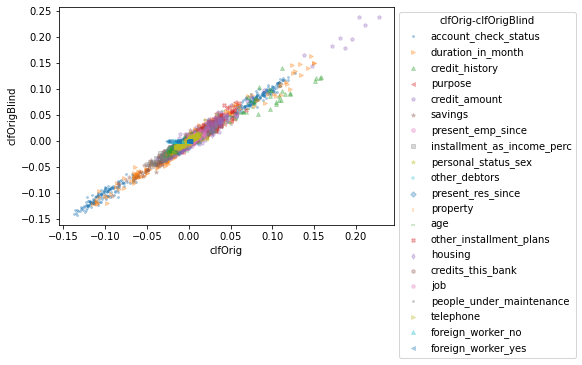

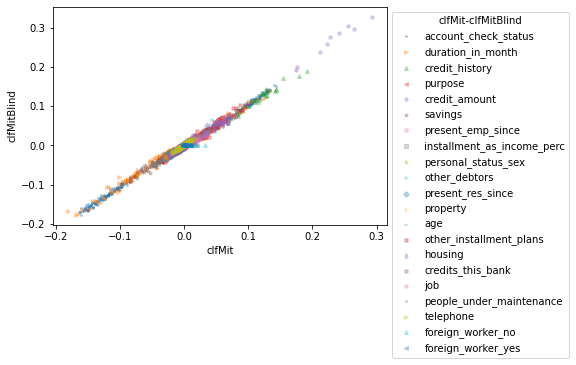

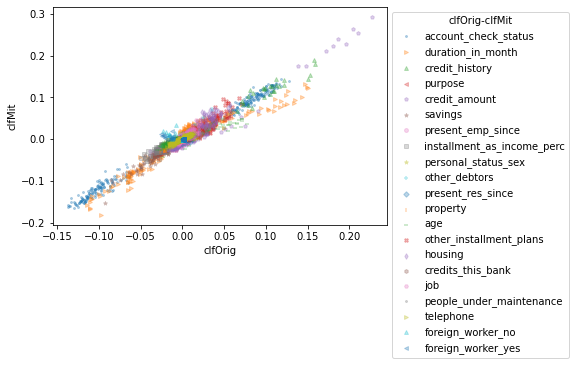

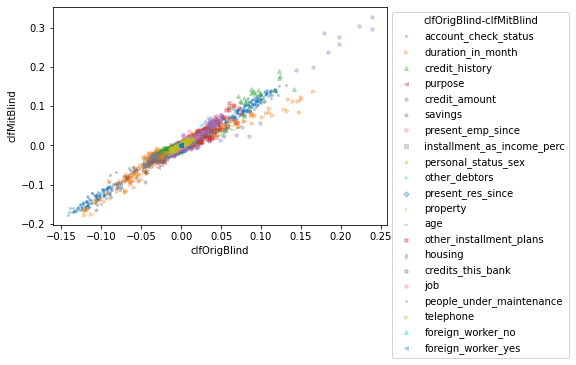

In [223]:
XAIPlots(shap_v,column_names,diffClfs=True)

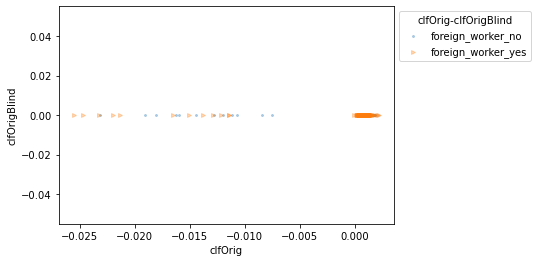

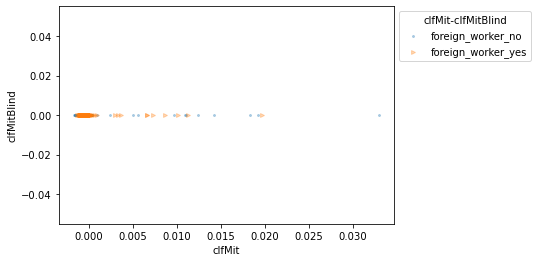

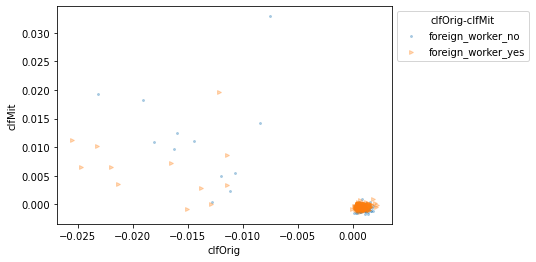

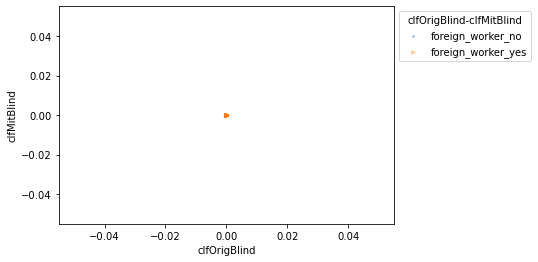

In [224]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [225]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=False)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [226]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [227]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [228]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -2.367083            4.766687   
duration_in_month                     -13.654243          -10.593125   
credit_history                          5.655557            6.900345   
purpose                                 5.037342            5.893746   
credit_amount                         -25.090792          -27.599016   
savings                                 2.113653            1.815196   
present_emp_since                      -0.304592           -0.575030   
installment_as_income_perc             -0.369336            0.029777   
personal_status_sex                    -0.352589           -0.545221   
other_debtors                           0.880697            1.018980   
present_res_since                      -0.170345           -0.429224   
property                                2.067944            2.342191   
age                                     4.598349            3.293328   
other_installment_plans                -3.127054           -6.092503   
housing                                -2.339460           -3.736865   
credits_this_bank                      -0.057225            0.055261   
job                                    -0.681974           -1.570009   
people_under_maintenance               -0.014863           -0.423306   
telephone                               0.348802            1.195369   
foreign_worker_no                       0.391679           -0.980891   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              1.202353                  1.197251  
duration_in_month               -12.591685                -11.655682  
credit_history                    6.097354                  6.458549  
purpose                           5.415678                  5.515410  
credit_amount                   -25.046071                -27.643738  
savings                           1.875177                  2.053671  
present_emp_since                -0.379382                 -0.500241  
installment_as_income_perc       -0.083358                 -0.256200  
personal_status_sex              -0.595952                 -0.301858  
other_debtors                     0.973847                  0.925829  
present_res_since                -0.478106                 -0.121463  
property                          2.339923                  2.070212  
age                               3.775312                  4.116364  
other_installment_plans          -5.147932                 -4.071625  
housing                          -2.934712                 -3.141613  
credits_this_bank                -0.069704                  0.067741  
job                              -1.187975                 -1.064008  
people_under_maintenance         -0.286581                 -0.151588  
telephone                         0.630564                  0.913607  
foreign_worker_no                -0.636439                  0.047226  
foreign_worker_yes                0.000000                  0.000000

In [229]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012415            0.012570   
duration_in_month                       0.006694            0.010571   
credit_history                          0.004479            0.005917   
purpose                                 0.005504            0.007544   
credit_amount                           0.015619            0.013115   
savings                                 0.005304            0.006110   
present_emp_since                       0.004790            0.005840   
installment_as_income_perc              0.004731            0.005362   
personal_status_sex                     0.007730            0.005315   
other_debtors                           0.004388            0.005691   
present_res_since                       0.005360            0.005526   
property                                0.004534            0.006257   
age                                     0.006921            0.006736   
other_installment_plans                 0.005678            0.005547   
housing                                 0.004380            0.005226   
credits_this_bank                       0.004875            0.005256   
job                                     0.004638            0.005422   
people_under_maintenance                0.003834            0.005026   
telephone                               0.004510            0.004931   
foreign_worker_no                       0.004125            0.006020   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.029309                  0.034874  
duration_in_month                 0.012259                  0.013179  
credit_history                    0.006547                  0.005320  
purpose                           0.004828                  0.008829  
credit_amount                     0.011173                  0.013794  
savings                           0.009633                  0.006325  
present_emp_since                 0.005817                  0.005417  
installment_as_income_perc        0.007033                  0.007414  
personal_status_sex               0.005456                  0.006303  
other_debtors                     0.004776                  0.005365  
present_res_since                 0.005212                  0.005768  
property                          0.005457                  0.005048  
age                               0.005505                  0.009997  
other_installment_plans           0.005843                  0.009516  
housing                           0.006137                  0.005668  
credits_this_bank                 0.004586                  0.004731  
job                               0.006555                  0.006227  
people_under_maintenance          0.004542                  0.004736  
telephone                         0.005719                  0.005128  
foreign_worker_no                 0.006283                  0.004291  
foreign_worker_yes                0.000000                  0.000000

In [25]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Fix.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Fix.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.196               0.490           0.318   
SA-Mean                  0.002               0.003           0.003   
NSA-Sum                  3.644               4.151           3.743   
NSA-Mean                 0.006               0.007           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.024  
SA-Mean                      0.002  
NSA-Sum                      3.801  
NSA-Mean                     0.009

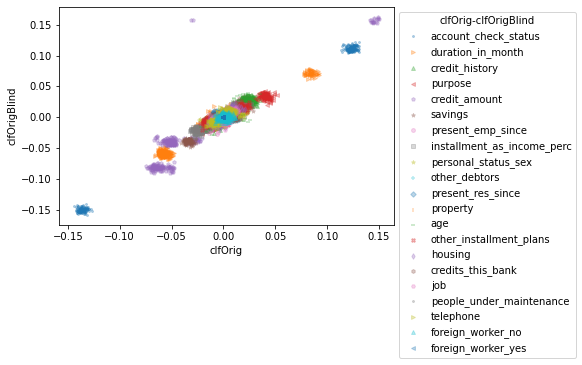

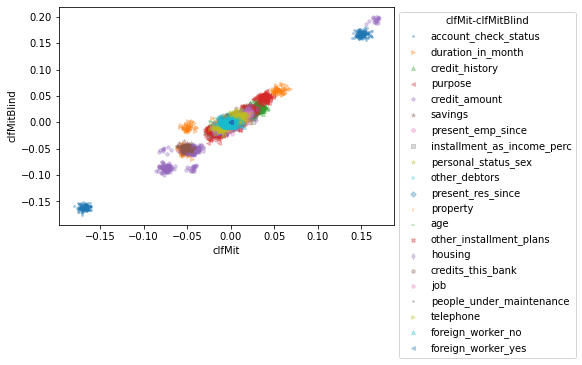

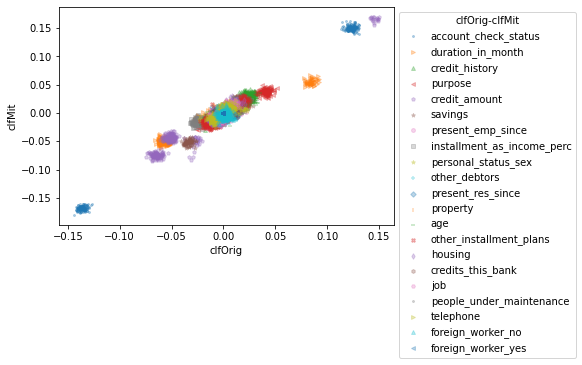

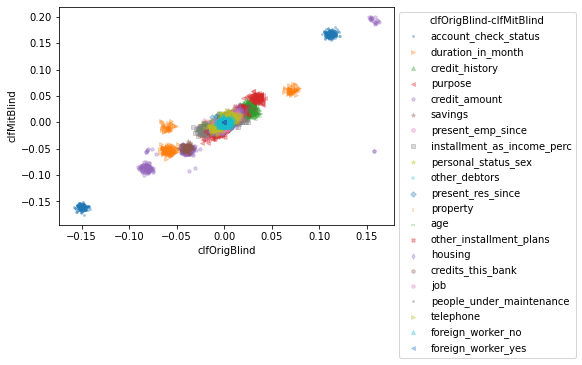

In [231]:
XAIPlots(lime_v,column_names,diffClfs=True)

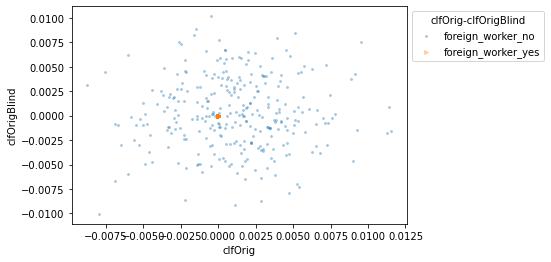

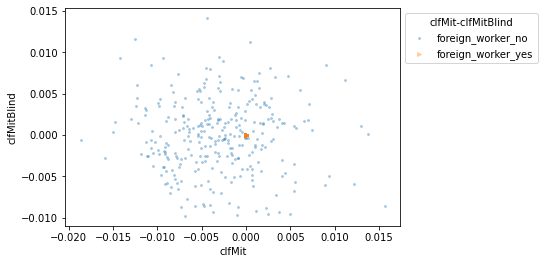

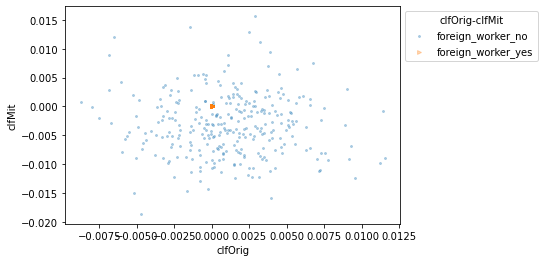

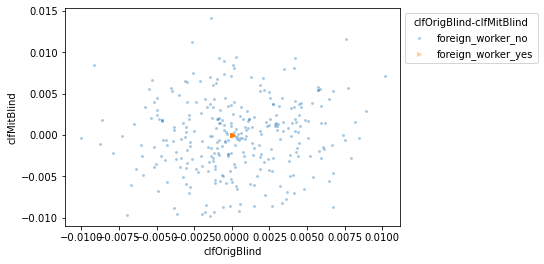

In [232]:
XAIPlots(lime_v,protected,diffClfs=True)

#### XAI Changing Reference Set

##### SHAP Kernel Explainer

In [233]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=False)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [234]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [235]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [236]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -8.562328           -6.340639   
duration_in_month                     -11.141290          -14.950288   
credit_history                          4.069838            5.270037   
purpose                                 5.640340            5.982952   
credit_amount                         -19.997540          -22.483269   
savings                                -3.250544           -3.506157   
present_emp_since                      -1.576098           -2.882972   
installment_as_income_perc              1.220020            1.089997   
personal_status_sex                     0.511695            0.307223   
other_debtors                           0.616946            0.793675   
present_res_since                      -0.893356           -1.175750   
property                                1.385804            0.934073   
age                                     5.458463            3.750912   
other_installment_plans                 2.732666            2.409253   
housing                                 2.428909            3.291955   
credits_this_bank                      -0.141276           -0.129220   
job                                     0.758407            0.345036   
people_under_maintenance                1.057863            1.450684   
telephone                              -0.115644            0.122348   
foreign_worker_no                      -0.154236            0.171311   
foreign_worker_yes                     -0.194894            0.075079   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -8.752166                 -6.150801  
duration_in_month               -12.633914                -13.457665  
credit_history                    4.685420                  4.654454  
purpose                           5.646259                  5.977033  
credit_amount                   -19.592066                -22.888742  
savings                          -3.234879                 -3.521822  
present_emp_since                -2.079175                 -2.379895  
installment_as_income_perc        1.178517                  1.131501  
personal_status_sex               0.490994                  0.327925  
other_debtors                     0.666727                  0.743894  
present_res_since                -1.246672                 -0.822434  
property                          1.302279                  1.017597  
age                               4.858175                  4.351200  
other_installment_plans           2.487922                  2.653997  
housing                           2.710915                  3.009950  
credits_this_bank                -0.211325                 -0.059171  
job                               0.606245                  0.497198  
people_under_maintenance          1.154242                  1.354305  
telephone                        -0.058437                  0.065141  
foreign_worker_no                 0.017445                 -0.000371  
foreign_worker_yes               -0.120481                  0.000666

In [237]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.006957            0.006780   
duration_in_month                       0.006414            0.004139   
credit_history                          0.004492            0.002032   
purpose                                 0.004363            0.004025   
credit_amount                           0.008193            0.008461   
savings                                 0.003686            0.002301   
present_emp_since                       0.003368            0.001415   
installment_as_income_perc              0.003428            0.002798   
personal_status_sex                     0.004672            0.001427   
other_debtors                           0.000769            0.000952   
present_res_since                       0.003356            0.001476   
property                                0.002934            0.002324   
age                                     0.004899            0.002979   
other_installment_plans                 0.002202            0.001743   
housing                                 0.002366            0.001739   
credits_this_bank                       0.001972            0.000830   
job                                     0.002137            0.001400   
people_under_maintenance                0.000871            0.000584   
telephone                               0.001919            0.001189   
foreign_worker_no                       0.000514            0.000694   
foreign_worker_yes                      0.000670            0.000303   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.018564                  0.021217  
duration_in_month                 0.013144                  0.010824  
credit_history                    0.004120                  0.007567  
purpose                           0.004717                  0.005585  
credit_amount                     0.009488                  0.010634  
savings                           0.005440                  0.003833  
present_emp_since                 0.005287                  0.003637  
installment_as_income_perc        0.004628                  0.004292  
personal_status_sex               0.004004                  0.003205  
other_debtors                     0.001215                  0.001473  
present_res_since                 0.003033                  0.002245  
property                          0.003432                  0.003366  
age                               0.005924                  0.007222  
other_installment_plans           0.003236                  0.004055  
housing                           0.004348                  0.003757  
credits_this_bank                 0.001777                  0.001222  
job                               0.003472                  0.003251  
people_under_maintenance          0.000832                  0.001270  
telephone                         0.002073                  0.002039  
foreign_worker_no                 0.001209                  0.000001  
foreign_worker_yes                0.000959                  0.000014

In [26]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.175               0.123           0.069   
SA-Mean                  0.001               0.000           0.001   
NSA-Sum                  3.766               4.064           3.873   
NSA-Mean                 0.004               0.003           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.001  
SA-Mean                      0.000  
NSA-Sum                      3.951  
NSA-Mean                     0.005

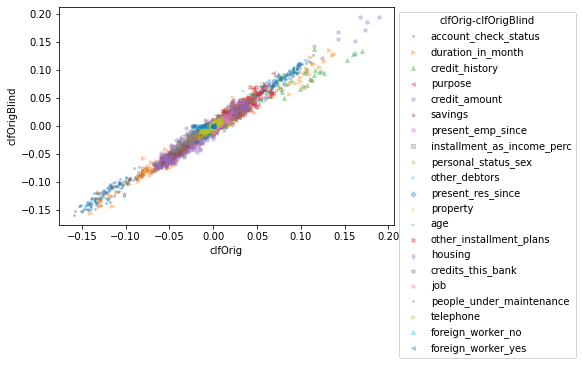

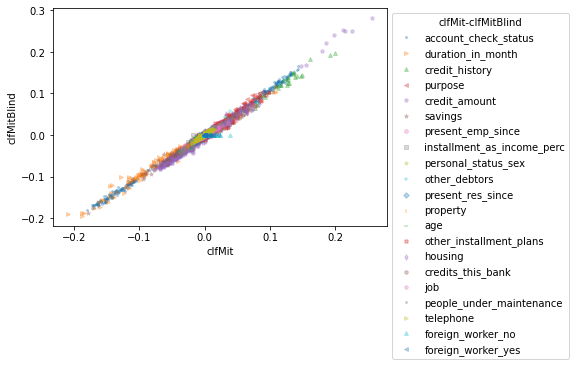

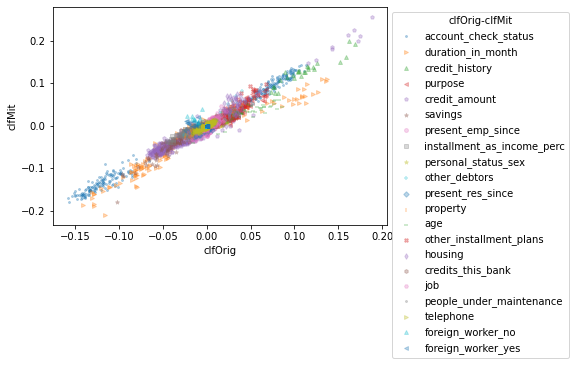

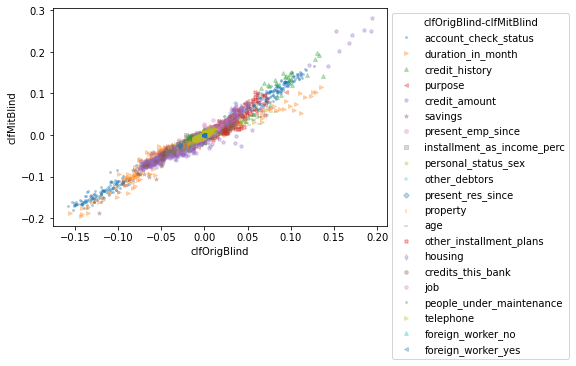

In [239]:
XAIPlots(shap_v,column_names,diffClfs=True)

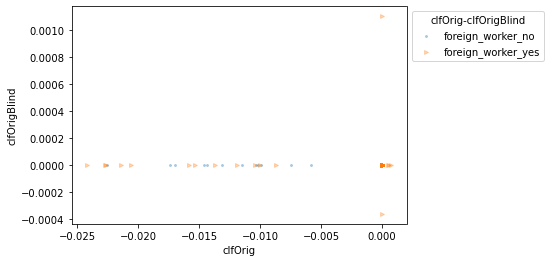

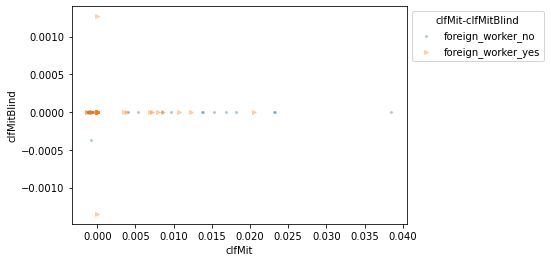

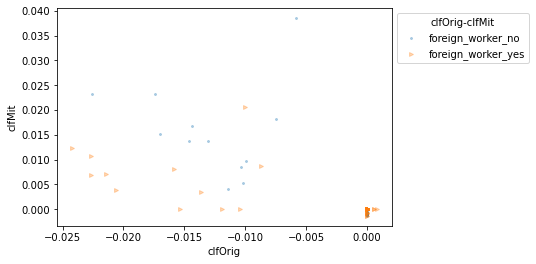

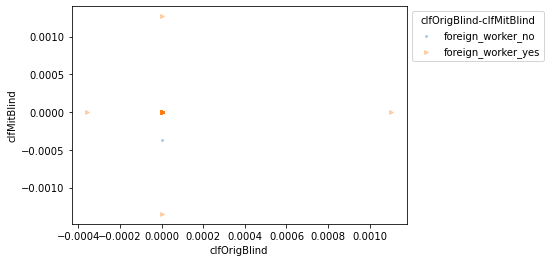

In [240]:
XAIPlots(shap_v,protected,diffClfs=True)

##### SHAP Explainer 4 Trees

In [241]:
shap_v = SHAP(clfs,column_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True,Tree=True)  
XAISum,XAIMean = deltas(shap_v,column_names)
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [242]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(shap_v, f)

In [243]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v = pickle.load(f)

In [244]:
XAISum,XAIMean = deltas(shap_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -1.576647           -3.440995   
duration_in_month                      -0.395835           -3.009546   
credit_history                         -0.727381           -0.496582   
purpose                                 0.645952            0.902406   
credit_amount                          -1.091257           -1.582739   
savings                                 0.189673           -0.143080   
present_emp_since                       0.459167            0.928993   
installment_as_income_perc             -1.020564           -0.969653   
personal_status_sex                     0.293219            0.356374   
other_debtors                          -0.014518           -0.088954   
present_res_since                      -0.120070           -0.179377   
property                                0.181374            0.217810   
age                                     1.229332            1.549534   
other_installment_plans                 1.324755            1.704131   
housing                                 0.013302           -0.447742   
credits_this_bank                       0.047582           -0.227422   
job                                     0.467958            0.686032   
people_under_maintenance                0.208416           -0.052732   
telephone                               0.439100            0.539793   
foreign_worker_no                       0.033211           -0.004253   
foreign_worker_yes                      0.021420           -0.016506   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -2.420606                 -2.597035  
duration_in_month                -1.797674                 -1.607707  
credit_history                   -0.602394                 -0.621569  
purpose                           0.859416                  0.688942  
credit_amount                    -1.261190                 -1.412806  
savings                           0.060667                 -0.014074  
present_emp_since                 0.750585                  0.637576  
installment_as_income_perc       -0.993926                 -0.996291  
personal_status_sex               0.320558                  0.329035  
other_debtors                    -0.115390                  0.011918  
present_res_since                -0.241091                 -0.058356  
property                          0.197631                  0.201553  
age                               1.390413                  1.388454  
other_installment_plans           1.322462                  1.706424  
housing                          -0.145308                 -0.289132  
credits_this_bank                -0.224305                  0.044466  
job                               0.642669                  0.511321  
people_under_maintenance          0.104919                  0.050765  
telephone                         0.421930                  0.556963  
foreign_worker_no                 0.028958                  0.000000  
foreign_worker_yes                0.004914                  0.000000

In [245]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.004810            0.005822   
duration_in_month                       0.007488            0.004107   
credit_history                          0.004313            0.001978   
purpose                                 0.004109            0.002947   
credit_amount                           0.005379            0.003735   
savings                                 0.002945            0.001826   
present_emp_since                       0.003033            0.001598   
installment_as_income_perc              0.002590            0.001768   
personal_status_sex                     0.003514            0.001181   
other_debtors                           0.001025            0.000958   
present_res_since                       0.002957            0.001238   
property                                0.002921            0.001739   
age                                     0.004722            0.003056   
other_installment_plans                 0.002244            0.001587   
housing                                 0.002431            0.001858   
credits_this_bank                       0.002620            0.000838   
job                                     0.002214            0.001532   
people_under_maintenance                0.001333            0.000642   
telephone                               0.001822            0.001209   
foreign_worker_no                       0.001241            0.000986   
foreign_worker_yes                      0.001472            0.000629   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.016755                  0.020250  
duration_in_month                 0.013992                  0.011538  
credit_history                    0.004536                  0.008220  
purpose                           0.004344                  0.004993  
credit_amount                     0.006975                  0.007567  
savings                           0.005878                  0.005079  
present_emp_since                 0.005155                  0.003785  
installment_as_income_perc        0.003078                  0.003000  
personal_status_sex               0.003998                  0.002470  
other_debtors                     0.001825                  0.001802  
present_res_since                 0.002764                  0.002583  
property                          0.003178                  0.003119  
age                               0.007272                  0.007186  
other_installment_plans           0.003894                  0.003736  
housing                           0.006154                  0.005125  
credits_this_bank                 0.002043                  0.001490  
job                               0.003123                  0.002553  
people_under_maintenance          0.001311                  0.001684  
telephone                         0.001747                  0.001814  
foreign_worker_no                 0.002203                  0.000000  
foreign_worker_yes                0.002056                  0.000000

In [27]:
resSHAP = pd.read_csv(path_res+'PS_RF_ResSHAP_Change_Tree.csv',index_col=0)
resSHAP = resSHAP.round(3)
resSHAP.to_csv(path_or_buf=path_res+'PS_RF_ResSHAP_Change_Tree.csv')
resSHAP

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.027               0.010           0.017   
SA-Mean                  0.001               0.001           0.002   
NSA-Sum                  0.550               0.922           0.730   
NSA-Mean                 0.003               0.002           0.005   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.000  
SA-Mean                      0.000  
NSA-Sum                      0.722  
NSA-Mean                     0.005

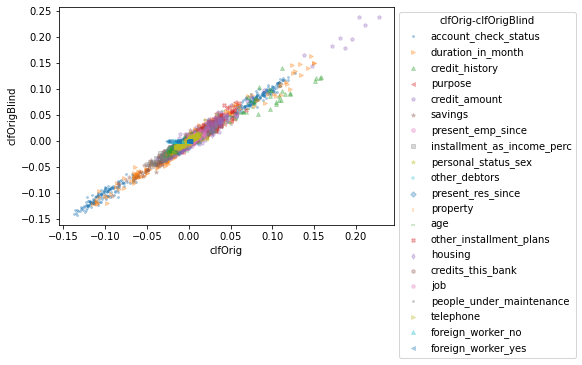

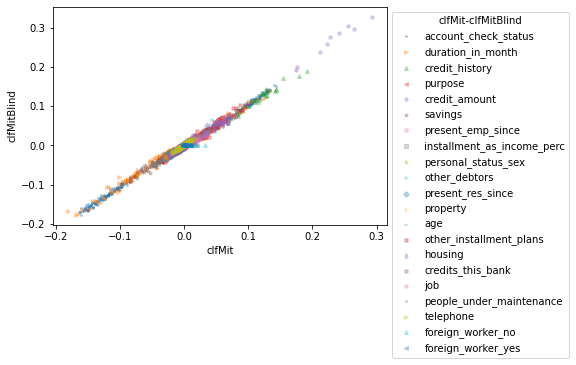

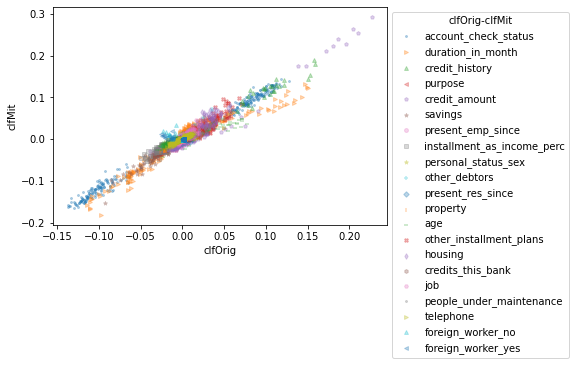

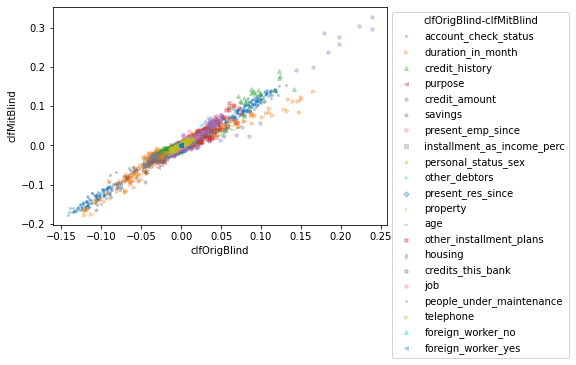

In [247]:
XAIPlots(shap_v,column_names,diffClfs=True)

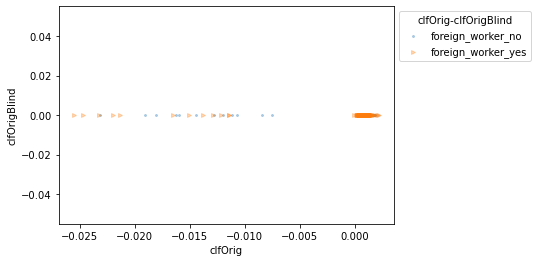

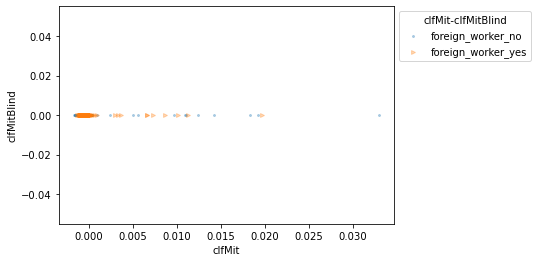

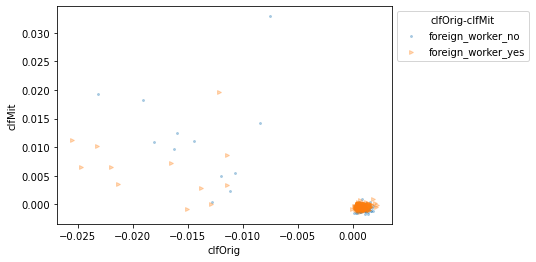

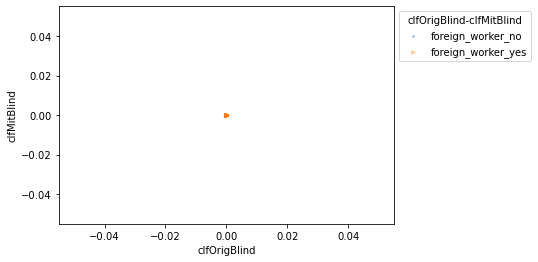

In [248]:
XAIPlots(shap_v,protected,diffClfs=True)

##### LIME

In [249]:
lime_v= LIME(clfs,column_names,class_names,X_train,X_train_mod,X_test,protected,changeReferenceSet=True)
XAISum,XAIMean = deltas(lime_v,column_names)
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)

In [250]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "wb") as f:
  pickle.dump(lime_v, f)

In [251]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v = pickle.load(f)

In [252]:
XAISum,XAIMean = deltas(lime_v,column_names)
XAISum

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                   -2.367327           -5.664160   
duration_in_month                     -13.654580          -12.151314   
credit_history                          5.655101            7.073551   
purpose                                 5.037958            4.858827   
credit_amount                         -25.090334          -26.420616   
savings                                 2.114076            1.627951   
present_emp_since                      -0.305322           -0.520720   
installment_as_income_perc             -0.369367           -0.509740   
personal_status_sex                    -0.351501           -0.774627   
other_debtors                           0.880425            1.275195   
present_res_since                      -0.170084           -0.342632   
property                                2.067984            2.024413   
age                                     4.598032            3.072665   
other_installment_plans                -3.127004           -5.149491   
housing                                -2.339678           -4.472342   
credits_this_bank                      -0.057093           -0.040186   
job                                    -0.681739           -0.877005   
people_under_maintenance               -0.014798           -0.480343   
telephone                               0.348591            0.749160   
foreign_worker_no                       0.388654           -0.586462   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status             -1.789003                 -6.242483  
duration_in_month               -12.708868                -13.097027  
credit_history                    5.954992                  6.773660  
purpose                           4.911086                  4.985699  
credit_amount                   -24.837971                -26.672978  
savings                           1.656201                  2.085825  
present_emp_since                -0.298297                 -0.527745  
installment_as_income_perc       -0.471999                 -0.407109  
personal_status_sex              -0.620978                 -0.505151  
other_debtors                     0.981161                  1.174459  
present_res_since                -0.413780                 -0.098937  
property                          2.274824                  1.817573  
age                               3.833140                  3.837557  
other_installment_plans          -4.661957                 -3.614539  
housing                          -3.601250                 -3.210769  
credits_this_bank                -0.030117                 -0.067162  
job                              -0.841142                 -0.717601  
people_under_maintenance         -0.324972                 -0.170170  
telephone                         0.049032                  1.048720  
foreign_worker_no                -0.370547                  0.172738  
foreign_worker_yes                0.000000                  0.000000

In [253]:
XAIMean

clfOrig-clfOrigBlind  clfMit-clfMitBlind  \
account_check_status                    0.012416            0.008448   
duration_in_month                       0.006696            0.005492   
credit_history                          0.004478            0.005824   
purpose                                 0.005503            0.006679   
credit_amount                           0.015617            0.009349   
savings                                 0.005304            0.005379   
present_emp_since                       0.004791            0.005784   
installment_as_income_perc              0.004731            0.005741   
personal_status_sex                     0.007729            0.005310   
other_debtors                           0.004386            0.005316   
present_res_since                       0.005361            0.005674   
property                                0.004535            0.006771   
age                                     0.006921            0.007174   
other_installment_plans                 0.005676            0.004952   
housing                                 0.004379            0.005193   
credits_this_bank                       0.004876            0.005412   
job                                     0.004640            0.005415   
people_under_maintenance                0.003831            0.004852   
telephone                               0.004510            0.006300   
foreign_worker_no                       0.004089            0.005691   
foreign_worker_yes                      0.000000            0.000000   

                            clfOrig-clfMit  clfOrigBlind-clfMitBlind  
account_check_status              0.027317                  0.034943  
duration_in_month                 0.010943                  0.009413  
credit_history                    0.005963                  0.005750  
purpose                           0.005843                  0.006650  
credit_amount                     0.011687                  0.012244  
savings                           0.008077                  0.006702  
present_emp_since                 0.005416                  0.005250  
installment_as_income_perc        0.005906                  0.006565  
personal_status_sex               0.005278                  0.006130  
other_debtors                     0.004748                  0.005193  
present_res_since                 0.005770                  0.005306  
property                          0.005640                  0.005744  
age                               0.005136                  0.010791  
other_installment_plans           0.005143                  0.007269  
housing                           0.009538                  0.006322  
credits_this_bank                 0.005195                  0.005124  
job                               0.005459                  0.005698  
people_under_maintenance          0.004168                  0.004453  
telephone                         0.006855                  0.005954  
foreign_worker_no                 0.005834                  0.004641  
foreign_worker_yes                0.000000                  0.000000

In [28]:
resLIME = pd.read_csv(path_res+'PS_RF_ResLIME_Change.csv',index_col=0)
resLIME = resLIME.round(3)
resLIME.to_csv(path_or_buf=path_res+'PS_RF_ResLIME_Change.csv')
resLIME

clfOrig-clfOrigBlind  clfMit-clfMitBlind  clfOrig-clfMit  \
SA-Sum                   0.194               0.293           0.185   
SA-Mean                  0.002               0.003           0.003   
NSA-Sum                  3.644               4.110           3.698   
NSA-Mean                 0.006               0.006           0.008   

          clfOrigBlind-clfMitBlind  
SA-Sum                       0.086  
SA-Mean                      0.002  
NSA-Sum                      4.056  
NSA-Mean                     0.008

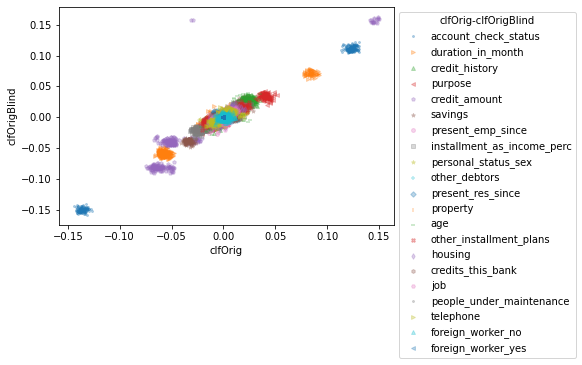

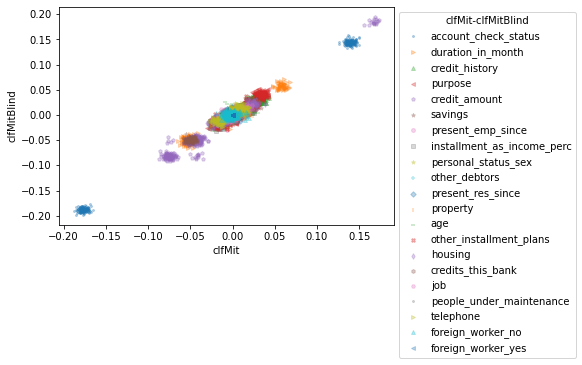

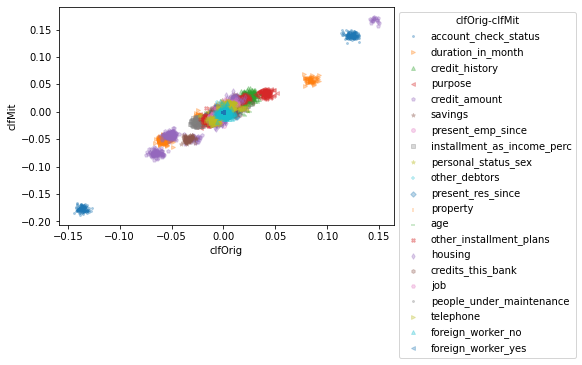

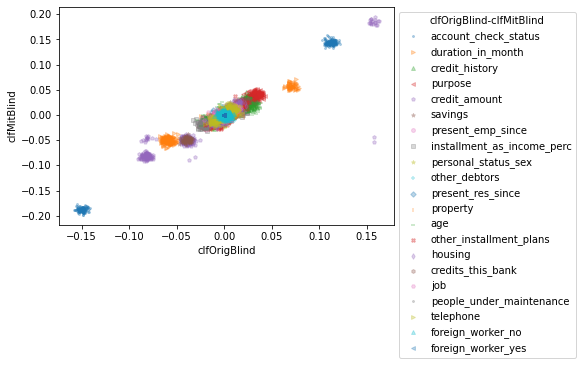

In [255]:
XAIPlots(lime_v,column_names,diffClfs=True)

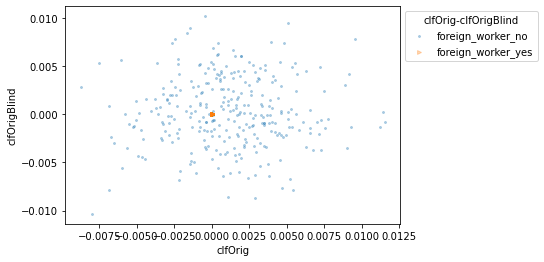

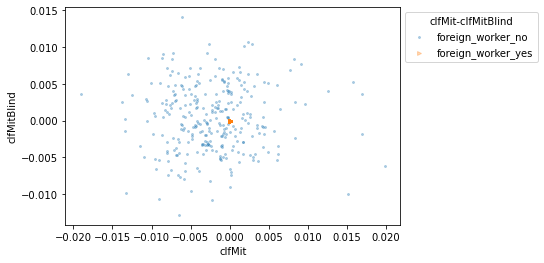

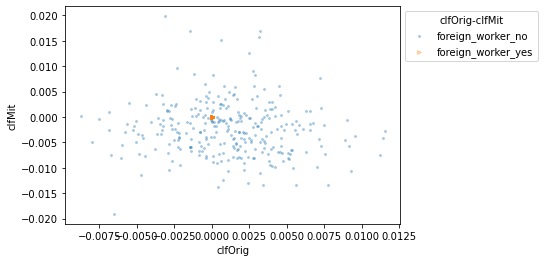

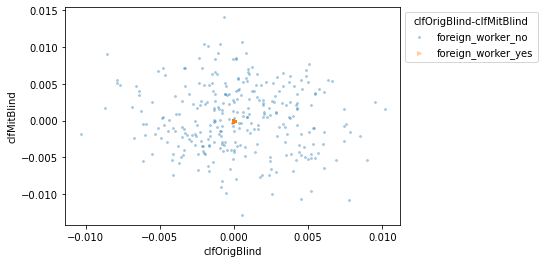

In [256]:
XAIPlots(lime_v,protected,diffClfs=True)

#### Comparison

##### SHAP Kernel Explainer

In [46]:
PIK = "PS_RF_SHAPV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [47]:
PIK = "PS_RF_SHAPV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [48]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -7.369476      -3.453945   
duration_in_month                -10.178275     -14.206840   
credit_history                     4.112905       5.320540   
purpose                            6.112068       5.643568   
credit_amount                    -18.540484     -19.816422   
savings                           -3.173149      -3.637128   
present_emp_since                 -1.331626      -3.115221   
installment_as_income_perc         0.765532       1.316733   
personal_status_sex                0.609097       0.335708   
other_debtors                      0.491878       0.846892   
present_res_since                 -1.083515      -1.340828   
property                           1.289413       1.419104   
age                                6.247189       4.039451   
other_installment_plans            2.234895       2.751102   
housing                            2.300077       3.544607   
credits_this_bank                 -0.111367      -0.157072   
job                                0.802933       0.504341   
people_under_maintenance           1.056510       1.411311   
telephone                         -0.089986      -0.107074   
foreign_worker_no                 -0.300162       0.346397   
foreign_worker_yes                -0.380198       0.141438   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -7.378977                -5.972218  
duration_in_month                          -12.157222               -14.410099  
credit_history                               4.230368                 5.577659  
purpose                                      5.579612                 6.409999  
credit_amount                              -20.578578               -23.486452  
savings                                     -2.895647                -3.645574  
present_emp_since                           -1.849764                -2.824132  
installment_as_income_perc                   1.675731                 0.689521  
personal_status_sex                          0.446016                 0.443741  
other_debtors                                0.737416                 0.771319  
present_res_since                           -0.823644                -0.937502  
property                                     1.477246                 1.067938  
age                                          5.312188                 3.839072  
other_installment_plans                      3.153222                 2.235103  
housing                                      2.634617                 3.378217  
credits_this_bank                           -0.059565                -0.159693  
job                                          0.743078                 0.549240  
people_under_maintenance                     1.117422                 1.572846  
telephone                                   -0.098522                -0.048673  
foreign_worker_no                            0.000000                -0.002309  
foreign_worker_yes                           0.000332                -0.000079

In [49]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               0.008618       0.013652   
duration_in_month                  0.000821       0.002710   
credit_history                     0.000485       0.000716   
purpose                            0.000908       0.000974   
credit_amount                      0.000634       0.002275   
savings                            0.000607       0.002204   
present_emp_since                  0.000353       0.001025   
installment_as_income_perc         0.000777       0.001275   
personal_status_sex                0.000331       0.000528   
other_debtors                      0.000206       0.000293   
present_res_since                  0.000414       0.000511   
property                           0.000405       0.000797   
age                                0.001024       0.000996   
other_installment_plans            0.000561       0.000591   
housing                            0.000692       0.001086   
credits_this_bank                  0.000564       0.000479   
job                                0.000481       0.000546   
people_under_maintenance           0.000159       0.000393   
telephone                          0.000397       0.000745   
foreign_worker_no                  0.000029       0.000103   
foreign_worker_yes                 0.000041       0.000055   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000785                 0.002826  
duration_in_month                            0.000593                 0.001781  
credit_history                               0.000476                 0.001412  
purpose                                      0.000651                 0.000964  
credit_amount                                0.002384                 0.003334  
savings                                      0.000971                 0.000996  
present_emp_since                            0.000334                 0.000531  
installment_as_income_perc                   0.000525                 0.000987  
personal_status_sex                          0.000401                 0.000809  
other_debtors                                0.000147                 0.000491  
present_res_since                            0.000564                 0.000456  
property                                     0.000398                 0.001500  
age                                          0.001148                 0.000661  
other_installment_plans                      0.000362                 0.000621  
housing                                      0.000468                 0.000694  
credits_this_bank                            0.000270                 0.000456  
job                                          0.000371                 0.000934  
people_under_maintenance                     0.000066                 0.000125  
telephone                                    0.000343                 0.001010  
foreign_worker_no                            0.000000                 0.000008  
foreign_worker_yes                           0.000006                 0.000009

In [50]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.340          0.244                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             3.574          3.840                      3.839   
NSA-Mean            0.001          0.002                      0.001   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.001  
SA-Mean                     0.000  
NSA-Sum                     4.106  
NSA-Mean                    0.001

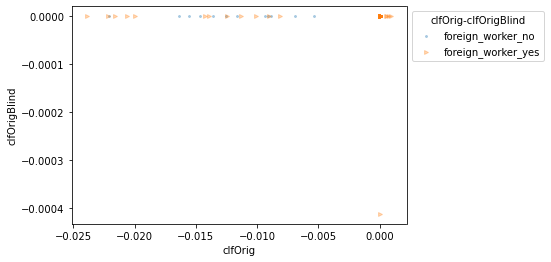

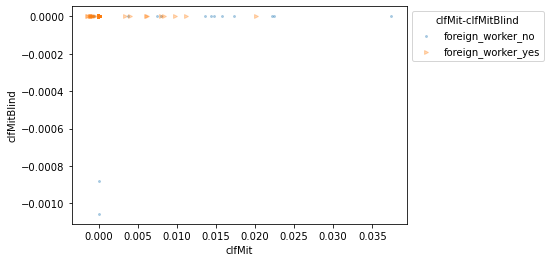

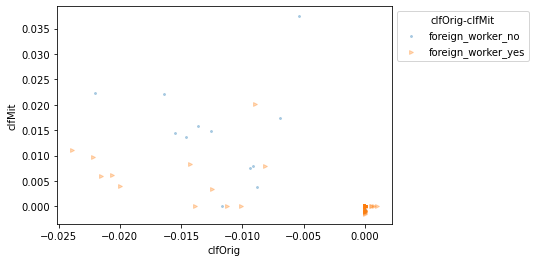

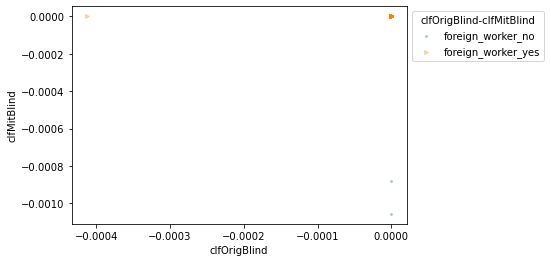

In [51]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### SHAP Explainer 4 Trees

In [52]:
PIK = "PS_RF_SHAPV_Fix_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_fix = pickle.load(f)

In [53]:
PIK = "PS_RF_SHAPV_Change_Tree.dat"
with open(path_res+"/"+PIK, "rb") as f:
  shap_v_change = pickle.load(f)

In [54]:
XAISum,XAIMean = deltas(shap_v_fix,column_names,False,shap_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status              -1.666165      -3.175048   
duration_in_month                 -0.531765      -3.063583   
credit_history                    -0.877138      -0.327650   
purpose                            0.823579       0.895252   
credit_amount                     -1.035341      -1.487039   
savings                            0.174839      -0.053504   
present_emp_since                  0.551727       0.949444   
installment_as_income_perc        -1.099763      -0.888090   
personal_status_sex                0.351822       0.289295   
other_debtors                     -0.132385      -0.098396   
present_res_since                 -0.300029      -0.182153   
property                           0.146645       0.248617   
age                                1.136738       1.644087   
other_installment_plans            1.072704       1.572220   
housing                            0.137224      -0.427839   
credits_this_bank                 -0.145634      -0.302976   
job                                0.499504       0.785835   
people_under_maintenance           0.287915      -0.078076   
telephone                          0.357975       0.485886   
foreign_worker_no                  0.066423      -0.008506   
foreign_worker_yes                 0.042840      -0.033013   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -1.487129                -3.706941  
duration_in_month                           -0.259905                -2.955509  
credit_history                              -0.577624                -0.665514  
purpose                                      0.468325                 0.909560  
credit_amount                               -1.147173                -1.678439  
savings                                      0.204508                -0.232657  
present_emp_since                            0.366608                 0.908543  
installment_as_income_perc                  -0.941365                -1.051216  
personal_status_sex                          0.234617                 0.423454  
other_debtors                                0.103350                -0.079513  
present_res_since                            0.059889                -0.176601  
property                                     0.216102                 0.187004  
age                                          1.321926                 1.454982  
other_installment_plans                      1.576806                 1.836042  
housing                                     -0.110621                -0.467644  
credits_this_bank                            0.240799                -0.151868  
job                                          0.436412                 0.586229  
people_under_maintenance                     0.128917                -0.027387  
telephone                                    0.520225                 0.593700  
foreign_worker_no                            0.000000                 0.000000  
foreign_worker_yes                           0.000000                 0.000000

In [55]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0            0.0   
duration_in_month                       0.0            0.0   
credit_history                          0.0            0.0   
purpose                                 0.0            0.0   
credit_amount                           0.0            0.0   
savings                                 0.0            0.0   
present_emp_since                       0.0            0.0   
installment_as_income_perc              0.0            0.0   
personal_status_sex                     0.0            0.0   
other_debtors                           0.0            0.0   
present_res_since                       0.0            0.0   
property                                0.0            0.0   
age                                     0.0            0.0   
other_installment_plans                 0.0            0.0   
housing                                 0.0            0.0   
credits_this_bank                       0.0            0.0   
job                                     0.0            0.0   
people_under_maintenance                0.0            0.0   
telephone                               0.0            0.0   
foreign_worker_no                       0.0            0.0   
foreign_worker_yes                      0.0            0.0   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                              0.0                      0.0  
duration_in_month                                 0.0                      0.0  
credit_history                                    0.0                      0.0  
purpose                                           0.0                      0.0  
credit_amount                                     0.0                      0.0  
savings                                           0.0                      0.0  
present_emp_since                                 0.0                      0.0  
installment_as_income_perc                        0.0                      0.0  
personal_status_sex                               0.0                      0.0  
other_debtors                                     0.0                      0.0  
present_res_since                                 0.0                      0.0  
property                                          0.0                      0.0  
age                                               0.0                      0.0  
other_installment_plans                           0.0                      0.0  
housing                                           0.0                      0.0  
credits_this_bank                                 0.0                      0.0  
job                                               0.0                      0.0  
people_under_maintenance                          0.0                      0.0  
telephone                                         0.0                      0.0  
foreign_worker_no                                 0.0                      0.0  
foreign_worker_yes                                0.0                      0.0

In [56]:
resSHAP = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resSHAP = resSHAP.round(3)
resSHAP

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.055          0.021                      0.000   
SA-Mean             0.000          0.000                      0.000   
NSA-Sum             0.596          0.892                      0.547   
NSA-Mean            0.000          0.000                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.000  
SA-Mean                     0.000  
NSA-Sum                     0.952  
NSA-Mean                    0.000

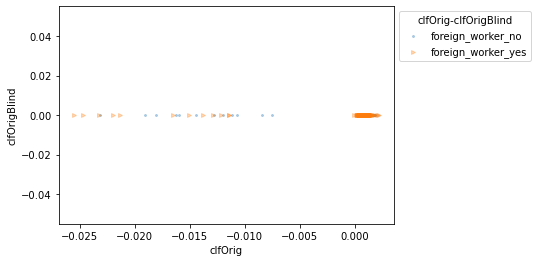

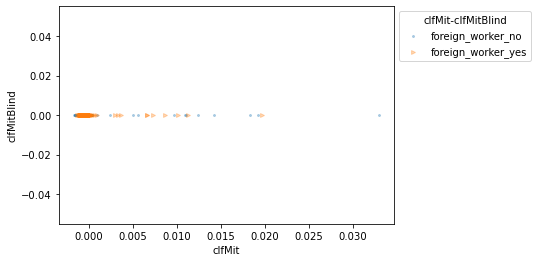

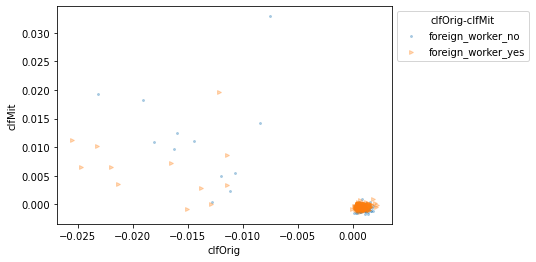

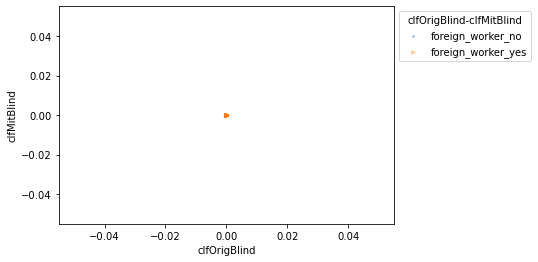

In [57]:
XAIPlots(shap_v_fix,protected,True,shap_v_change)

##### LIME

In [58]:
PIK = "PS_RF_LIMEV_Fix.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_fix = pickle.load(f)

In [59]:
PIK = "PS_RF_LIMEV_Change.dat"
with open(path_res+"/"+PIK, "rb") as f:
  lime_v_change = pickle.load(f)

In [60]:
XAISum,XAIMean = deltas(lime_v_fix,column_names,False,lime_v_change)
XAISum

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status               1.346083      -1.932734   
duration_in_month                -13.104063     -12.196491   
credit_history                     5.401839       6.650507   
purpose                            5.299326       5.027438   
credit_amount                    -24.894444     -24.989598   
savings                            1.917063       1.614315   
present_emp_since                 -0.231658      -0.446021   
installment_as_income_perc        -0.606720       0.051363   
personal_status_sex               -0.709760      -0.507169   
other_debtors                      0.615081       1.339928   
present_res_since                 -0.111459      -0.780426   
property                           2.063095       2.551653   
age                                4.081820       3.526633   
other_installment_plans           -4.224471      -5.585419   
housing                           -2.194542      -4.341419   
credits_this_bank                 -0.104884       0.005063   
job                               -0.673415      -1.355702   
people_under_maintenance          -0.075751      -0.535802   
telephone                          0.050457       0.629139   
foreign_worker_no                  0.636334      -1.643319   
foreign_worker_yes                 0.000000       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                        -6.080493                 1.035261  
duration_in_month                          -14.204761               -10.547949  
credit_history                               5.908819                 7.323390  
purpose                                      4.775974                 5.725134  
credit_amount                              -25.286682               -29.030034  
savings                                      2.310665                 1.828831  
present_emp_since                           -0.378257                -0.649729  
installment_as_income_perc                  -0.131983                -0.531326  
personal_status_sex                          0.005670                -0.812679  
other_debtors                                1.146041                 0.954248  
present_res_since                           -0.228970                 0.008570  
property                                     2.072834                 1.814951  
age                                          5.114561                 2.839359  
other_installment_plans                     -2.029588                -5.656576  
housing                                     -2.484596                -3.867787  
credits_this_bank                           -0.009433                 0.010012  
job                                         -0.690298                -1.091312  
people_under_maintenance                     0.046090                -0.367848  
telephone                                    0.646936                 1.315391  
foreign_worker_no                            0.143999                 0.075966  
foreign_worker_yes                           0.000000                 0.000000

In [61]:
XAIMean

clfOrig-clfOrig  clfMit-clfMit  \
account_check_status                    0.0       0.010084   
duration_in_month                       0.0       0.005161   
credit_history                          0.0       0.005070   
purpose                                 0.0       0.005222   
credit_amount                           0.0       0.005015   
savings                                 0.0       0.004833   
present_emp_since                       0.0       0.005298   
installment_as_income_perc              0.0       0.004794   
personal_status_sex                     0.0       0.004476   
other_debtors                           0.0       0.004483   
present_res_since                       0.0       0.004647   
property                                0.0       0.004541   
age                                     0.0       0.005690   
other_installment_plans                 0.0       0.005012   
housing                                 0.0       0.005647   
credits_this_bank                       0.0       0.004830   
job                                     0.0       0.004949   
people_under_maintenance                0.0       0.004297   
telephone                               0.0       0.005793   
foreign_worker_no                       0.0       0.004935   
foreign_worker_yes                      0.0       0.000000   

                            clfOrigBlind-clfOrigBlind  clfMitBlind-clfMitBlind  
account_check_status                         0.000018                 0.024798  
duration_in_month                            0.000022                 0.010707  
credit_history                               0.000021                 0.005496  
purpose                                      0.000021                 0.006378  
credit_amount                                0.000021                 0.006974  
savings                                      0.000021                 0.005211  
present_emp_since                            0.000021                 0.006214  
installment_as_income_perc                   0.000020                 0.005986  
personal_status_sex                          0.000022                 0.005622  
other_debtors                                0.000020                 0.005762  
present_res_since                            0.000021                 0.005641  
property                                     0.000019                 0.005688  
age                                          0.000021                 0.005850  
other_installment_plans                      0.000020                 0.005524  
housing                                      0.000019                 0.004963  
credits_this_bank                            0.000022                 0.005459  
job                                          0.000020                 0.005586  
people_under_maintenance                     0.000019                 0.005291  
telephone                                    0.000022                 0.005671  
foreign_worker_no                            0.000611                 0.004812  
foreign_worker_yes                           0.000000                 0.000000

In [62]:
resLIME = buildFinalResXAI(XAISum,XAIMean,protected,non_sensitive)
resLIME = resLIME.round(3)
resLIME

clfOrig-clfOrig  clfMit-clfMit  clfOrigBlind-clfOrigBlind  \
SA-Sum              0.318          0.822                      0.072   
SA-Mean             0.000          0.002                      0.000   
NSA-Sum             3.563          3.898                      3.871   
NSA-Mean            0.000          0.005                      0.000   

          clfMitBlind-clfMitBlind  
SA-Sum                      0.038  
SA-Mean                     0.002  
NSA-Sum                     3.969  
NSA-Mean                    0.007

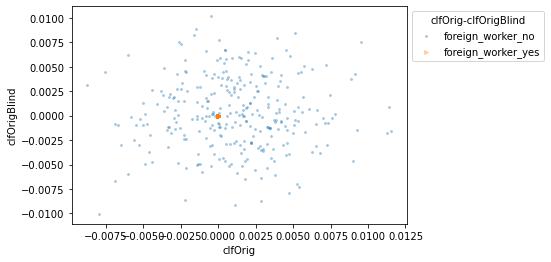

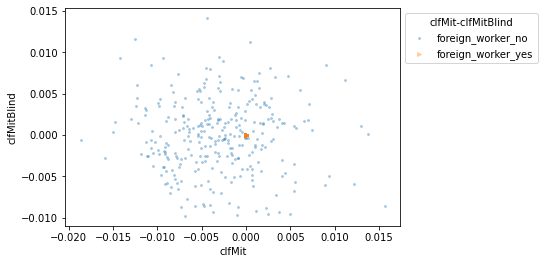

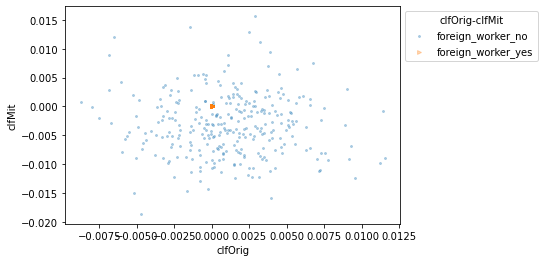

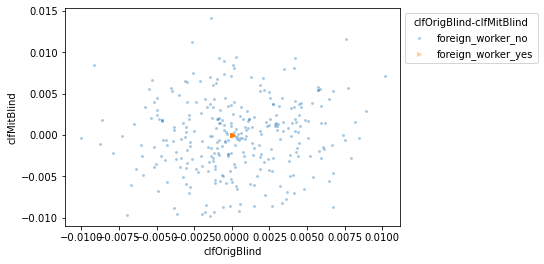

In [63]:
XAIPlots(lime_v_fix,protected,True,lime_v_change)